# STEP 3: HANDLING WITH OUTLIERS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
import re

In [3]:
df0 = pd.read_csv("C:\\Users\\49179\\Desktop\\EDA Project\\capstone_step2.csv")
df = df0.copy()

**User Defined Functions**

In [11]:
def first_looking(col):
    print("COLUMN NAME    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [39]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False))

In [40]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False))

In [41]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False))

In [4]:
df.head().T

0  \
make_model                        Mercedes-Benz A 160   
make                                    Mercedes-Benz   
price                                         16950.0   
body_type                                     Compact   
type                                             Used   
doors                                             5.0   
warranty                                          Yes   
mileage                                      120200.0   
gearbox                                        Manual   
fuel_type                                      Diesel   
seller                                         Dealer   
seats                                             5.0   
engine_size                                    1595.0   
gears                                             5.0   
co_emissions                                     98.0   
drivetrain                                      Front   
extras                                   Alloy wheels   
empty_weight                                   1270.0   
full_service_history                               No   
non_smoker_vehicle                                 No   
upholstery                                      Cloth   
previous_owner                                    2.0   
energy_efficiency_class                     efficient   
age                                               6.0   
power_kw                                         75.0   
cons_avg                                          3.8   
comfort_&_convenience_Package                Standard   
entertainment_&_media_Package                Standard   
safety_&_security_Package      Safety Premium Package   

                                                                               1  \
make_model                                                 Mercedes-Benz EQE 350   
make                                                               Mercedes-Benz   
price                                                                    80900.0   
body_type                                                                Compact   
type                                                              Pre-registered   
doors                                                                        4.0   
warranty                                                                     Yes   
mileage                                                                   5000.0   
gearbox                                                                Automatic   
fuel_type                                                               Electric   
seller                                                                    Dealer   
seats                                                                        5.0   
engine_size                                                                  1.0   
gears                                                                        9.0   
co_emissions                                                                 0.0   
drivetrain                                                                   4WD   
extras                         Alloy wheels (21"), Shift paddles, Sport packa...   
empty_weight                                                              2355.0   
full_service_history                                                          No   
non_smoker_vehicle                                                            No   
upholstery                                                     Part/Full Leather   
previous_owner                                                               1.0   
energy_efficiency_class                                                efficient   
age                                                                          0.0   
power_kw                                                                   215.0   
cons_avg                                                                   2.247   
comfort_&_convenience_Package                                            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     28630 non-null  object 
 1   make                           28630 non-null  object 
 2   price                          28630 non-null  float64
 3   body_type                      28630 non-null  object 
 4   type                           28630 non-null  object 
 5   doors                          28630 non-null  float64
 6   warranty                       28630 non-null  object 
 7   mileage                        28630 non-null  float64
 8   gearbox                        28630 non-null  object 
 9   fuel_type                      28630 non-null  object 
 10  seller                         28630 non-null  object 
 11  seats                          28630 non-null  float64
 12  engine_size                    28630 non-null 

In [6]:
df.shape

(28630, 29)

In [7]:
df.isnull().sum()*100 / df.shape[0]

make_model                       0.0
make                             0.0
price                            0.0
body_type                        0.0
type                             0.0
doors                            0.0
warranty                         0.0
mileage                          0.0
gearbox                          0.0
fuel_type                        0.0
seller                           0.0
seats                            0.0
engine_size                      0.0
gears                            0.0
co_emissions                     0.0
drivetrain                       0.0
extras                           0.0
empty_weight                     0.0
full_service_history             0.0
non_smoker_vehicle               0.0
upholstery                       0.0
previous_owner                   0.0
energy_efficiency_class          0.0
age                              0.0
power_kw                         0.0
cons_avg                         0.0
comfort_&_convenience_Package    0.0
e

In [8]:
df.duplicated(keep=False).sum()

6259

**Lets see how many numeric features we have. At the end I am going to transform all features to numeric features for the machine learning model**

In [9]:
numeric_col = df.select_dtypes(include="number")
print(numeric_col.columns)
numeric_col

Index(['price', 'doors', 'mileage', 'seats', 'engine_size', 'gears',
       'co_emissions', 'empty_weight', 'previous_owner', 'age', 'power_kw',
       'cons_avg'],
      dtype='object')


price  doors   mileage  seats  engine_size  gears  co_emissions  \
0      16950.0    5.0  120200.0    5.0       1595.0    5.0          98.0   
1      80900.0    4.0    5000.0    5.0          1.0    9.0           0.0   
2      69900.0    5.0   18900.0    5.0       1991.0    8.0         162.0   
3      46990.0    5.0   18995.0    5.0       1991.0    7.0         169.0   
4      16800.0    5.0  197000.0    5.0       2143.0    7.0         162.0   
...        ...    ...       ...    ...          ...    ...           ...   
28625  37600.0    4.0   40345.0    4.0       1969.0    8.0         127.0   
28626   5499.0    4.0  145000.0    5.0       2435.0    5.0         217.0   
28627   7300.0    3.0   96000.0    4.0       1560.0    6.0          99.0   
28628  29900.0    4.0   94343.0    5.0       1969.0    8.0         149.0   
28629   4440.0    4.0  230047.0    5.0       2922.0    6.0         251.0   

       empty_weight  previous_owner   age  power_kw  cons_avg  
0            1270.0             2.0   6.0      75.0     3.800  
1            2355.0             1.0   0.0     215.0     2.247  
2            1555.0             2.0   2.0     310.0     8.400  
3            1455.0             2.0   2.0     225.0     7.300  
4            1545.0             2.0   7.0     100.0     4.900  
...             ...             ...   ...       ...       ...  
28625        2077.0             2.0   3.0     288.0     2.000  
28626        1357.0             3.0  18.0     125.0     9.100  
28627        1356.0             1.0  11.0      84.0     3.800  
28628        1617.0             1.0   5.0     187.0     6.500  
28629        1573.0             5.0  20.0     147.0    10.400  

[28630 rows x 12 columns]

# Examination of Outliers in the Columns

**price (Target Variable)**

In [12]:
first_looking("price")

COLUMN NAME    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5021
--------------------------------
price
14990.0    222
12990.0    219
16990.0    186
19990.0    166
9990.0     160
          ... 
19112.0      1
30465.0      1
18461.0      1
22649.0      1
4440.0       1
Name: count, Length: 5021, dtype: int64


In [13]:
df['price'].describe()

count     28630.000000
mean      23470.662173
std       23953.503570
min         490.000000
25%       11990.000000
50%       17979.000000
75%       27990.000000
max      999999.000000
Name: price, dtype: float64

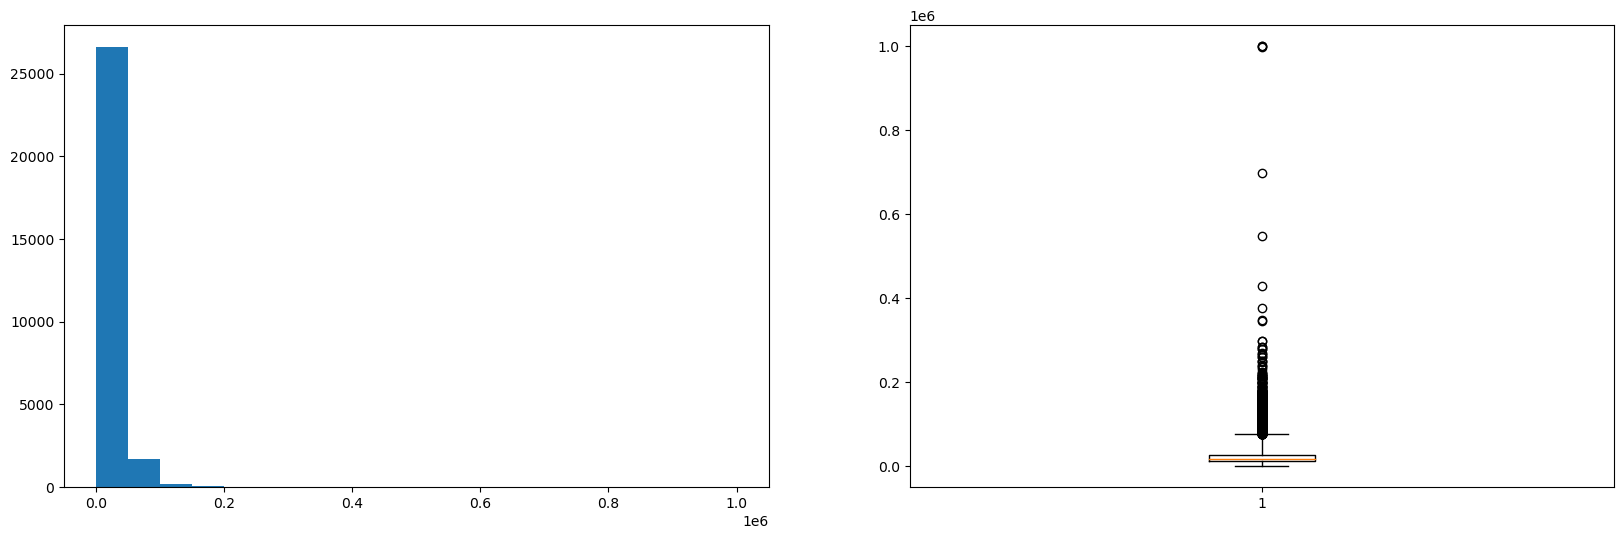

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3);

In [26]:
df['price'].sort_values().head(20)

5847     490.0
19565    500.0
5513     500.0
17516    590.0
5291     600.0
5351     600.0
5296     699.0
23792    700.0
3375     700.0
5519     740.0
5279     750.0
24546    750.0
20114    750.0
7812     750.0
5630     790.0
7835     790.0
2504     790.0
6460     790.0
3149     799.0
8187     800.0
Name: price, dtype: float64

In [25]:
df['price'].sort_values().tail(20)

1587     259000.0
1397     259880.0
19314    264900.0
1413     267810.0
1320     268900.0
1114     279000.0
1444     279063.0
710      283900.0
1595     284780.0
1076     299000.0
1451     299000.0
1305     344900.0
21927    349000.0
1317     375900.0
21606    430000.0
21553    549000.0
1212     696900.0
21919    998000.0
28184    999999.0
27804    999999.0
Name: price, dtype: float64

**It is obvious that there are some interesting values in the 'price' column like 999999. Lets examine these 15 rows closely**

In [18]:
df.price.sort_values().tail(20).index

Index([ 1587,  1397, 19314,  1413,  1320,  1114,  1444,   710,  1595,  1076,
        1451,  1305, 21927,  1317, 21606, 21553,  1212, 21919, 28184, 27804],
      dtype='int64')

In [21]:
df.iloc[df.price.sort_values().tail(20).index]

make_model           make     price         body_type  \
1587     Mercedes-Benz G 63 AMG  Mercedes-Benz  259000.0  Off-Road/Pick-up   
1397     Mercedes-Benz G 63 AMG  Mercedes-Benz  259880.0  Off-Road/Pick-up   
19314            Nissan Skyline         Nissan  264900.0             Coupe   
1413     Mercedes-Benz G 63 AMG  Mercedes-Benz  267810.0  Off-Road/Pick-up   
1320     Mercedes-Benz G 63 AMG  Mercedes-Benz  268900.0  Off-Road/Pick-up   
1114          Mercedes-Benz SLS  Mercedes-Benz  279000.0             Coupe   
1444     Mercedes-Benz G 63 AMG  Mercedes-Benz  279063.0  Off-Road/Pick-up   
710        Mercedes-Benz AMG GT  Mercedes-Benz  283900.0       Convertible   
1595     Mercedes-Benz G 63 AMG  Mercedes-Benz  284780.0  Off-Road/Pick-up   
1076   Mercedes-Benz GLE 63 AMG  Mercedes-Benz  299000.0             Coupe   
1451   Mercedes-Benz GLE 63 AMG  Mercedes-Benz  299000.0  Off-Road/Pick-up   
1305     Mercedes-Benz G 63 AMG  Mercedes-Benz  344900.0  Off-Road/Pick-up   
21927                     Ford            Ford  349000.0             Coupe   
1317     Mercedes-Benz G 63 AMG  Mercedes-Benz  375900.0  Off-Road/Pick-up   
21606                   Ford GT           Ford  430000.0             Coupe   
21553                   Ford GT           Ford  549000.0             Coupe   
1212     Mercedes-Benz G 63 AMG  Mercedes-Benz  696900.0  Off-Road/Pick-up   
21919                   Ford GT           Ford  998000.0             Coupe   
28184                 Volvo 240          Volvo  999999.0     Station wagon   
27804                 Volvo 240          Volvo  999999.0     Station wagon   

                 type  doors warranty   mileage    gearbox fuel_type  \
1587             Used    5.0      Yes    4003.0  Automatic   Benzine   
1397    Demonstration    5.0      Yes    9900.0  Automatic   Benzine   
19314            Used    2.0       No   45000.0     Manual   Benzine   
1413    Demonstration    5.0      Yes    3003.0  Automatic   Benzine   
1320   Pre-registered    5.0      Yes    1800.0  Automatic   Benzine   
1114             Used    2.0       No   30000.0  Automatic   Benzine   
1444    Demonstration    5.0       No    9900.0  Automatic   Benzine   
710              Used    3.0      Yes    3569.0  Automatic   Benzine   
1595    Demonstration    5.0      Yes    9900.0  Automatic   Benzine   
1076    Demonstration    4.0       No    8000.0  Automatic   Benzine   
1451    Demonstration    4.0       No    8000.0  Automatic   Benzine   
1305   Pre-registered    5.0      Yes     100.0  Automatic   Benzine   
21927            Used    2.0       No    4600.0     Manual   Benzine   
1317   Pre-registered    5.0      Yes     100.0  Automatic   Benzine   
21606            Used    2.0      Yes    3166.0     Manual   Benzine   
21553            Used    2.0       No   20800.0     Manual   Benzine   
1212   Pre-registered    5.0      Yes     100.0  Automatic   Benzine   
21919            Used    2.0      Yes    1900.0  Automatic   Benzine   
28184            Used    5.0       No  377733.0     Manual   Benzine   
27804            Used    5.0       No  377733.0     Manual   Benzine   

               seller  seats  engine_size  gears  co_emissions drivetrain  \
1587           Dealer    5.0       3982.0    9.0         299.0        4WD   
1397           Dealer    5.0       3982.0    9.0         330.0        4WD   
19314          Dealer    4.0       2500.0    5.0         257.0       Rear   
1413           Dealer    5.0       3982.0    9.0         330.0        4WD   
1320           Dealer    5.0       3982.0    9.0         330.0        4WD   
1114           Dealer    2.0       6208.0    6.0         308.0      Front   
1444           Dealer    5.0       3982.0    9.0         341.0        4WD   
710            Dealer    2.0       3982.0    7.0         298.0       Rear   
1595           Dealer    5.0       3982.0    9.0         330.0        4WD   
1076           Dealer    5.0       3982.0    7.0         282.0        4WD   
1451           Dealer 

In [22]:
df.loc[df["make_model"] == "Volvo 240"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]

make_model     price   age      body_type   mileage  engine_size  gears  \
26399  Volvo 240  126950.0  40.0          Coupe       1.0       1999.0    1.0   
26427  Volvo 240   15000.0  47.0          Coupe  170000.0       1999.0    5.0   
26500  Volvo 240   17000.0  42.0          Coupe  109000.0       1999.0    4.0   
26574  Volvo 240  126950.0  40.0          Coupe       1.0       1999.0    1.0   
26602  Volvo 240   15000.0  47.0          Coupe  170000.0       1999.0    5.0   
26675  Volvo 240   17000.0  42.0          Coupe  109000.0       1999.0    4.0   
27804  Volvo 240  999999.0  31.0  Station wagon  377733.0       2316.0    1.0   
27805  Volvo 240    7950.0  29.0  Station wagon  231225.0       1986.0    1.0   
27809  Volvo 240    5200.0  31.0  Station wagon  367329.0       1986.0    1.0   
28184  Volvo 240  999999.0  31.0  Station wagon  377733.0       2316.0    1.0   
28185  Volvo 240    7950.0  29.0  Station wagon  231225.0       1986.0    1.0   
28189  Volvo 240    5200.0  31.0  Station wagon  367329.0       1986.0    1.0   
28504  Volvo 240    9850.0  36.0          Sedan  116569.0       2300.0    1.0   

      drivetrain  
26399       Rear  
26427       Rear  
26500       Rear  
26574       Rear  
26602       Rear  
26675       Rear  
27804       Rear  
27805       Rear  
27809       Rear  
28184       Rear  
28185       Rear  
28189       Rear  
28504       Rear

In [24]:
df.loc[df["make_model"] == "Mercedes-Benz G 63 AMG"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]

make_model     price  age         body_type  mileage  \
1212  Mercedes-Benz G 63 AMG  696900.0  0.0  Off-Road/Pick-up    100.0   
1248  Mercedes-Benz G 63 AMG   99980.0  7.0  Off-Road/Pick-up  23521.0   
1305  Mercedes-Benz G 63 AMG  344900.0  0.0  Off-Road/Pick-up    100.0   
1317  Mercedes-Benz G 63 AMG  375900.0  1.0  Off-Road/Pick-up    100.0   
1320  Mercedes-Benz G 63 AMG  268900.0  0.0  Off-Road/Pick-up   1800.0   
1359  Mercedes-Benz G 63 AMG   92380.0  9.0  Off-Road/Pick-up  49700.0   
1379  Mercedes-Benz G 63 AMG  119800.0  5.0  Off-Road/Pick-up  31000.0   
1393  Mercedes-Benz G 63 AMG  248800.0  0.0  Off-Road/Pick-up   8800.0   
1395  Mercedes-Benz G 63 AMG   92690.0  7.0  Off-Road/Pick-up  82178.0   
1397  Mercedes-Benz G 63 AMG  259880.0  0.0  Off-Road/Pick-up   9900.0   
1413  Mercedes-Benz G 63 AMG  267810.0  0.0  Off-Road/Pick-up   3003.0   
1444  Mercedes-Benz G 63 AMG  279063.0  0.0  Off-Road/Pick-up   9900.0   
1490  Mercedes-Benz G 63 AMG  213900.0  3.0  Off-Road/Pick-up  33542.0   
1502  Mercedes-Benz G 63 AMG  249890.0  2.0  Off-Road/Pick-up   2901.0   
1573  Mercedes-Benz G 63 AMG  232000.0  1.0  Off-Road/Pick-up  16000.0   
1587  Mercedes-Benz G 63 AMG  259000.0  0.0  Off-Road/Pick-up   4003.0   
1595  Mercedes-Benz G 63 AMG  284780.0  0.0  Off-Road/Pick-up   9900.0   

      engine_size  gears drivetrain  
1212       3982.0    9.0        4WD  
1248       5461.0    7.0        4WD  
1305       3982.0    9.0        4WD  
1317       3982.0    9.0        4WD  
1320       3982.0    9.0        4WD  
1359       5461.0    7.0        4WD  
1379       5461.0    9.0        4WD  
1393       3982.0    9.0        4WD  
1395       5461.0    7.0        4WD  
1397       3982.0    9.0        4WD  
1413       3982.0    9.0        4WD  
1444       3982.0    9.0        4WD  
1490       3982.0    9.0        4WD  
1502       3982.0    9.0        4WD  
1573       3982.0    9.0        4WD  
1587       3982.0    9.0        4WD  
1595       3982.0    9.0        4WD

In [27]:
df.loc[df["make_model"] == "Ford GT"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]

make_model     price   age body_type  mileage  engine_size  gears  \
21553    Ford GT  549000.0  17.0     Coupe  20800.0       5409.0    6.0   
21606    Ford GT  430000.0  17.0     Coupe   3166.0       4949.0    5.0   
21644    Ford GT  169950.0  54.0     Coupe    202.0       4949.0    4.0   
21645    Ford GT  129950.0  56.0     Coupe  33809.0       4949.0    5.0   
21778    Ford GT    1075.0   4.0     Coupe    145.0       4949.0    5.0   
21793    Ford GT    1346.0   1.0     Coupe   3500.0       4949.0    5.0   
21919    Ford GT  998000.0   4.0     Coupe   1900.0       4949.0    5.0   
21921    Ford GT  159500.0  45.0     Coupe    596.0       4949.0    5.0   

      drivetrain  
21553       Rear  
21606       Rear  
21644       Rear  
21645       Rear  
21778       Rear  
21793       Rear  
21919       Rear  
21921       Rear

In [28]:
df.loc[df["make_model"] == "Nissan Skyline"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]

make_model     price   age body_type   mileage  engine_size  gears  \
19276  Nissan Skyline   64950.0  26.0     Coupe  148461.0       2740.0    5.0   
19297  Nissan Skyline   35160.0  26.0     Coupe  114003.0       2500.0    5.0   
19299  Nissan Skyline   83000.0  51.0     Coupe   86000.0       2500.0    5.0   
19305  Nissan Skyline   34500.0  30.0     Coupe   29500.0       2000.0    5.0   
19314  Nissan Skyline  264900.0  22.0     Coupe   45000.0       2500.0    5.0   
19315  Nissan Skyline   51000.0  31.0     Coupe  117000.0       2600.0    5.0   
19317  Nissan Skyline  149990.0  22.0     Coupe   52000.0       2500.0    6.0   
19389  Nissan Skyline  159999.0  23.0     Coupe   68314.0       2598.0    6.0   
19390  Nissan Skyline   36000.0  26.0     Coupe  122000.0       2500.0    5.0   
19396  Nissan Skyline   65000.0  27.0     Coupe   25700.0       2600.0    5.0   
19399  Nissan Skyline   60000.0  25.0     Coupe   60000.0       2568.0    5.0   
19404  Nissan Skyline   67000.0  24.0     Coupe   81000.0       2500.0    5.0   
19407  Nissan Skyline   64950.0  23.0     Coupe   71845.0       2498.0    5.0   
19411  Nissan Skyline   26000.0  27.0     Coupe  129000.0       2498.0    5.0   
19428  Nissan Skyline   33000.0  29.0     Coupe  100200.0       2500.0    5.0   
19430  Nissan Skyline   27950.0  26.0     Coupe  144266.0       2498.0    5.0   
19445  Nissan Skyline   39500.0  23.0     Coupe  150000.0       2500.0    5.0   
19447  Nissan Skyline   36000.0  22.0     Coupe  152000.0       2500.0    4.0   
19449  Nissan Skyline   59900.0  24.0     Coupe  125000.0       2499.0    5.0   
19461  Nissan Skyline   14500.0  18.0     Coupe  108000.0       3498.0    5.0   
19472  Nissan Skyline   37500.0  28.0     Coupe   86833.0       2600.0    5.0   
19476  Nissan Skyline   61900.0  30.0     Coupe  127000.0       2500.0    6.0   
19482  Nissan Skyline   40000.0  27.0     Coupe  150000.0       2500.0    5.0   
19490  Nissan Skyline   12950.0  19.0     Coupe   78530.0       3498.0    6.0   
19494  Nissan Skyline   41900.0   6.0     Coupe  150522.0       2500.0    5.0   
19509  Nissan Skyline   69999.0  24.0     Coupe  198000.0       2497.0    5.0   
19513  Nissan Skyline   29500.0  25.0     Coupe  157462.0       2498.0    5.0   
19517  Nissan Skyline   32600.0  35.0     Coupe  108659.0       2000.0    5.0   
19531  Nissan Skyline   66000.0  28.0     Coupe  130898.0       2600.0    5.0   
19533  Nissan Skyline   35000.0  25.0     Coupe   70000.0       2500.0    5.0   
19537  Nissan Skyline   61000.0  27.0     Coupe  205284.0       2600.0    6.0   
19544  Nissan Skyline   49000.0  26.0     Coupe  195000.0       2500.0    5.0   
19570  Nissan Skyline   24500.0  27.0     Coupe  171867.0       2500.0    5.0   
19571  Nissan Skyline   58000.0  22.0     Coupe   87473.0       2500.0    5.0   
19629  Nissan Skyline   38900.0  26.0     Coupe  145772.0       2600.0    5.0   

      drivetrain  
19276       Rear  
19297       Rear  
19299       Rear  
19305       Rear  
19314       Rear  
19315        4WD  
19317       Rear  
19389        4WD  
19390       Rear  
19396        4WD  
19399        4WD  
19404       Rear  
19407       Rear  
19411       Rear  
19428       Rear  
19430       Rear  
19445       Rear  
19447       Rear  
19449       Rear  
19461       Rear  
19472       Rear  
19476        4WD  
19482       Rear  
19490       Rear  
19494       Rear  
19509       Rear  
19513       Rear  
19517       Rear  
19531        4WD  
19533       Rear  
19537        4WD  
19544       Rear  
19570       Rear  
19571       Rear  
19629        4WD

**We can see that there are some abnormalities with these 'make_model's. It is not realistic to have such a big difference in prices when all other features are so similar. So I will drop the rows that are above the values I set for these 'make_model's. Also, even if they are correct, such absurd values will make it difficult for the machine learning model to make accurate predictions in the future**

In [29]:
indexMercedes = df[(df["make_model"] == "Mercedes-Benz G 63 AMG") & (df['price'] >= 400000)].index
indexVolvo = df[(df["make_model"] == "Volvo 240") & (df['price'] >= 100000)].index
indexFord = df[(df["make_model"] == "Ford GT") & (df['price'] >= 600000)].index
indexNissan = df[(df["make_model"] == "Nissan Skyline") & (df['price'] >= 140000)].index

In [30]:
print(df.shape)
df.drop(indexMercedes, inplace=True)
df.drop(indexVolvo, inplace=True)
df.drop(indexFord, inplace=True)
df.drop(indexNissan, inplace=True)
print(df.shape)

(28630, 29)
(28621, 29)


In [31]:
df.price.sort_values().tail(20)

438      239000.0
21312    240000.0
1393     248800.0
1502     249890.0
21961    250000.0
1587     259000.0
1397     259880.0
1413     267810.0
1320     268900.0
1114     279000.0
1444     279063.0
710      283900.0
1595     284780.0
1076     299000.0
1451     299000.0
1305     344900.0
21927    349000.0
1317     375900.0
21606    430000.0
21553    549000.0
Name: price, dtype: float64

**doors**

In [32]:
first_looking("doors")

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
doors
5.0    17634
2.0     5663
4.0     3013
3.0     2304
6.0        5
1.0        2
Name: count, dtype: int64


**In this feature, cars with 1 and 6 doors seem to be outliers. Let's examine these rows in a little more detail.**

In [33]:
df[df["doors"]==1]["make_model"]

10001    Fiat 124 Spider
21140        Ford Fiesta
Name: make_model, dtype: object

In [34]:
df[df["make_model"]=="Fiat 124 Spider"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model       body_type    doors
Fiat 124 Spider  Convertible  2.0      56
                 Coupe        2.0      38
                 Convertible  1.0       1
                              3.0       1
Name: count, dtype: int64

In [35]:
df[df["make_model"]=="Ford Fiesta"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model   body_type  doors
Ford Fiesta  Compact    5.0      137
             Sedan      5.0      120
             Compact    3.0       77
             Sedan      3.0       31
             Compact    4.0       18
             Sedan      4.0        6
             Compact    2.0        5
             Coupe      3.0        2
             Sedan      2.0        2
             Compact    1.0        1
             Coupe      5.0        1
Name: count, dtype: int64

**For 1 door car types we can see that there is probably incorrect data entry.**

In [36]:
df[df["doors"]==6]["make_model"]

15931     Dacia Logan
16097     Dacia Logan
16105    Dacia Dokker
16129     Dacia Logan
16163     Dacia Logan
Name: make_model, dtype: object

In [37]:
df[df["make_model"]=="Dacia Logan"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model   body_type      doors
Dacia Logan  Station wagon  5.0      109
                            4.0       38
             Sedan          4.0       32
             Compact        4.0       13
             Station wagon  6.0        4
             Sedan          5.0        3
Name: count, dtype: int64

In [38]:
df[df["make_model"]=="Dacia Dokker"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model    body_type         doors
Dacia Dokker  Station wagon     5.0      29
                                4.0      22
              Off-Road/Pick-up  4.0       2
              Compact           4.0       1
              Sedan             4.0       1
              Station wagon     6.0       1
Name: count, dtype: int64

**Likewise, the data entered as 6 doors is most likely incorrectly entered. I will continue my analysis by correcting this data**

In [42]:
df["doors"].replace([1, 6], np.nan, inplace=True)

In [43]:
df["doors"].isnull().sum()

7

In [44]:
fill(df, "make_model", "body_type", "doors", "mode")

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
doors
5.0    17640
2.0     5664
4.0     3013
3.0     2304
Name: count, dtype: int64


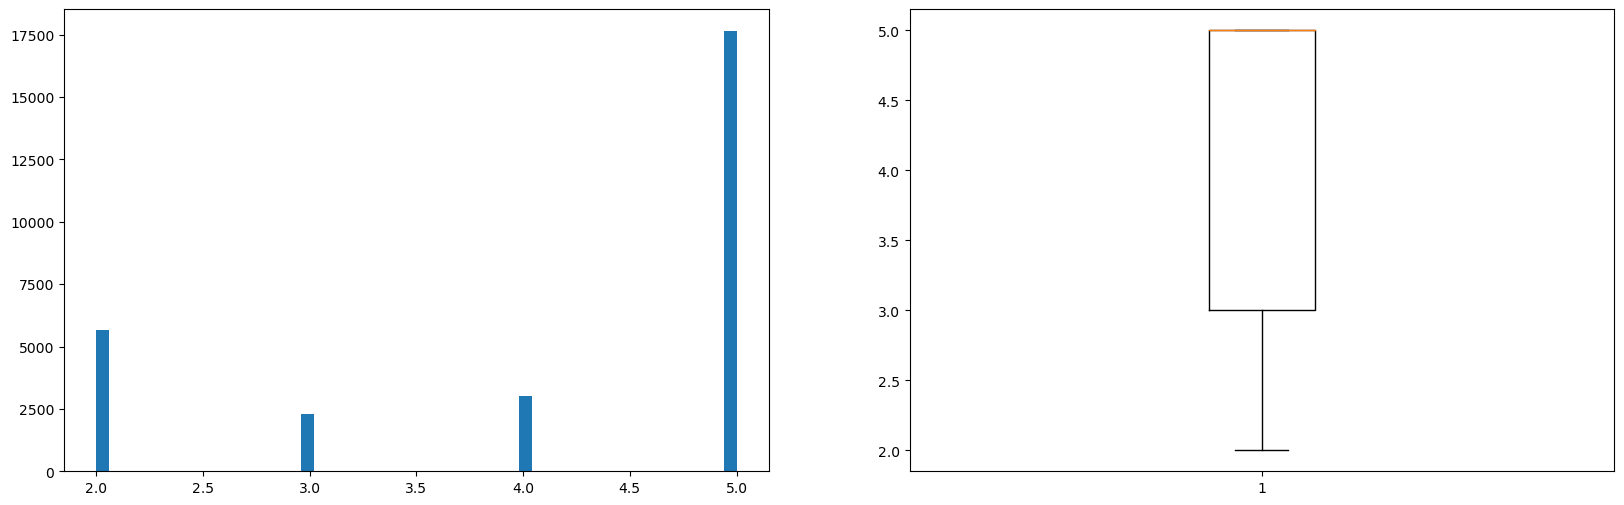

In [45]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.doors, bins=50)

plt.subplot(122)
plt.boxplot(df.doors);

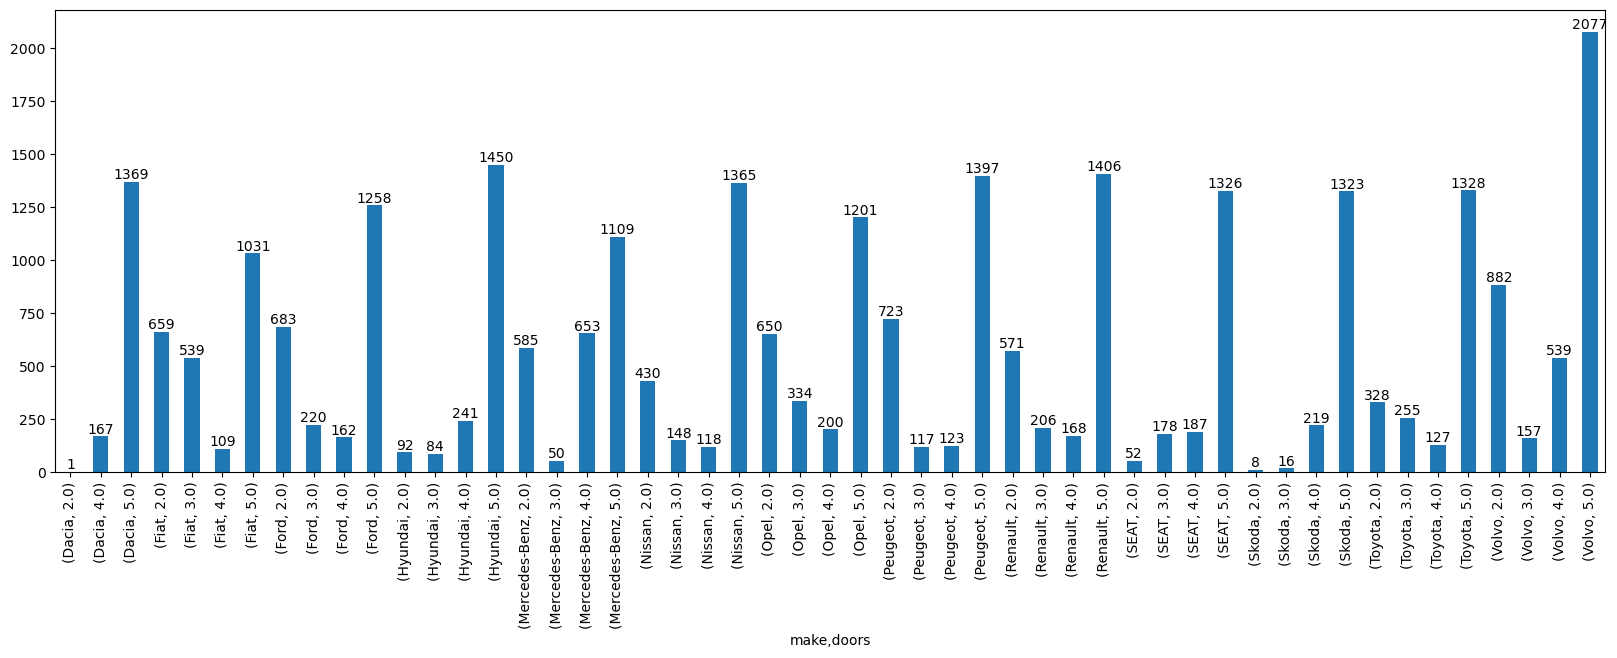

In [49]:
fig, ax = plt.subplots(figsize=(20, 6))

df.groupby(["make", "doors"]).doors.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [243]:
print(df.shape)
df.drop("doors", axis=1, inplace=True)
print(df.shape)

(26909, 28)
(26909, 27)


**mileage**

In [50]:
first_looking("mileage")

COLUMN NAME    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  14183
--------------------------------
mileage
10.0        586
1.0         170
50.0        133
5000.0      118
100.0       118
           ... 
141589.0      1
59821.0       1
123500.0      1
29781.0       1
230047.0      1
Name: count, Length: 14183, dtype: int64


C:\Users\49179\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


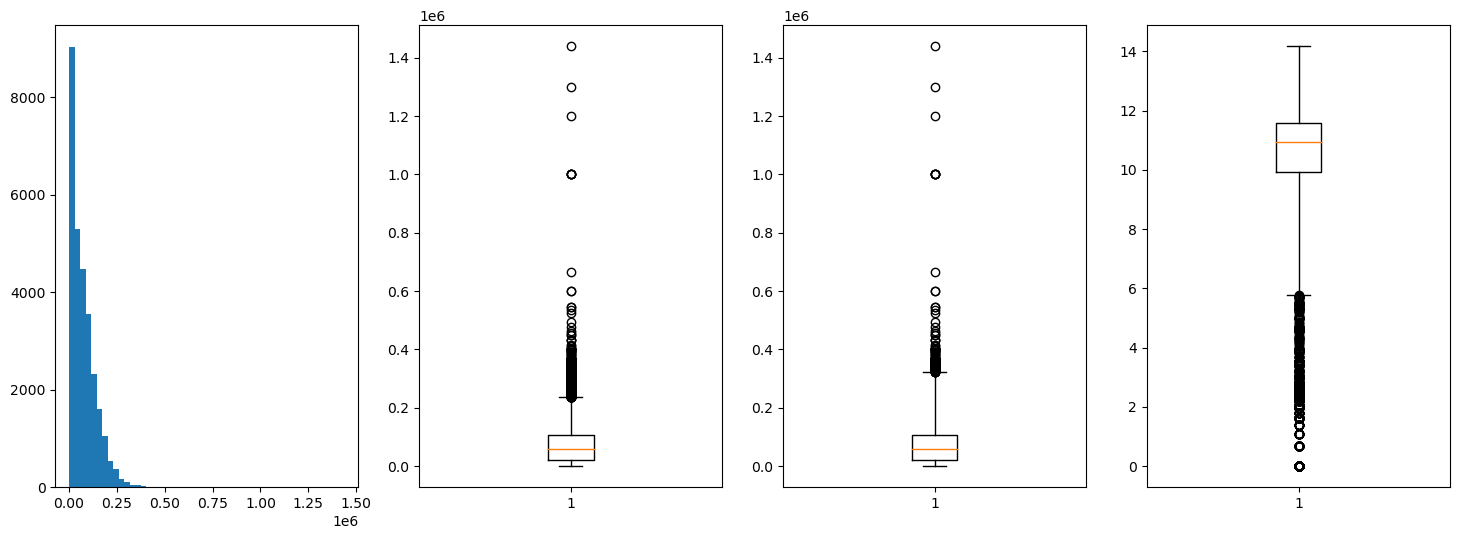

In [51]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.mileage)

plt.subplot(143)
plt.boxplot(df.mileage, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis=2.5)

plt.show()

In [52]:
df.mileage.sort_values().head(20)

10258    0.0
16374    0.0
11078    0.0
22929    0.0
22150    0.0
18363    0.0
18382    0.0
4630     0.0
4309     0.0
22854    0.0
10982    0.0
4450     0.0
6437     0.0
11207    0.0
15950    0.0
21831    0.0
10942    0.0
14796    0.0
14753    0.0
3680     0.0
Name: mileage, dtype: float64

In [53]:
df.mileage.sort_values().tail(20)

28232     448914.0
282       457379.0
6494      461626.0
20092     477000.0
3456      494457.0
18340     523992.0
3212      536388.0
14374     546888.0
17907     547000.0
14360     600000.0
28463     600001.0
13153     667128.0
21344     999999.0
3397      999999.0
10009     999999.0
7684     1000000.0
22889    1000001.0
12169    1199900.0
17324    1300000.0
18873    1440000.0
Name: mileage, dtype: float64

In [58]:
df[df["mileage"] == 999999][["make_model", "type", "mileage", "age"]]

make_model  type   mileage   age
3397    Opel Kadett  Used  999999.0  54.0
10009         Fiat   Used  999999.0  89.0
21344  Ford Mustang  Used  999999.0  56.0

In [54]:
df[df["mileage"] > 1000000][["make_model", "type", "mileage", "age"]]

make_model  type    mileage   age
12169     SEAT Ibiza  Used  1199900.0   4.0
17324  Toyota Celica  Used  1300000.0  36.0
18873   Nissan Micra  Used  1440000.0   3.0
22889    Ford Fiesta  Used  1000001.0   4.0

**I see that there are vehicles with mileage higher than 1 million, I examined these vehicles. It's almost impossible for a 4-year-old car to have that kind of mileage. I will drop these 4 rows, because they probably have incorrect data entry and going to reduce the success of the machine learning model**

In [55]:
drop_mileage_index = df[df["mileage"] > 1000000][["make_model", "type", "mileage", "age"]].index
drop_mileage_index

Index([12169, 17324, 18873, 22889], dtype='int64')

In [56]:
print(df.shape)
df.drop(drop_mileage_index, inplace=True)
print(df.shape)

(28621, 29)
(28617, 29)


C:\Users\49179\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


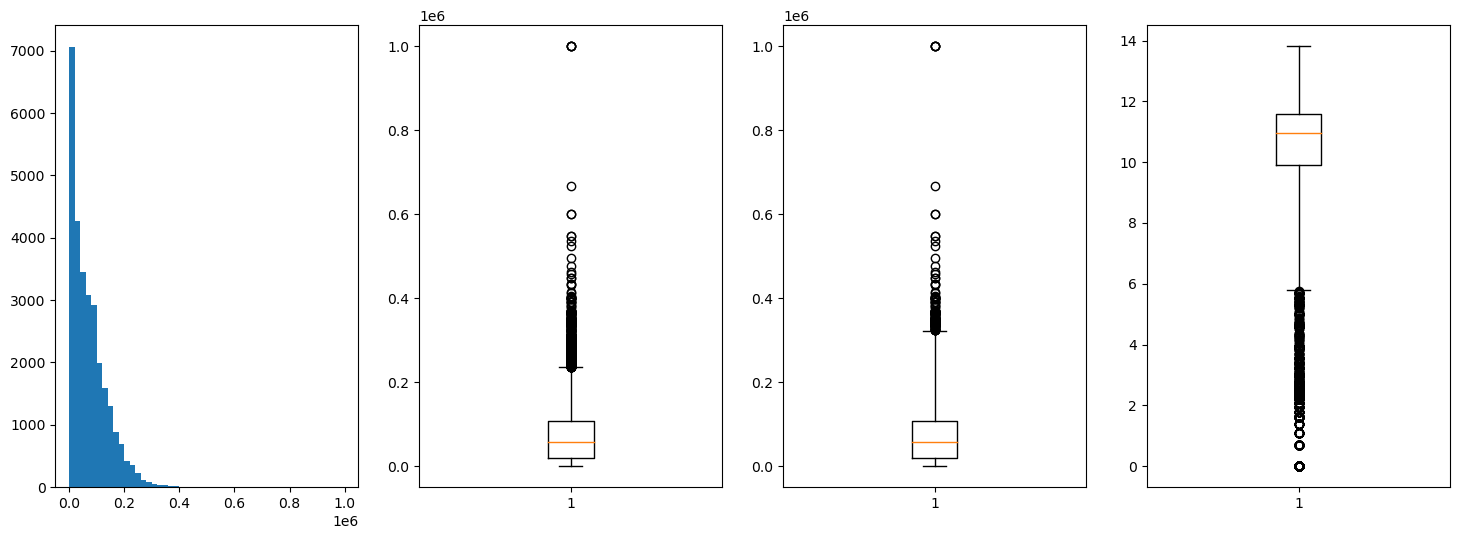

In [59]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.mileage)

plt.subplot(143)
plt.boxplot(df.mileage, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis=2.5)

plt.show()

**mileage is a variable with a wide range of values. However, these extreme values above CAN NOT be considered as genuine outliers since they might be a part of real world scenerio. So, let's keep these extreme values as they are.**

**seats**

In [60]:
first_looking("seats")

COLUMN NAME    :  seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
seats
5.0     20713
4.0      5964
2.0      1265
7.0       542
8.0        44
9.0        35
3.0        26
6.0        12
0.0         9
1.0         5
17.0        2
Name: count, dtype: int64


**"seats" was one of the features I was undecided whether to drop or not. Although the vast majority of the values in this feature are '5', it has 11 unique values. I don't think it's necessary enough to want to put it into my machine learning model and I don't think it's really informative about the car price, so I'll drop it.**

In [61]:
print(df.shape)
df.drop("seats", axis=1, inplace=True)
print(df.shape)

(28617, 29)
(28617, 28)


**engine_size**

In [62]:
first_looking("engine_size")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  466
--------------------------------
engine_size
1598.0     2254
999.0      2144
1969.0     1967
1461.0     1144
1998.0     1055
           ... 
16998.0       1
1196.0        1
1489.0        1
2645.0        1
2473.0        1
Name: count, Length: 466, dtype: int64


In [63]:
df["engine_size"].describe()

count    28617.000000
mean      1745.544152
std       1045.363084
min          0.000000
25%       1300.000000
50%       1598.000000
75%       1984.000000
max      99900.000000
Name: engine_size, dtype: float64

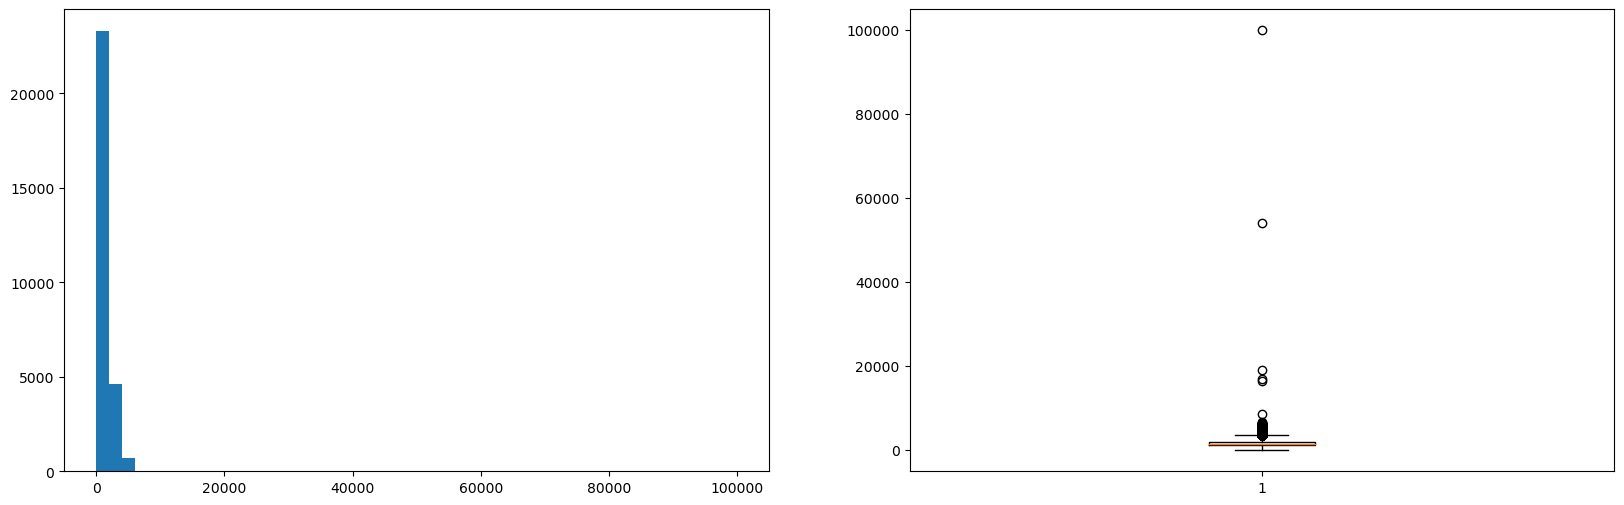

In [64]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=50)

plt.subplot(122)
plt.boxplot(df["engine_size"], whis=2.5)

plt.show()

**I can see that there are some extreme values, I want to examine these values more closely**

In [65]:
df["engine_size"].sort_values(ascending=False).head(20)

16556    99900.0
21330    54009.0
716      19194.0
5580     16998.0
16105    16597.0
21667     8660.0
21797     6653.0
21653     6400.0
21345     6400.0
21393     6387.0
699       6300.0
693       6300.0
21481     6294.0
21333     6276.0
703       6209.0
2169      6208.0
813       6208.0
722       6208.0
1114      6208.0
1214      6208.0
Name: engine_size, dtype: float64

In [66]:
df["engine_size"].sort_values(ascending=True).head(20)

6870     0.0
18587    0.0
10023    0.0
18607    0.0
10033    0.0
10039    0.0
9538     0.0
2745     0.0
9532     0.0
2691     0.0
2688     0.0
18586    0.0
2682     0.0
18716    0.0
16471    0.0
18725    0.0
18726    0.0
18730    0.0
18733    0.0
9522     0.0
Name: engine_size, dtype: float64

In [67]:
df["engine_size"].value_counts().sort_index(ascending=True)

engine_size
0.0        330
1.0        111
2.0         12
4.0          2
5.0          3
          ... 
16597.0      1
16998.0      1
19194.0      1
54009.0      1
99900.0      1
Name: count, Length: 466, dtype: int64

In [68]:
df[df["engine_size"] <= 500][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=True)

make_model   age      body_type    gearbox drivetrain  gears  \
11620    Fiat 500e   1.0          Sedan  Automatic      Front    1.0   
11640    Fiat 500e   0.0          Sedan  Automatic      Front    1.0   
11632    Fiat 500e   1.0          Sedan  Automatic      Front    1.0   
18964  Nissan Leaf   1.0        Compact  Automatic      Front    1.0   
11619    Fiat 500e   1.0          Sedan  Automatic      Front    1.0   
...            ...   ...            ...        ...        ...    ...   
10646    Fiat 500L  51.0          Coupe     Manual       Rear    4.0   
10662    Fiat 500L  50.0          Coupe     Manual       Rear    4.0   
11247     Fiat 500  52.0  Station wagon     Manual      Front    5.0   
10168     Fiat 500  59.0    Convertible     Manual       Rear    4.0   
10335     Fiat 500  62.0          Coupe     Manual      Front    5.0   

       engine_size fuel_type  
11620          0.0  Electric  
11640          0.0  Electric  
11632          0.0  Electric  
18964          0.0  Electric  
11619          0.0  Electric  
...            ...       ...  
10646        499.0   Benzine  
10662        499.0   Benzine  
11247        499.0   Benzine  
10168        500.0   Benzine  
10335        500.0   Benzine  

[471 rows x 8 columns]

**When I examined the values with engine size less than 500, as I expected, most of the cars with engine_size equal to 0 are electric cars. So I don't think there is an incorrect data entry or unwanted outliers in these.**

**But there are also some cars with engine_size not equal to 0 but very small. I would like to investigate them.**

In [77]:
df[(df["engine_size"] >= 2) & (df["engine_size"] <= 500)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=True)

make_model   age         body_type    gearbox drivetrain  \
28528            Volvo S90   1.0             Sedan  Automatic        4WD   
28340            Volvo S90   1.0             Sedan  Automatic        4WD   
21948            Ford Kuga   1.0  Off-Road/Pick-up  Automatic        4WD   
22312            Ford Kuga   4.0  Off-Road/Pick-up     Manual        4WD   
26827           Volvo XC60   0.0  Off-Road/Pick-up  Automatic        4WD   
26950           Volvo XC90   1.0  Off-Road/Pick-up  Automatic        4WD   
27216           Volvo XC60   0.0  Off-Road/Pick-up  Automatic        4WD   
26877           Volvo XC60   0.0  Off-Road/Pick-up  Automatic        4WD   
27336           Volvo XC90   1.0  Off-Road/Pick-up  Automatic        4WD   
2140   Mercedes-Benz E 220  12.0             Sedan     Manual       Rear   
1746   Mercedes-Benz C 250   7.0     Station wagon  Automatic        4WD   
27265           Volvo XC60   0.0  Off-Road/Pick-up  Automatic        4WD   
13253            SEAT Leon   1.0             Sedan  Automatic      Front   
17068          Toyota MR 2  30.0       Convertible     Manual        4WD   
21875         Ford Mustang   2.0             Coupe  Automatic       Rear   
21874         Ford Mustang   2.0             Coupe  Automatic       Rear   
21879         Ford Mustang   5.0             Coupe  Automatic       Rear   
5243        Renault Megane  18.0       Convertible  Automatic       Rear   
3327          Opel Calibra  30.0             Coupe     Manual      Front   
21724         Ford Mustang  56.0             Coupe  Automatic       Rear   
88     Mercedes-Benz E 300  36.0           Compact  Automatic       Rear   
15606         Dacia Duster   1.0  Off-Road/Pick-up     Manual        4WD   
9855              Fiat 500  51.0           Compact     Manual      Front   
10662            Fiat 500L  50.0             Coupe     Manual       Rear   
10646            Fiat 500L  51.0             Coupe     Manual       Rear   
9779             Fiat 500L  52.0           Compact     Manual      Front   
9627       Fiat 500 Abarth  57.0           Compact     Manual       Rear   
11247             Fiat 500  52.0     Station wagon     Manual      Front   
10335             Fiat 500  62.0             Coupe     Manual      Front   
10168             Fiat 500  59.0       Convertible     Manual       Rear   

       gears  engine_size           fuel_type  
28528    8.0          2.0            Electric  
28340    8.0          2.0            Electric  
21948    6.0          2.0            Electric  
22312    6.0          2.0              Diesel  
26827    8.0          2.0              Diesel  
26950    8.0          2.0              Diesel  
27216    8.0          2.0              Diesel  
26877    8.0          2.0              Diesel  
27336    8.0          2.0              Diesel  
2140     9.0          2.0              Diesel  
1746     7.0          2.0             Benzine  
27265    8.0          2.0              Diesel  
13253    6.0          4.0             Benzine  
17068    1.0          4.0             Benzine  
21875   10.0          5.0             Benzine  
21874   10.0          5.0             Benzine  
21879   10.0          5.0             Benzine  
5243     6.0         20.0             Benzine  
3327     5.0        200.0             Benzine  
21724    4.0        289.0             Benzine  
88       9.0        300.0  Liquid/Natural Gas  
15606    6.0        332.0             Benzine  
9855     5.0        498.0             Benzine  
10662    4.0        499.0             Benzine  
10646    4.0        499.0             Benzine  
9779     6.0        499.0             Benzine  
9627     4.0        499.0             Benzine  
11247    5.0        499.0             Benzine  
10335    5.0        500.0             Benzine  
10168    4.0        500.0             Benzine

In [78]:
df.loc[df.make_model == "Volvo S90"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model  age body_type    gearbox drivetrain  gears  engine_size  \
26506  Volvo S90  5.0     Coupe  Automatic        4WD    8.0       2000.0   
26681  Volvo S90  5.0     Coupe  Automatic        4WD    8.0       2000.0   
28255  Volvo S90  4.0     Sedan  Automatic      Front    8.0       1969.0   
28258  Volvo S90  3.0     Sedan  Automatic      Front    8.0       1969.0   
28261  Volvo S90  1.0     Sedan  Automatic        4WD    8.0       1969.0   
...          ...  ...       ...        ...        ...    ...          ...   
28620  Volvo S90  4.0     Sedan  Automatic        4WD    8.0       1969.0   
28621  Volvo S90  4.0     Sedan  Automatic      Front    8.0       1969.0   
28622  Volvo S90  4.0     Sedan  Automatic      Front    8.0       1969.0   
28625  Volvo S90  3.0     Sedan  Automatic        4WD    8.0       1969.0   
28628  Volvo S90  5.0     Sedan  Automatic        4WD    8.0       1969.0   

      fuel_type  
26506    Diesel  
26681    Diesel  
28255    Diesel  
28258    Diesel  
28261   Benzine  
...         ...  
28620   Benzine  
28621    Diesel  
28622    Diesel  
28625    Diesel  
28628   Benzine  

[117 rows x 8 columns]

In [79]:
df.loc[df.make_model == "Ford Kuga"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age         body_type    gearbox drivetrain  gears  \
20803  Ford Kuga   5.0           Compact     Manual      Front    6.0   
21931  Ford Kuga   1.0  Off-Road/Pick-up  Automatic      Front    8.0   
21932  Ford Kuga  10.0  Off-Road/Pick-up     Manual      Front    6.0   
21933  Ford Kuga  10.0  Off-Road/Pick-up  Automatic        4WD    6.0   
21934  Ford Kuga  13.0  Off-Road/Pick-up     Manual        4WD    6.0   
...          ...   ...               ...        ...        ...    ...   
22319  Ford Kuga   7.0  Off-Road/Pick-up     Manual        4WD    6.0   
22320  Ford Kuga   0.0  Off-Road/Pick-up     Manual      Front    6.0   
22820  Ford Kuga   1.0             Sedan     Manual        4WD    6.0   
22826  Ford Kuga   1.0             Sedan     Manual        4WD    6.0   
22831  Ford Kuga   1.0             Sedan     Manual        4WD    6.0   

       engine_size fuel_type  
20803       1498.0   Benzine  
21931       2500.0   Benzine  
21932       1997.0    Diesel  
21933       1997.0    Diesel  
21934       2521.0   Benzine  
...            ...       ...  
22319       1997.0    Diesel  
22320       1496.0   Benzine  
22820       2000.0    Diesel  
22826       2000.0    Diesel  
22831       2000.0    Diesel  

[210 rows x 8 columns]

In [80]:
df.loc[df.make_model == "Volvo XC60"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age    body_type    gearbox drivetrain  gears  \
24980  Volvo XC60   1.0      Compact  Automatic        4WD    8.0   
25373  Volvo XC60   1.0      Compact  Automatic        4WD    8.0   
26042  Volvo XC60   4.0  Convertible  Automatic        4WD    8.0   
26355  Volvo XC60   4.0  Convertible  Automatic        4WD    8.0   
26385  Volvo XC60   6.0        Coupe  Automatic        4WD    8.0   
...           ...   ...          ...        ...        ...    ...   
28535  Volvo XC60  10.0        Sedan  Automatic        4WD    6.0   
28570  Volvo XC60   0.0        Sedan  Automatic        4WD    6.0   
28606  Volvo XC60   3.0        Sedan  Automatic        4WD    6.0   
28608  Volvo XC60   8.0        Sedan  Automatic        4WD    6.0   
28609  Volvo XC60   3.0        Sedan  Automatic        4WD    6.0   

       engine_size fuel_type  
24980       1969.0   Benzine  
25373       1969.0   Benzine  
26042       1969.0    Diesel  
26355       1969.0    Diesel  
26385       1969.0    Diesel  
...            ...       ...  
28535       2400.0    Diesel  
28570       1969.0    Diesel  
28606       1969.0    Diesel  
28608       1969.0   Benzine  
28609       1969.0    Diesel  

[364 rows x 8 columns]

In [81]:
df.loc[df.make_model == "Mercedes-Benz E 220"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age    body_type    gearbox drivetrain  gears  \
33    Mercedes-Benz E 220   6.0      Compact     Manual       Rear    9.0   
287   Mercedes-Benz E 220   5.0      Compact  Automatic       Rear    9.0   
428   Mercedes-Benz E 220  10.0  Convertible  Automatic       Rear    7.0   
469   Mercedes-Benz E 220   5.0  Convertible  Automatic       Rear    9.0   
513   Mercedes-Benz E 220   6.0  Convertible  Automatic       Rear    9.0   
...                   ...   ...          ...        ...        ...    ...   
2315  Mercedes-Benz E 220   0.0        Sedan  Automatic       Rear    9.0   
2319  Mercedes-Benz E 220   3.0        Sedan  Automatic       Rear    9.0   
2338  Mercedes-Benz E 220   2.0        Sedan  Automatic       Rear    9.0   
2351  Mercedes-Benz E 220   3.0        Sedan  Automatic       Rear    9.0   
2353  Mercedes-Benz E 220   7.0        Sedan  Automatic       Rear    9.0   

      engine_size fuel_type  
33         2143.0    Diesel  
287        1950.0    Diesel  
428        2143.0    Diesel  
469        2143.0    Diesel  
513        2143.0    Diesel  
...           ...       ...  
2315       1993.0    Diesel  
2319       1950.0    Diesel  
2338       1950.0    Diesel  
2351       1950.0    Diesel  
2353       2143.0    Diesel  

[61 rows x 8 columns]

In [82]:
df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age         body_type    gearbox drivetrain  gears  \
20930  Ford Mustang  17.0           Compact  Automatic       Rear    6.0   
21156  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
21157  Ford Mustang   7.0       Convertible  Automatic       Rear    6.0   
21158  Ford Mustang   3.0       Convertible  Automatic       Rear   10.0   
21159  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
...             ...   ...               ...        ...        ...    ...   
21929  Ford Mustang   9.0             Coupe  Automatic       Rear   10.0   
21930  Ford Mustang   4.0             Coupe  Automatic       Rear   10.0   
21953  Ford Mustang   0.0  Off-Road/Pick-up  Automatic        4WD    1.0   
21955  Ford Mustang   1.0  Off-Road/Pick-up  Automatic        4WD    1.0   
22123  Ford Mustang   1.0  Off-Road/Pick-up  Automatic        4WD    1.0   

       engine_size fuel_type  
20930       4598.0   Benzine  
21156       5038.0   Benzine  
21157       5038.0   Benzine  
21158       5038.0   Benzine  
21159       5038.0   Benzine  
...            ...       ...  
21929       3700.0   Benzine  
21930       2261.0   Benzine  
21953       5038.0   Benzine  
21955       5038.0  Electric  
22123       5038.0   Benzine  

[663 rows x 8 columns]

In [83]:
df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age body_type    gearbox drivetrain  gears  \
4783  Renault Megane   1.0   Compact     Manual      Front    6.0   
4786  Renault Megane   1.0   Compact  Automatic      Front    6.0   
4789  Renault Megane   4.0   Compact  Automatic      Front    7.0   
4791  Renault Megane   7.0   Compact     Manual      Front    6.0   
4793  Renault Megane   8.0   Compact     Manual      Front    6.0   
...              ...   ...       ...        ...        ...    ...   
7111  Renault Megane   0.0     Sedan  Automatic      Front    6.0   
7115  Renault Megane  10.0     Sedan     Manual      Front    6.0   
7117  Renault Megane   2.0     Sedan     Manual      Front    6.0   
7118  Renault Megane   2.0     Sedan  Automatic      Front    7.0   
7123  Renault Megane   2.0     Sedan     Manual      Front    6.0   

      engine_size fuel_type  
4783       1332.0   Benzine  
4786       1798.0   Benzine  
4789       1500.0    Diesel  
4791       1461.0    Diesel  
4793       1461.0    Diesel  
...           ...       ...  
7111       1461.0   Benzine  
7115       1200.0   Benzine  
7117       1461.0    Diesel  
7118       1461.0    Diesel  
7123       1461.0    Diesel  

[863 rows x 8 columns]

**After I examined these make_models, I see that there are incorrect data entries in them**

In [69]:
df["engine_size"].value_counts().sort_index(ascending=False)

engine_size
99900.0      1
54009.0      1
19194.0      1
16998.0      1
16597.0      1
          ... 
5.0          3
4.0          2
2.0         12
1.0        111
0.0        330
Name: count, Length: 466, dtype: int64

**Likewise, I would like to examine vehicles with a very large engine_size.**

In [70]:
df[df["engine_size"] > 4000][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=False)

make_model   age      body_type    gearbox drivetrain  gears  \
16556         Dacia Sandero   3.0          Sedan     Manual      Front    5.0   
21330          Ford Mustang  14.0    Convertible     Manual       Rear    6.0   
716    Mercedes-Benz SL 320  21.0    Convertible  Automatic       Rear    5.0   
5580         Renault Megane   7.0          Coupe     Manual      Front    6.0   
16105          Dacia Dokker   0.0  Station wagon     Manual      Front    5.0   
...                     ...   ...            ...        ...        ...    ...   
21365                 Ford   14.0    Convertible  Automatic       Rear    3.0   
21414          Ford Mustang  15.0    Convertible  Automatic       Rear    6.0   
21446          Ford Mustang  16.0    Convertible  Automatic       Rear    6.0   
21448          Ford Mustang  11.0    Convertible  Automatic       Rear    6.0   
21490          Ford Mustang  16.0    Convertible  Automatic       Rear    6.0   

       engine_size           fuel_type  
16556      99900.0             Benzine  
21330      54009.0             Benzine  
716        19194.0             Benzine  
5580       16998.0             Benzine  
16105      16597.0  Liquid/Natural Gas  
...            ...                 ...  
21365       4009.0             Benzine  
21414       4009.0             Benzine  
21446       4009.0             Benzine  
21448       4009.0             Benzine  
21490       4006.0             Benzine  

[697 rows x 8 columns]

In [71]:
df.loc[df.make_model == "Ford Thunderbird"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age    body_type    gearbox drivetrain  gears  \
21220  Ford Thunderbird  20.0  Convertible  Automatic       Rear    5.0   
21243  Ford Thunderbird  61.0  Convertible  Automatic       Rear    3.0   
21318  Ford Thunderbird  67.0  Convertible     Manual       Rear    4.0   
21343  Ford Thunderbird  64.0  Convertible  Automatic       Rear    3.0   
21345  Ford Thunderbird  59.0  Convertible  Automatic       Rear    3.0   
21366  Ford Thunderbird  67.0  Convertible  Automatic      Front    3.0   
21371  Ford Thunderbird  17.0  Convertible  Automatic       Rear    5.0   
21424  Ford Thunderbird  67.0  Convertible  Automatic       Rear    3.0   
21459  Ford Thunderbird  67.0  Convertible  Automatic       Rear    3.0   
21476  Ford Thunderbird  65.0  Convertible  Automatic       Rear    3.0   

       engine_size fuel_type  
21220       3950.0   Benzine  
21243       3950.0   Benzine  
21318       5000.0   Benzine  
21343       5766.0   Benzine  
21345       6400.0   Benzine  
21366       3950.0   Benzine  
21371       3950.0   Benzine  
21424       4800.0   Benzine  
21459       5200.0   Benzine  
21476       3950.0   Benzine

In [72]:
df.loc[df.make_model == "Ford Fairlane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age    body_type    gearbox drivetrain  gears  \
21329  Ford Fairlane  64.0  Convertible     Manual       Rear    6.0   
21421  Ford Fairlane  63.0  Convertible  Automatic       Rear    6.0   

       engine_size fuel_type  
21329       5768.0   Benzine  
21421       5689.0   Benzine

In [73]:
df.loc[df.make_model == "Dacia Sandero"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model  age body_type gearbox drivetrain  gears  engine_size  \
15142  Dacia Sandero  4.0   Compact  Manual      Front    5.0        898.0   
15154  Dacia Sandero  0.0   Compact  Manual      Front    6.0        999.0   
15160  Dacia Sandero  0.0   Compact  Manual      Front    6.0        999.0   
15162  Dacia Sandero  0.0   Compact  Manual      Front    6.0        999.0   
15163  Dacia Sandero  0.0   Compact  Manual      Front    6.0        999.0   
...              ...  ...       ...     ...        ...    ...          ...   
16673  Dacia Sandero  3.0     Sedan  Manual      Front    5.0        900.0   
16674  Dacia Sandero  6.0     Sedan  Manual      Front    5.0        898.0   
16675  Dacia Sandero  4.0     Sedan  Manual      Front    5.0       1000.0   
16676  Dacia Sandero  2.0     Sedan  Manual      Front    5.0        898.0   
16677  Dacia Sandero  7.0     Sedan  Manual      Front    5.0        900.0   

                fuel_type  
15142             Benzine  
15154  Liquid/Natural Gas  
15160             Benzine  
15162  Liquid/Natural Gas  
15163  Liquid/Natural Gas  
...                   ...  
16673             Benzine  
16674             Benzine  
16675             Benzine  
16676             Benzine  
16677             Benzine  

[730 rows x 8 columns]

In [74]:
df.loc[df.make_model == "Mercedes-Benz SL 320"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age    body_type    gearbox drivetrain  gears  \
716  Mercedes-Benz SL 320  21.0  Convertible  Automatic       Rear    5.0   
733  Mercedes-Benz SL 320  29.0  Convertible  Automatic       Rear    5.0   
823  Mercedes-Benz SL 320  29.0        Coupe  Automatic       Rear    5.0   

     engine_size fuel_type  
716      19194.0   Benzine  
733       3200.0   Benzine  
823       3199.0   Benzine

In [75]:
df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model   age body_type    gearbox drivetrain  gears  \
4783  Renault Megane   1.0   Compact     Manual      Front    6.0   
4786  Renault Megane   1.0   Compact  Automatic      Front    6.0   
4789  Renault Megane   4.0   Compact  Automatic      Front    7.0   
4791  Renault Megane   7.0   Compact     Manual      Front    6.0   
4793  Renault Megane   8.0   Compact     Manual      Front    6.0   
...              ...   ...       ...        ...        ...    ...   
7111  Renault Megane   0.0     Sedan  Automatic      Front    6.0   
7115  Renault Megane  10.0     Sedan     Manual      Front    6.0   
7117  Renault Megane   2.0     Sedan     Manual      Front    6.0   
7118  Renault Megane   2.0     Sedan  Automatic      Front    7.0   
7123  Renault Megane   2.0     Sedan     Manual      Front    6.0   

      engine_size fuel_type  
4783       1332.0   Benzine  
4786       1798.0   Benzine  
4789       1500.0    Diesel  
4791       1461.0    Diesel  
4793       1461.0    Diesel  
...           ...       ...  
7111       1461.0   Benzine  
7115       1200.0   Benzine  
7117       1461.0    Diesel  
7118       1461.0    Diesel  
7123       1461.0    Diesel  

[863 rows x 8 columns]

In [76]:
df.loc[df.make_model == "Dacia Dokker"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

make_model  age         body_type gearbox drivetrain  gears  \
15378  Dacia Dokker  4.0           Compact  Manual      Front    5.0   
15858  Dacia Dokker  4.0  Off-Road/Pick-up  Manual      Front    5.0   
15873  Dacia Dokker  4.0  Off-Road/Pick-up  Manual      Front    5.0   
15934  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
15937  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
15938  Dacia Dokker  2.0     Station wagon  Manual      Front    5.0   
15941  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15947  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
15949  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15958  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
15967  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15970  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15972  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
15974  Dacia Dokker  6.0     Station wagon  Manual      Front    5.0   
15976  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15982  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15988  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15989  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
15990  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
15993  Dacia Dokker  8.0     Station wagon  Manual      Front    5.0   
15994  Dacia Dokker  6.0     Station wagon  Manual      Front    5.0   
15996  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16007  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
16019  Dacia Dokker  1.0     Station wagon  Manual      Front    5.0   
16022  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
16023  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16038  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16044  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16046  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
16056  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16057  Dacia Dokker  7.0     Station wagon  Manual      Front    5.0   
16060  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
16067  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
16082  Dacia Dokker  8.0     Station wagon  Manual      Front    5.0   
16092  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16093  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16098  Dacia Dokker  7.0     Station wagon  Manual      Front    5.0   
16103  Dacia Dokker  9.0     Station wagon  Manual      Front    5.0   
16105  Dacia Dokker  0.0     Station wagon  Manual      Front    5.0   
16111  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
16118  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
16132  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16167  Dacia Dokker  8.0     Station wagon  Manual      Front    5.0   
16173  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16175  Dacia Dokker  3.0     Station wagon  Manual      Front    6.0   
16178  Dacia Dokker  7.0     Station wagon  Manual      Front    5.0   
16181  Dacia Dokker  2.0     Station wagon  Manual      Front    6.0   
16200  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
16241  Dacia Dokker  5.0     Station wagon  Manual      Front    5.0   
16250  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
16260  Dacia Dokker  3.0     Station wagon  Manual      Front    5.0   
16263  Dacia Dokker  7.0     Station wagon  Manual      Front    5.0   
16264  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16271  Dacia Dokker  4.0     Station wagon  Manual      Front    5.0   
16285  Dacia Dokker  4.0     Station wagon  Manua

**In the same way I see that the ones with engine_size greater than 8000 are probably so because of the incorrect data entry. Even if they are correct, I need to correct this data so as not to decrease the success of my machine learning model. So I will first convert this data to NaN values and then I will fill it again using the methods I know.**

In [92]:
df.loc[((df["engine_size"] <= 300) | (df["engine_size"] > 8000)), 'engine_size'] = np.nan

In [93]:
df["engine_size"].isnull().sum()

468

**I will now fill the missing values in these engine_sizes according to the mode of the respective group.**

In [94]:
fill(df, "make_model", "body_type", "engine_size", "mode")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  451
--------------------------------
engine_size
1598.0    2540
999.0     2151
1969.0    1977
1461.0    1146
1998.0    1058
          ... 
2829.0       1
1974.0       1
5950.0       1
1616.0       1
2473.0       1
Name: count, Length: 451, dtype: int64


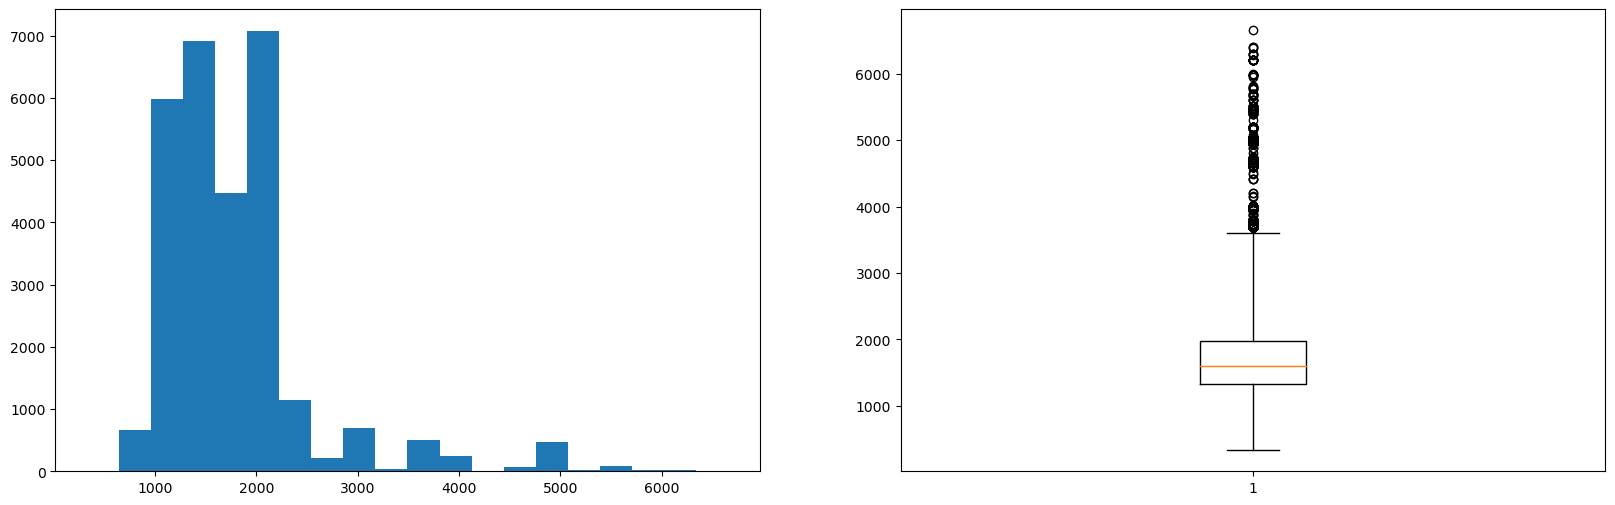

In [95]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=20)

plt.subplot(122)
plt.boxplot(df["engine_size"], whis=2.5)

plt.show()

**gears**

In [96]:
first_looking("gears")

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
gears
6.0     12244
5.0      7796
8.0      2737
7.0      2631
1.0      1348
9.0      1143
4.0       379
10.0      244
3.0        61
0.0        31
2.0         3
Name: count, dtype: int64


In [97]:
df.gears.describe()

count    28617.000000
mean         5.889401
std          1.587810
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: gears, dtype: float64

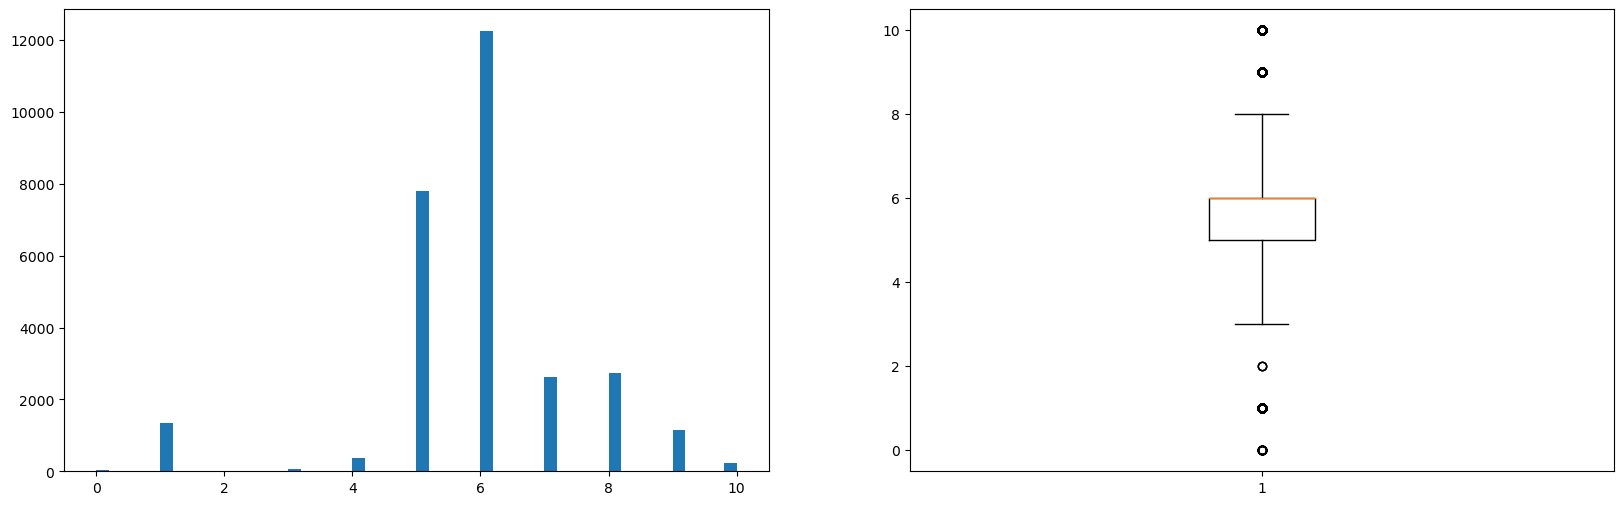

In [98]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.gears, bins=50)

plt.subplot(122)
plt.boxplot(df.gears, whis=2.5)

plt.show()

In [99]:
df.sort_values(by=["gears"], ascending=False)["gears"].head(20)

21557    10.0
21701    10.0
21665    10.0
21666    10.0
21947    10.0
22152    10.0
21669    10.0
21673    10.0
21297    10.0
21676    10.0
21679    10.0
21680    10.0
21681    10.0
21685    10.0
21689    10.0
21690    10.0
21691    10.0
21694    10.0
21158    10.0
21695    10.0
Name: gears, dtype: float64

In [100]:
df.sort_values(by=["gears"], ascending=True)["gears"].head(20)

18121    0.0
1396     0.0
18657    0.0
17930    0.0
18598    0.0
5122     0.0
19477    0.0
12801    0.0
28557    0.0
28556    0.0
6211     0.0
18150    0.0
19520    0.0
19289    0.0
23951    0.0
19504    0.0
22783    0.0
18583    0.0
20567    0.0
23760    0.0
Name: gears, dtype: float64

**Let's check the observations having extreme "gear" values**

In [101]:
df[(df.gears < 5) | (df.gears > 8)][["make_model", "body_type", "gearbox", "fuel_type", "gears"]]

make_model body_type    gearbox fuel_type  gears
1      Mercedes-Benz EQE 350   Compact  Automatic  Electric    9.0
9        Mercedes-Benz A 200   Compact  Automatic    Diesel    1.0
24     Mercedes-Benz GLC 220   Compact  Automatic    Diesel    9.0
33       Mercedes-Benz E 220   Compact     Manual    Diesel    9.0
73       Mercedes-Benz V 220   Compact     Manual    Diesel    9.0
...                      ...       ...        ...       ...    ...
28447              Volvo S90     Sedan  Automatic   Benzine    4.0
28504              Volvo 240     Sedan  Automatic   Benzine    1.0
28518              Volvo S60     Sedan  Automatic   Benzine    4.0
28556              Volvo S90     Sedan  Automatic    Diesel    0.0
28557              Volvo S90     Sedan  Automatic    Diesel    0.0

[3209 rows x 5 columns]

In [102]:
df[(df.make_model == "Mercedes-Benz EQE 350")][["make_model", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model      body_type    gearbox drivetrain  gears  \
1     Mercedes-Benz EQE 350        Compact  Automatic        4WD    9.0   
1777  Mercedes-Benz EQE 350  Station wagon  Automatic        4WD    1.0   
2246  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   
2272  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   
2276  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   
2278  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   
2301  Mercedes-Benz EQE 350          Sedan  Automatic       Rear    1.0   
2317  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   
2328  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   
2356  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   
2372  Mercedes-Benz EQE 350          Sedan  Automatic        4WD    1.0   

     fuel_type  
1     Electric  
1777  Electric  
2246  Electric  
2272  Electric  
2276  Electric  
2278  Electric  
2301  Electric  
2317  Electric  
2328  Electric  
2356  Electric  
2372  Electric

**We see that all the data here comes from electric vehicles**

**But actually the electric vehicles generally do not have any gear, or to put it more accurately, they don't have more than one gear, because they don’t really need more than one gear**

**However, if the vehicle is hybrit, it might have more than one gear.**

**As seen below, the majority of Electric Cars have a gear of 1:**

In [106]:
df[(df["fuel_type"] == "Electric")]["gears"].value_counts()

gears
1.0    389
8.0     17
6.0     14
5.0      5
9.0      4
0.0      4
3.0      3
4.0      2
Name: count, dtype: int64

**On the other hand; most modern cars with manual transmissions have 5 or 6 forward gears. Most modern cars with automatic transmissions have 5–8 forward gears.**

In [107]:
df[((df["fuel_type"] == "Benzine")|(df["fuel_type"] == "Diesel")|(df["fuel_type"] == "Liquid/Natural Gas"))][["fuel_type", "gears", "make_model"]].value_counts()

fuel_type           gears  make_model         
Diesel              6.0    Volvo V40              563
Benzine             5.0    Dacia Sandero          502
                    6.0    Hyundai i30            455
                           Renault Megane         451
                    5.0    Volvo C70              419
                                                 ... 
                    7.0    Skoda Yeti               1
                           Toyota Avensis           1
                    8.0    Ford Edge                1
                           Ford Mustang             1
Liquid/Natural Gas  9.0    Mercedes-Benz E 300      1
Name: count, Length: 1476, dtype: int64

In [108]:
# Domain Knowledge: Ford Mustang has 6 Speed Automatic Gear Box
df[(df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")][["make_model", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model         body_type    gearbox drivetrain  gears fuel_type
20930  Ford Mustang           Compact  Automatic       Rear    6.0   Benzine
21156  Ford Mustang       Convertible  Automatic       Rear    6.0   Benzine
21157  Ford Mustang       Convertible  Automatic       Rear    6.0   Benzine
21158  Ford Mustang       Convertible  Automatic       Rear   10.0   Benzine
21159  Ford Mustang       Convertible  Automatic       Rear    6.0   Benzine
...             ...               ...        ...        ...    ...       ...
21928  Ford Mustang             Coupe  Automatic       Rear    6.0   Benzine
21929  Ford Mustang             Coupe  Automatic       Rear   10.0   Benzine
21930  Ford Mustang             Coupe  Automatic       Rear   10.0   Benzine
21953  Ford Mustang  Off-Road/Pick-up  Automatic        4WD    1.0   Benzine
22123  Ford Mustang  Off-Road/Pick-up  Automatic        4WD    1.0   Benzine

[662 rows x 6 columns]

In [109]:
df.loc[((df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")), "gears"] = 6

**Due to the unstandardized situations in the concepts of the automotive sector mentioned above, more than 8-gear for traditional vehicles or vehicles having 0-Gear for electric ones will be EITHER dropped from the dataset OR imputed consistent with "make_model" & "body_type" features, assuming that they do NOT reflect reality. Now let's check the observations having extreme "gear" values**

In [111]:
df[df.gears > 8][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model   age         body_type    gearbox drivetrain  \
1      Mercedes-Benz EQE 350   0.0           Compact  Automatic        4WD   
24     Mercedes-Benz GLC 220   1.0           Compact  Automatic        4WD   
33       Mercedes-Benz E 220   6.0           Compact     Manual       Rear   
73       Mercedes-Benz V 220   6.0           Compact     Manual      Front   
88       Mercedes-Benz E 300  36.0           Compact  Automatic       Rear   
...                      ...   ...               ...        ...        ...   
22173          Ford Explorer   2.0  Off-Road/Pick-up  Automatic        4WD   
22180             Ford F 150   0.0  Off-Road/Pick-up  Automatic        4WD   
22189          Ford Explorer   1.0  Off-Road/Pick-up  Automatic        4WD   
22250            Ford Ranger   3.0  Off-Road/Pick-up  Automatic        4WD   
22310          Ford Explorer   1.0  Off-Road/Pick-up  Automatic        4WD   

       gears           fuel_type  
1        9.0            Electric  
24       9.0              Diesel  
33       9.0              Diesel  
73       9.0              Diesel  
88       9.0  Liquid/Natural Gas  
...      ...                 ...  
22173   10.0             Benzine  
22180   10.0             Benzine  
22189   10.0             Benzine  
22250   10.0              Diesel  
22310   10.0             Benzine  

[1161 rows x 7 columns]

In [112]:
df[df.gears == 0][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model   age         body_type         gearbox  \
1177     Mercedes-Benz E 300   3.0             Coupe       Automatic   
1396   Mercedes-Benz GLS 400   2.0  Off-Road/Pick-up       Automatic   
5122             Renault ZOE   3.0           Compact       Automatic   
6211          Renault Kadjar   2.0  Off-Road/Pick-up       Automatic   
9102         Peugeot Partner   4.0     Station wagon          Manual   
9770                Fiat 500   1.0           Compact       Automatic   
12801           SEAT Tarraco   3.0  Off-Road/Pick-up       Automatic   
15106          Skoda Octavia   0.0             Sedan       Automatic   
17930            Toyota C-HR   4.0  Off-Road/Pick-up       Automatic   
17945            Toyota C-HR   1.0  Off-Road/Pick-up       Automatic   
18100         Toyota Corolla   3.0     Station wagon       Automatic   
18121         Toyota Corolla   1.0     Station wagon       Automatic   
18150         Toyota Corolla   3.0     Station wagon       Automatic   
18583           Toyota Yaris   3.0             Sedan       Automatic   
18598           Toyota Yaris   3.0             Sedan       Automatic   
18608           Toyota Yaris   4.0             Sedan       Automatic   
18646           Toyota Yaris   3.0             Sedan       Automatic   
18654           Toyota Yaris   4.0             Sedan       Automatic   
18657           Toyota Yaris   4.0             Sedan       Automatic   
19289            Nissan 370Z   9.0             Coupe       Automatic   
19477            Nissan 370Z   9.0             Coupe       Automatic   
19504            Nissan 370Z   9.0             Coupe       Automatic   
19520            Nissan 370Z   9.0             Coupe       Automatic   
20567           Nissan Micra   0.0             Sedan       Automatic   
22307              Ford Kuga   0.0  Off-Road/Pick-up  Semi-automatic   
22783    Ford Mustang Mach-E   0.0             Sedan  Semi-automatic   
23760          Hyundai Excel  24.0             Coupe       Automatic   
23951           Hyundai KONA   2.0  Off-Road/Pick-up       Automatic   
28556              Volvo S90   5.0             Sedan       Automatic   
28557              Volvo S90   5.0             Sedan       Automatic   

      drivetrain  gears fuel_type  
1177        Rear    0.0    Diesel  
1396         4WD    0.0    Diesel  
5122       Front    0.0  Electric  
6211       Front    0.0   Benzine  
9102       Front    0.0  Electric  
9770       Front    0.0   Benzine  
12801        4WD    0.0    Diesel  
15106      Front    0.0   Benzine  
17930      Front    0.0   Benzine  
17945      Front    0.0   Benzine  
18100      Front    0.0   Benzine  
18121      Front    0.0   Benzine  
18150      Front    0.0   Benzine  
18583      Front    0.0   Benzine  
18598      Front    0.0   Benzine  
18608      Front    0.0   Benzine  
18646      Front    0.0   Benzine  
18654      Front    0.0   Benzine  
18657      Front    0.0   Benzine  
19289       Rear    0.0   Benzine  
19477       Rear    0.0   Benzine  
19504       Rear    0.0   Benzine  
19520       Rear    0.0   Benzine  
20567      Front    0.0   Benzine  
22307        4WD    0.0    Diesel  
22783        4WD    0.0  Electric  
23760      Front    0.0   Benzine  
23951      Front    0.0  Electric  
28556        4WD    0.0    Diesel  
28557        4WD    0.0    Diesel

In [113]:
df[(df.gears > 1) & (df.gears < 5)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model   age    body_type    gearbox drivetrain  gears  \
377       Mercedes-Benz 220  13.0      Compact     Manual       Rear    4.0   
443       Mercedes-Benz 500  31.0  Convertible  Automatic       Rear    4.0   
538    Mercedes-Benz SL 300  35.0  Convertible  Automatic       Rear    4.0   
556    Mercedes-Benz SL 280  43.0  Convertible  Automatic       Rear    4.0   
571    Mercedes-Benz SL 500  38.0  Convertible  Automatic       Rear    4.0   
...                     ...   ...          ...        ...        ...    ...   
26698                Volvo   69.0        Coupe     Manual       Rear    4.0   
26709             Volvo 262  45.0        Coupe     Manual       Rear    4.0   
26719             Volvo 480  31.0        Coupe  Automatic      Front    4.0   
28447             Volvo S90  25.0        Sedan  Automatic       Rear    4.0   
28518             Volvo S60  18.0        Sedan  Automatic      Front    4.0   

      fuel_type  
377      Diesel  
443     Benzine  
538     Benzine  
556     Benzine  
571     Benzine  
...         ...  
26698   Benzine  
26709   Benzine  
26719   Benzine  
28447   Benzine  
28518   Benzine  

[418 rows x 7 columns]

**But I can't conclude that these ones are incorrect data input. I can give some examples of this using domain knowledge:**

All automatic Nissan Stageas were 4 speed.

The 300ZX offers three types of transmissions to choose from-5-speed manual with the VG30ET and 5-speed manual or 4-speed automatic with the VG30E.

The Nissan Figaro is equipped with a turbocharged, 4 cylinder, fuel injected MA10ET engine mated to a 3-speed automatic gearbox......

**Therefore I will identify the values that are outside the limits mentioned above and fill them according to the mode of the respective group.**

In [115]:
df.loc[((df.gears == 0) | (df.gears > 8)), 'gears'] = np.nan

In [116]:
df.gears.isnull().sum()

1191

In [117]:
fill(df, "make_model", "body_type", "gears", "mode")

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8
--------------------------------
gears
6.0    13074
5.0     7813
7.0     3174
8.0     2786
1.0     1352
4.0      363
3.0       52
2.0        3
Name: count, dtype: int64


**Now lets look at the cars, that have 2 gears**

In [118]:
df[df.gears==2]

make_model  make    price body_type  type  doors warranty   mileage  \
9513       Fiat 500  Fiat  10950.0   Compact  Used    3.0       No   13500.0   
21744  Ford Mercury  Ford  38990.0     Coupe  Used    3.0       No   93522.0   
21814  Ford Mercury  Ford  26750.0     Coupe  Used    3.0       No  124000.0   

         gearbox fuel_type  ... non_smoker_vehicle         upholstery  \
9513      Manual   Benzine  ...                 No              Cloth   
21744  Automatic   Benzine  ...                 No  Part/Full Leather   
21814  Automatic   Benzine  ...                 No  Part/Full Leather   

       previous_owner  energy_efficiency_class   age power_kw  cons_avg  \
9513              2.0              unefficient  11.0     17.0      4.15   
21744             4.0                efficient  52.0    187.0      5.30   
21814             2.0                efficient  65.0    218.0      5.30   

      comfort_&_convenience_Package entertainment_&_media_Package  \
9513                       Standard                      Standard   
21744                      Standard                      Standard   
21814                      Standard                      Standard   

      safety_&_security_Package  
9513    Safety Standard Package  
21744   Safety Standard Package  
21814   Safety Standard Package  

[3 rows x 28 columns]

**I have also decided to drop these rows from the data set**

In [119]:
print(df.shape)
df.drop(df[df.gears==2].index, axis=0, inplace=True)
print(df.shape)

(28617, 28)
(28614, 28)


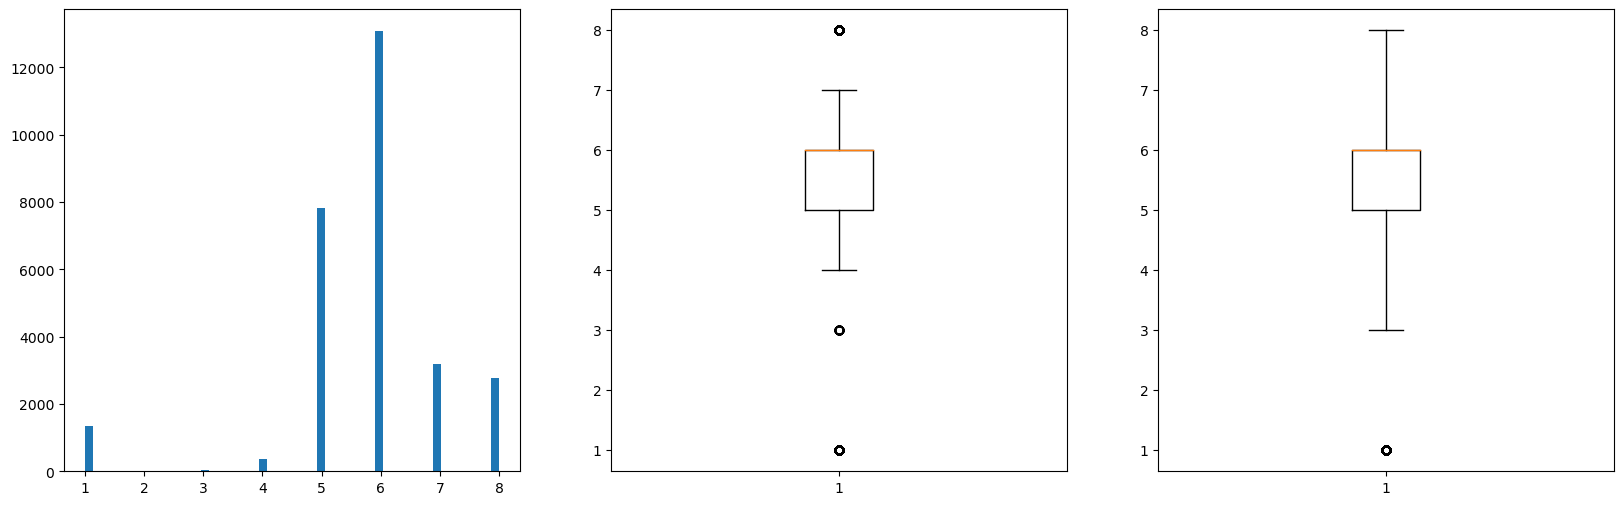

In [120]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(df.gears, bins=50)

plt.subplot(132)
plt.boxplot(df.gears, whis=1.5)

plt.subplot(133)
plt.boxplot(df.gears, whis=2.5)

plt.show()

**empty_weight**

In [121]:
first_looking("empty_weight")

COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1218
--------------------------------
empty_weight
1320.0    724
1280.0    518
1055.0    473
1395.0    461
1165.0    392
         ... 
944.0       1
1019.0      1
2156.0      1
2232.0      1
1391.0      1
Name: count, Length: 1218, dtype: int64


In [122]:
df["empty_weight"].describe()

count    28614.000000
mean      1419.351366
std        324.967341
min         75.000000
25%       1214.000000
50%       1371.000000
75%       1595.000000
max      15590.000000
Name: empty_weight, dtype: float64

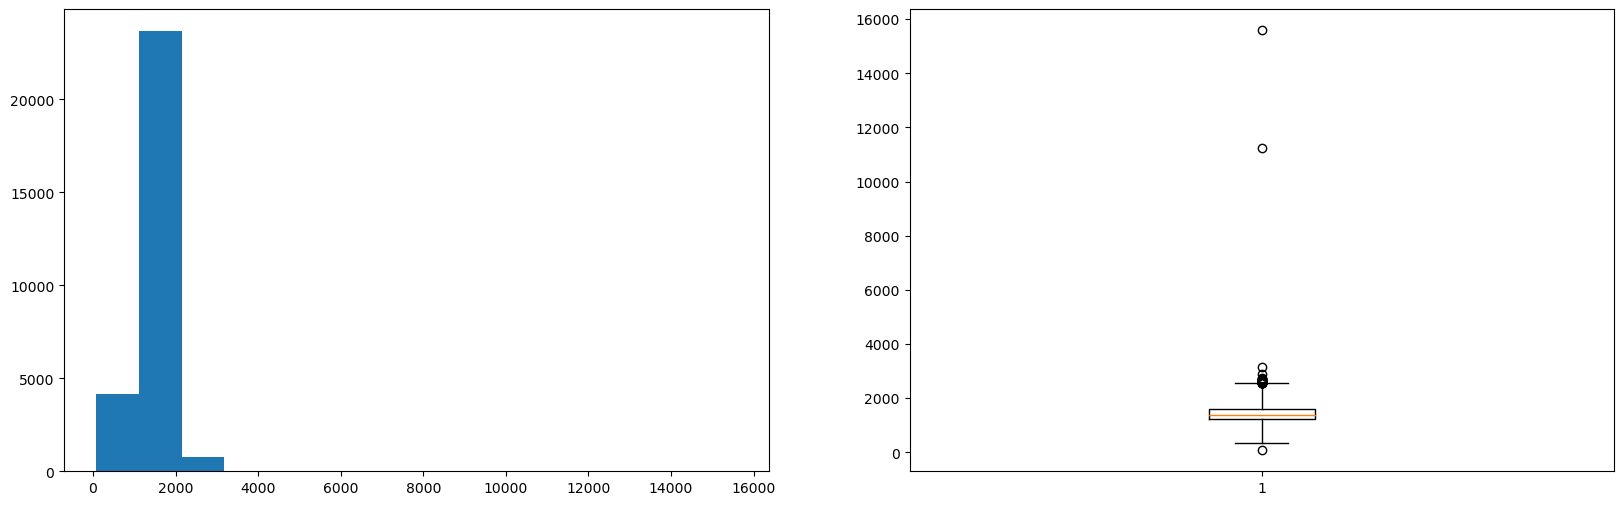

In [123]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["empty_weight"], bins=15)

plt.subplot(122)
plt.boxplot(df["empty_weight"], whis=2.5)

plt.show()

**Let's examine the extreme values**

In [124]:
df["empty_weight"].sort_values(ascending=False).head(20)

6869     15590.0
21142    11246.0
1295      3150.0
20037     2900.0
5414      2750.0
17891     2725.0
2371      2712.0
1199      2690.0
2199      2680.0
1628      2680.0
2156      2655.0
17907     2650.0
1449      2612.0
1259      2610.0
1481      2610.0
1357      2610.0
1344      2610.0
1333      2610.0
1421      2610.0
1270      2595.0
Name: empty_weight, dtype: float64

**I want to examine those 2 vehicles which have empty_weights more than 3150 kg:**

In [126]:
df.loc[df["empty_weight"] > 3150][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model  age body_type    gearbox drivetrain  gears  engine_size  \
6869   Renault ZOE  3.0     Sedan  Automatic      Front    1.0       1749.0   
21142  Ford Fiesta  1.0   Compact     Manual      Front    6.0        999.0   

      fuel_type  empty_weight  
6869   Electric       15590.0  
21142   Benzine       11246.0

In [127]:
df.loc[df.make_model == "Renault ZOE"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model  age body_type    gearbox drivetrain  gears  engine_size  \
4810  Renault ZOE  1.0   Compact  Automatic      Front    1.0       1749.0   
4819  Renault ZOE  0.0   Compact  Automatic      Front    1.0       1749.0   
4823  Renault ZOE  4.0   Compact  Automatic      Front    1.0       1749.0   
4826  Renault ZOE  0.0   Compact  Automatic      Front    1.0       1749.0   
4840  Renault ZOE  4.0   Compact  Automatic      Front    1.0       1749.0   
...           ...  ...       ...        ...        ...    ...          ...   
7113  Renault ZOE  5.0     Sedan  Automatic      Front    1.0       1749.0   
7114  Renault ZOE  5.0     Sedan  Automatic      Front    1.0       1749.0   
7116  Renault ZOE  3.0     Sedan  Automatic      Front    1.0       1749.0   
7124  Renault ZOE  6.0     Sedan  Automatic      Front    1.0       1749.0   
7132  Renault ZOE  6.0     Sedan  Automatic      Front    1.0       1749.0   

     fuel_type  empty_weight  
4810  Electric        1577.0  
4819  Electric        1577.0  
4823  Electric        1428.0  
4826  Electric        1577.0  
4840  Electric        1428.0  
...        ...           ...  
7113  Electric        1577.0  
7114  Electric        1577.0  
7116  Electric        1577.0  
7124  Electric        1577.0  
7132  Electric        1577.0  

[89 rows x 9 columns]

In [128]:
df.loc[df.make_model == "Ford Fiesta"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model  age body_type gearbox drivetrain  gears  engine_size  \
20780  Ford Fiesta  4.0   Compact  Manual      Front    6.0       1496.0   
20781  Ford Fiesta  5.0   Compact  Manual      Front    6.0       1596.0   
20782  Ford Fiesta  4.0   Compact  Manual      Front    6.0        998.0   
20785  Ford Fiesta  4.0   Compact  Manual      Front    6.0       1496.0   
20787  Ford Fiesta  3.0   Compact  Manual      Front    6.0       1498.0   
...            ...  ...       ...     ...        ...    ...          ...   
23096  Ford Fiesta  1.0     Sedan  Manual      Front    6.0        999.0   
23097  Ford Fiesta  2.0     Sedan  Manual      Front    6.0        999.0   
23098  Ford Fiesta  1.0     Sedan  Manual      Front    6.0        999.0   
23101  Ford Fiesta  7.0     Sedan  Manual      Front    5.0       1198.0   
23102  Ford Fiesta  0.0     Sedan  Manual      Front    6.0        999.0   

      fuel_type  empty_weight  
20780   Benzine        1063.0  
20781   Benzine        1163.0  
20782   Benzine        1063.0  
20785   Benzine        1262.0  
20787   Benzine        1262.0  
...         ...           ...  
23096   Benzine        1164.0  
23097   Benzine        1164.0  
23098   Benzine        1164.0  
23101   Benzine        1055.0  
23102   Benzine        1164.0  

[399 rows x 9 columns]

**In these 2 rows, we see that most likely incorrect data was entered**

In [125]:
df["empty_weight"].sort_values(ascending=True).head(20)

13995     75.0
6166     347.0
6205     375.0
4838     473.0
4943     473.0
5430     473.0
4886     473.0
5786     474.0
4188     525.0
5140     562.0
5816     562.0
5919     562.0
5748     562.0
5936     562.0
9628     600.0
9632     600.0
12208    600.0
10626    600.0
5594     650.0
11827    670.0
Name: empty_weight, dtype: float64

**Let's examine empty_weights of vehicles less than 1000 kg**

In [129]:
df.loc[df["empty_weight"] < 1000][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]\
                                 .sort_values(by=["empty_weight"], ascending=True)

make_model   age         body_type    gearbox drivetrain  gears  \
13995     Skoda Enyaq   0.0  Off-Road/Pick-up  Automatic        4WD    1.0   
6166    Renault Twizy  10.0  Off-Road/Pick-up  Automatic       Rear    1.0   
6205    Renault Twizy   6.0  Off-Road/Pick-up  Automatic       Rear    1.0   
5430    Renault Twizy   5.0       Convertible  Automatic      Front    1.0   
4838    Renault Twizy  10.0           Compact  Automatic       Rear    1.0   
...               ...   ...               ...        ...        ...    ...   
5175   Renault Twingo   4.0           Compact  Automatic       Rear    6.0   
24857     Hyundai i10   0.0             Sedan     Manual      Front    5.0   
20965     Ford Fiesta  15.0           Compact     Manual      Front    5.0   
7131   Renault Twingo   4.0             Sedan     Manual      Front    5.0   
13522      SEAT Ibiza  12.0             Sedan     Manual      Front    5.0   

       engine_size fuel_type  empty_weight  
13995       1598.0  Electric          75.0  
6166        1598.0  Electric         347.0  
6205        1598.0  Electric         375.0  
5430        1598.0  Electric         473.0  
4838        1598.0  Electric         473.0  
...            ...       ...           ...  
5175         999.0   Benzine         996.0  
24857        998.0   Benzine         996.0  
20965       1596.0   Benzine         998.0  
7131         999.0   Benzine         998.0  
13522       1198.0   Benzine         999.0  

[1605 rows x 9 columns]

**Lets examine some of the vehicles from here**

In [130]:
df.loc[df.make_model == "Skoda Enyaq"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model  age         body_type    gearbox drivetrain  gears  \
13978  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
13995  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic        4WD    1.0   
14055  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14057  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14066  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14118  Skoda Enyaq  1.0  Off-Road/Pick-up     Manual       Rear    1.0   
14188  Skoda Enyaq  1.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14196  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14212  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14235  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14248  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14277  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14284  Skoda Enyaq  1.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14300  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14316  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14317  Skoda Enyaq  0.0  Off-Road/Pick-up  Automatic       Rear    1.0   
14952  Skoda Enyaq  1.0             Sedan  Automatic       Rear    1.0   

       engine_size fuel_type  empty_weight  
13978       1598.0  Electric        1992.0  
13995       1598.0  Electric          75.0  
14055       1598.0  Electric        2107.0  
14057       1598.0  Electric        1992.0  
14066       1598.0  Electric        2107.0  
14118       1598.0  Electric        1992.0  
14188       1598.0  Electric        1992.0  
14196       1598.0  Electric        1992.0  
14212       1598.0  Electric        1992.0  
14235       1598.0  Electric        1992.0  
14248       1598.0  Electric        1992.0  
14277       1598.0  Electric        1965.0  
14284       1598.0  Electric        2090.0  
14300       1598.0  Electric        1965.0  
14316       1598.0  Electric        1940.0  
14317       1598.0  Electric        2107.0  
14952       1598.0  Electric        1992.0

In [131]:
df.loc[df.make_model == "Renault Twizy"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age         body_type    gearbox drivetrain  gears  \
4838  Renault Twizy  10.0           Compact  Automatic       Rear    1.0   
4886  Renault Twizy   1.0           Compact  Automatic       Rear    1.0   
4943  Renault Twizy   6.0           Compact  Automatic       Rear    1.0   
5140  Renault Twizy   0.0           Compact  Automatic       Rear    1.0   
5430  Renault Twizy   5.0       Convertible  Automatic      Front    1.0   
5748  Renault Twizy  10.0             Coupe  Automatic      Front    1.0   
5786  Renault Twizy   3.0             Coupe  Automatic      Front    1.0   
5816  Renault Twizy   7.0             Coupe  Automatic      Front    1.0   
5919  Renault Twizy   8.0             Coupe  Automatic       Rear    1.0   
5936  Renault Twizy   2.0             Coupe  Automatic      Front    1.0   
6166  Renault Twizy  10.0  Off-Road/Pick-up  Automatic       Rear    1.0   
6205  Renault Twizy   6.0  Off-Road/Pick-up  Automatic       Rear    1.0   

      engine_size fuel_type  empty_weight  
4838       1598.0  Electric         473.0  
4886       1598.0  Electric         473.0  
4943       1598.0  Electric         473.0  
5140       1598.0  Electric         562.0  
5430       1598.0  Electric         473.0  
5748       1598.0  Electric         562.0  
5786       1598.0  Electric         474.0  
5816       1598.0  Electric         562.0  
5919       1598.0  Electric         562.0  
5936       1598.0  Electric         562.0  
6166       1598.0  Electric         347.0  
6205       1598.0  Electric         375.0

In [135]:
df.loc[df.make_model == "Opel Astra"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age body_type    gearbox drivetrain  gears  engine_size  \
2399  Opel Astra  14.0   Compact     Manual      Front    6.0       1998.0   
2404  Opel Astra  12.0   Compact     Manual      Front    6.0       1686.0   
2406  Opel Astra   6.0   Compact     Manual      Front    6.0       1598.0   
2407  Opel Astra   0.0   Compact  Automatic      Front    8.0       1598.0   
2413  Opel Astra   4.0   Compact     Manual      Front    6.0       1598.0   
...          ...   ...       ...        ...        ...    ...          ...   
4758  Opel Astra   0.0     Sedan  Automatic      Front    8.0       1598.0   
4760  Opel Astra   0.0     Sedan  Automatic      Front    8.0       1598.0   
4765  Opel Astra   5.0     Sedan     Manual      Front    6.0       1199.0   
4767  Opel Astra   0.0     Sedan  Automatic      Front    8.0       1499.0   
4778  Opel Astra   3.0     Sedan  Automatic      Front    6.0       1399.0   

     fuel_type  empty_weight  
2399   Benzine        1360.0  
2404    Diesel        1373.0  
2406    Diesel        1350.0  
2407   Benzine        1350.0  
2413    Diesel        1350.0  
...        ...           ...  
4758   Benzine        1678.0  
4760   Benzine        1678.0  
4765    Diesel        1280.0  
4767    Diesel        1280.0  
4778   Benzine        1308.0  

[675 rows x 9 columns]

In [132]:
df.loc[df.make_model == "Fiat Panda"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age body_type gearbox drivetrain  gears  engine_size  \
9517   Fiat Panda   6.0   Compact  Manual        4WD    5.0       1248.0   
9529   Fiat Panda   6.0   Compact  Manual        4WD    5.0       1248.0   
9535   Fiat Panda   6.0   Compact  Manual        4WD    5.0       1248.0   
9551   Fiat Panda   6.0   Compact  Manual        4WD    5.0       1248.0   
9555   Fiat Panda  16.0   Compact  Manual      Front    5.0       1251.0   
...           ...   ...       ...     ...        ...    ...          ...   
11804  Fiat Panda  11.0     Sedan  Manual      Front    5.0       1242.0   
11811  Fiat Panda  10.0     Sedan  Manual      Front    5.0       1242.0   
11817  Fiat Panda   5.0     Sedan  Manual      Front    5.0        875.0   
11821  Fiat Panda   1.0     Sedan  Manual        4WD    6.0       1248.0   
11826  Fiat Panda   5.0     Sedan  Manual        4WD    5.0       1248.0   

                fuel_type  empty_weight  
9517               Diesel        1115.0  
9529               Diesel        1115.0  
9535               Diesel        1115.0  
9551               Diesel        1115.0  
9555               Diesel         935.0  
...                   ...           ...  
11804             Benzine         935.0  
11811             Benzine         935.0  
11817  Liquid/Natural Gas        1055.0  
11821             Benzine        1055.0  
11826              Diesel        1075.0  

[120 rows x 9 columns]

In [136]:
df.loc[df.make_model == "Hyundai i10"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age body_type    gearbox drivetrain  gears  engine_size  \
23110  Hyundai i10  10.0   Compact     Manual      Front    5.0       1086.0   
23115  Hyundai i10  11.0   Compact  Automatic      Front    4.0       1248.0   
23118  Hyundai i10   3.0   Compact     Manual      Front    5.0       1248.0   
23130  Hyundai i10   1.0   Compact     Manual      Front    5.0        998.0   
23134  Hyundai i10   3.0   Compact  Automatic      Front    4.0       1248.0   
...            ...   ...       ...        ...        ...    ...          ...   
24931  Hyundai i10   2.0     Sedan     Manual      Front    5.0        998.0   
24943  Hyundai i10   2.0     Sedan     Manual      Front    5.0       1197.0   
24945  Hyundai i10   0.0     Sedan     Manual      Front    5.0       1197.0   
24948  Hyundai i10   7.0     Sedan     Manual      Front    5.0        998.0   
24950  Hyundai i10   8.0     Sedan     Manual      Front    5.0        998.0   

      fuel_type  empty_weight  
23110   Benzine         908.0  
23115   Benzine         985.0  
23118   Benzine        1104.0  
23130   Benzine        1099.0  
23134   Benzine        1124.0  
...         ...           ...  
24931   Benzine        1008.0  
24943   Benzine        1082.0  
24945   Benzine        1083.0  
24948   Benzine         933.0  
24950   Benzine        1003.0  

[96 rows x 9 columns]

In [137]:
df.loc[df.make_model == "Toyota MR 2"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age    body_type         gearbox drivetrain  gears  \
17051  Toyota MR 2  19.0  Convertible          Manual       Rear    6.0   
17052  Toyota MR 2  20.0  Convertible  Semi-automatic       Rear    5.0   
17053  Toyota MR 2  21.0  Convertible          Manual       Rear    5.0   
17054  Toyota MR 2  22.0  Convertible          Manual       Rear    5.0   
17055  Toyota MR 2  20.0  Convertible          Manual       Rear    5.0   
...            ...   ...          ...             ...        ...    ...   
17535  Toyota MR 2  29.0        Coupe          Manual       Rear    5.0   
17542  Toyota MR 2  32.0        Coupe          Manual       Rear    5.0   
17545  Toyota MR 2  21.0        Coupe          Manual       Rear    5.0   
17550  Toyota MR 2  29.0        Coupe          Manual      Front    5.0   
17552  Toyota MR 2  34.0        Coupe          Manual       Rear    5.0   

       engine_size fuel_type  empty_weight  
17051       1794.0   Benzine         990.0  
17052       1794.0   Benzine        1050.0  
17053       1794.0   Benzine         950.0  
17054       1794.0   Benzine        1050.0  
17055       1794.0   Benzine         960.0  
...            ...       ...           ...  
17535       1998.0   Benzine        1290.0  
17542       1576.0   Benzine         975.0  
17545       1794.0   Benzine         995.0  
17550       1998.0   Benzine        1345.0  
17552       1576.0   Benzine        1040.0  

[141 rows x 9 columns]

In [138]:
df.loc[df.make_model == "Renault Twingo"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age body_type    gearbox drivetrain  gears  \
4802  Renault Twingo   6.0   Compact     Manual       Rear    5.0   
4852  Renault Twingo   1.0   Compact  Automatic       Rear    1.0   
4858  Renault Twingo   1.0   Compact  Automatic       Rear    1.0   
4866  Renault Twingo   7.0   Compact     Manual       Rear    5.0   
4869  Renault Twingo   5.0   Compact     Manual       Rear    5.0   
...              ...   ...       ...        ...        ...    ...   
6919  Renault Twingo   5.0     Sedan  Automatic       Rear    5.0   
6999  Renault Twingo   8.0     Sedan     Manual       Rear    5.0   
7063  Renault Twingo   4.0     Sedan     Manual       Rear    5.0   
7083  Renault Twingo  10.0     Sedan     Manual       Rear    5.0   
7131  Renault Twingo   4.0     Sedan     Manual      Front    5.0   

      engine_size fuel_type  empty_weight  
4802        999.0   Benzine         840.0  
4852        999.0   Benzine        1147.0  
4858        999.0   Benzine        1168.0  
4866        999.0   Benzine         939.0  
4869        999.0   Benzine         939.0  
...           ...       ...           ...  
6919        999.0   Benzine         940.0  
6999        898.0   Benzine         939.0  
7063        898.0   Benzine        1103.0  
7083       1149.0   Benzine         939.0  
7131        999.0   Benzine         998.0  

[92 rows x 9 columns]

In [139]:
df.loc[df.make_model == "Peugeot 108"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model  age body_type    gearbox drivetrain  gears  engine_size  \
7179  Peugeot 108  1.0   Compact     Manual      Front    5.0        998.0   
7184  Peugeot 108  5.0   Compact     Manual      Front    5.0        998.0   
7196  Peugeot 108  5.0   Compact     Manual      Front    5.0       1199.0   
7197  Peugeot 108  2.0   Compact     Manual      Front    5.0        998.0   
7204  Peugeot 108  4.0   Compact     Manual      Front    5.0        998.0   
...           ...  ...       ...        ...        ...    ...          ...   
9245  Peugeot 108  2.0     Sedan     Manual      Front    5.0        998.0   
9247  Peugeot 108  2.0     Sedan     Manual      Front    5.0        998.0   
9461  Peugeot 108  6.0     Sedan  Automatic      Front    5.0        998.0   
9472  Peugeot 108  3.0     Sedan     Manual      Front    5.0        998.0   
9490  Peugeot 108  3.0     Sedan     Manual      Front    5.0        998.0   

     fuel_type  empty_weight  
7179   Benzine         815.0  
7184   Benzine         815.0  
7196   Benzine         985.0  
7197   Benzine         915.0  
7204   Benzine         815.0  
...        ...           ...  
9245   Benzine         915.0  
9247   Benzine         915.0  
9461   Benzine         930.0  
9472   Benzine         950.0  
9490   Benzine         915.0  

[67 rows x 9 columns]

In [140]:
df.loc[df.make_model == "SEAT Ibiza"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age body_type gearbox drivetrain  gears  engine_size  \
11833  SEAT Ibiza   8.0   Compact  Manual      Front    5.0       1598.0   
11834  SEAT Ibiza   4.0   Compact  Manual      Front    5.0       1598.0   
11837  SEAT Ibiza   8.0   Compact  Manual      Front    5.0       1197.0   
11839  SEAT Ibiza   4.0   Compact  Manual      Front    5.0       1598.0   
11843  SEAT Ibiza  15.0   Compact  Manual      Front    5.0       1896.0   
...           ...   ...       ...     ...        ...    ...          ...   
13569  SEAT Ibiza   8.0     Sedan  Manual      Front    5.0       1197.0   
13570  SEAT Ibiza   2.0     Sedan  Manual      Front    5.0        999.0   
13571  SEAT Ibiza   3.0     Sedan  Manual      Front    5.0        999.0   
13572  SEAT Ibiza   7.0     Sedan  Manual      Front    5.0       1422.0   
13573  SEAT Ibiza   0.0     Sedan  Manual      Front    5.0        999.0   

                fuel_type  empty_weight  
11833              Diesel        1170.0  
11834              Diesel        1243.0  
11837             Benzine        1090.0  
11839              Diesel        1239.0  
11843              Diesel        1144.0  
...                   ...           ...  
13569             Benzine        1099.0  
13570  Liquid/Natural Gas        1258.0  
13571             Benzine        1099.0  
13572              Diesel        1150.0  
13573             Benzine        1099.0  

[441 rows x 9 columns]

**When we look at this data, we see that most cars with empty_weight less than 1000 do not seem to have any problems. Because the other cars of that make_model weigh almost the same.**

**But I found two incorrect data entries in 'opel astra' and 'skoda enyaq' and I will fix them:**

In [141]:
df["empty_weight"].replace([75, 525], np.nan, inplace=True)

**Also, as we looked at the beginning; I think there is an error in the ones with empty_weight greater than 4000, I will fix them too.**

In [142]:
df.loc[(df["empty_weight"] > 4000), 'empty_weight'] = np.nan

In [143]:
df["empty_weight"].isnull().sum()

4

In [144]:
fill(df, "make_model", "body_type", "empty_weight", "mode")

COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1214
--------------------------------
empty_weight
1320.0    724
1280.0    518
1055.0    473
1395.0    461
1165.0    392
         ... 
1699.0      1
1817.0      1
1839.0      1
1452.0      1
1391.0      1
Name: count, Length: 1214, dtype: int64


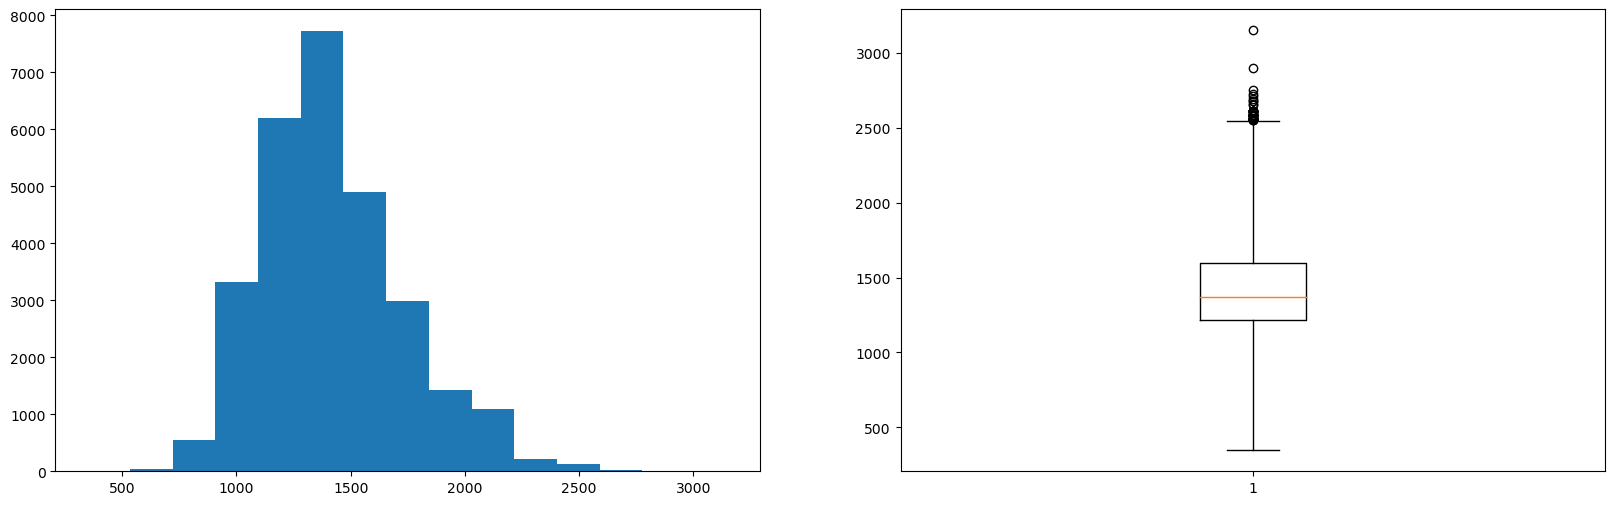

In [145]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["empty_weight"], bins=15)

plt.subplot(122)
plt.boxplot(df["empty_weight"], whis=2.5)

plt.show()

**co_emissions**

In [146]:
first_looking("co_emissions")

COLUMN NAME    :  co_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  389
--------------------------------
co_emissions
0.00      1410
124.00    1074
115.00     681
99.00      587
119.00     574
          ... 
95.50        1
146.75       1
338.00       1
123.50       1
53.00        1
Name: count, Length: 389, dtype: int64


In [147]:
df["co_emissions"].describe()

count    28614.000000
mean       132.008221
std         56.990571
min          0.000000
25%        107.000000
50%        124.000000
75%        155.000000
max        940.000000
Name: co_emissions, dtype: float64

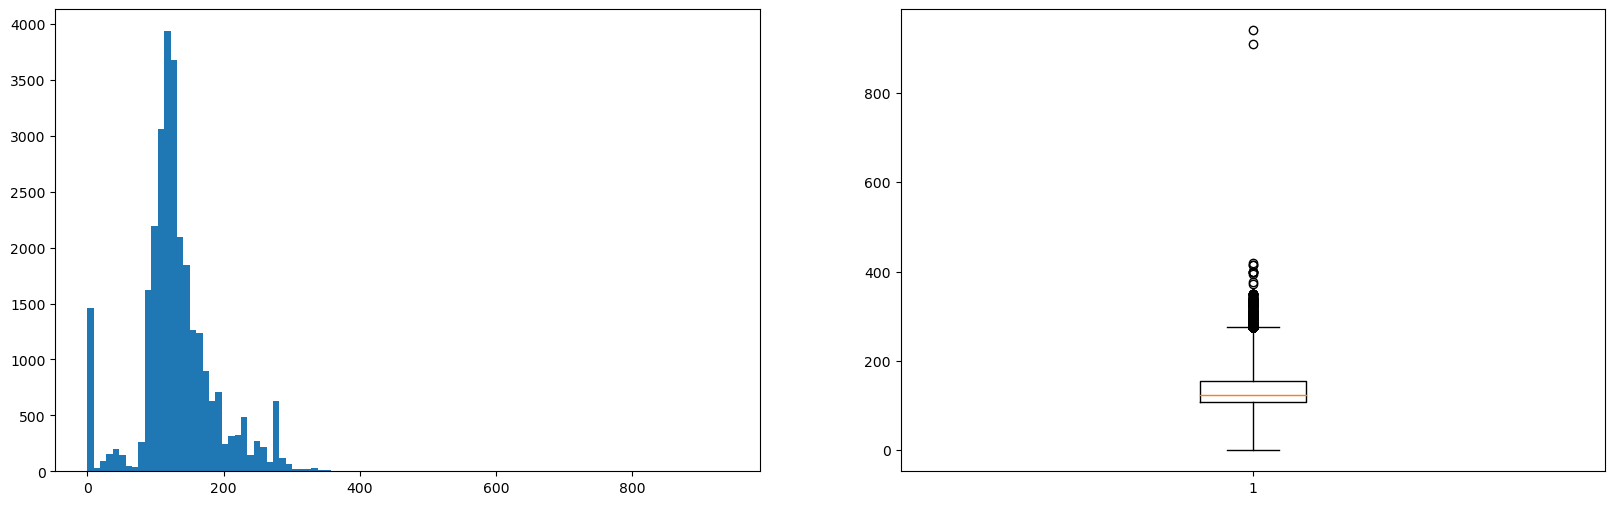

In [148]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["co_emissions"], bins=100)

plt.subplot(122)
plt.boxplot(df["co_emissions"], whis=2.5)

plt.show()

In [149]:
df["co_emissions"].sort_values(ascending=False).head(20)

22010    940.0
20797    910.0
21923    420.0
27896    414.0
27509    414.0
613      400.0
610      400.0
21541    399.0
19523    398.0
21569    394.0
1299     377.0
1502     373.0
21644    350.0
21778    350.0
21606    350.0
21921    350.0
21793    350.0
21553    350.0
21645    350.0
1542     348.0
Name: co_emissions, dtype: float64

In [150]:
df["co_emissions"].sort_values(ascending=True).head(20)

11517    0.0
14188    0.0
14196    0.0
2246     0.0
14212    0.0
14235    0.0
14248    0.0
14264    0.0
14268    0.0
2235     0.0
14277    0.0
14284    0.0
2230     0.0
2255     0.0
14300    0.0
14317    0.0
14404    0.0
14406    0.0
14427    0.0
14454    0.0
Name: co_emissions, dtype: float64

In [151]:
df.groupby(["make_model", "body_type", "fuel_type", "co_emissions"]).price.describe()

count          mean  \
make_model   body_type        fuel_type co_emissions                        
Dacia        Compact          Benzine   130.0           3.0  21431.000000   
             Sedan            Benzine   130.0           1.0   9999.000000   
             Station wagon    Benzine   130.0           1.0  21799.000000   
Dacia Break  Station wagon    Benzine   124.0           1.0  20500.000000   
Dacia Dokker Compact          Diesel    108.0           1.0  11930.000000   
...                                                     ...           ...   
Volvo XC90   Off-Road/Pick-up Diesel    224.0           2.0  11850.000000   
                              Electric  0.0             4.0  64400.000000   
             Sedan            Diesel    47.0            3.0  60366.666667   
             Station wagon    Diesel    149.0           2.0  29500.000000   
                                        152.0           2.0  36000.000000   

                                                               std      min  \
make_model   body_type        fuel_type co_emissions                          
Dacia        Compact          Benzine   130.0          1661.743663  19515.0   
             Sedan            Benzine   130.0                  NaN   9999.0   
             Station wagon    Benzine   130.0                  NaN  21799.0   
Dacia Break  Station wagon    Benzine   124.0                  NaN  20500.0   
Dacia Dokker Compact          Diesel    108.0                  NaN  11930.0   
...                                                            ...      ...   
Volvo XC90   Off-Road/Pick-up Diesel    224.0             0.000000  11850.0   
                              Electric  0.0            9814.954576  55900.0   
             Sedan            Diesel    47.0          21250.254900  47700.0   
             Station wagon    Diesel    149.0             0.000000  29500.0   
                                        152.0             0.000000  36000.0   

                                                          25%      50%  \
make_model   body_type        fuel_type co_emissions                     
Dacia        Compact          Benzine   130.0         20907.0  22299.0   
             Sedan            Benzine   130.0          9999.0   9999.0   
             Station wagon    Benzine   130.0         21799.0  21799.0   
Dacia Break  Station wagon    Benzine   124.0         20500.0  20500.0   
Dacia Dokker Compact          Diesel    108.0         11930.0  11930.0   
...                                                       ...      ...   
Volvo XC90   Off-Road/Pick-up Diesel    224.0         11850.0  11850.0   
                              Electric  0.0           55900.0  64400.0   
             Sedan            Diesel    47.0          48100.0  48500.0   
             Station wagon    Diesel    149.0         29500.0  29500.0   
                                        152.0         36000.0  36000.0   

                                                          75%      max  
make_model   body_type        fuel_type co_emissions                    
Dacia        Compact          Benzine   130.0         22389.0  22479.0  
             Sedan            Benzine   130.0          9999.0   9999.0  
             Station wagon    Benzine   130.0         21799.0  21799.0  
Dacia Break  Station wagon    Benzine   124.0         20500.0  20500.0  
Dacia Dokker Compact          Diesel    108.0         11930.0  11930.0  
...                                                       ...      ...  
Volvo XC90   Off-Road/Pick-up Diesel    224.0         11850.0  11850.0  
                              Electric  0.0           72900.0  72900.0  
             Sedan            Diesel    47.0          66700.0  84900.0  
             Station wagon    Diesel    149.0         29500.0  29500.0  
                                        152.0         36000.0  36000.0  

[7640 rows x 8 columns]

**Anything less than 100g/km can be considered low – or good – CO2 emissions. So lets look at the vehicles who have more than 300g/km to examine the outliers :**

In [152]:
df.loc[df["co_emissions"] > 300][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]\
                                 .sort_values(by=["co_emissions"], ascending=False)

make_model   age         body_type    gearbox drivetrain  \
22010             Ford Edge   2.0  Off-Road/Pick-up  Automatic        4WD   
20797           Ford Fiesta   1.0           Compact     Manual      Front   
21923          Ford Mustang   1.0             Coupe  Automatic       Rear   
27896             Volvo V60   5.0     Station wagon     Manual      Front   
27509             Volvo V60   5.0     Station wagon     Manual      Front   
...                     ...   ...               ...        ...        ...   
704    Mercedes-Benz SL 500  20.0       Convertible  Automatic       Rear   
21171          Ford Mustang   5.0       Convertible     Manual       Rear   
21519          Ford Mustang   6.0       Convertible     Manual       Rear   
21173          Ford Mustang   5.0       Convertible  Automatic       Rear   
21178          Ford Mustang   5.0       Convertible  Automatic       Rear   

       gears  engine_size fuel_type  empty_weight  co_emissions  
22010    8.0       1995.0    Diesel        2116.0         940.0  
20797    6.0       1496.0   Benzine        1242.0         910.0  
21923    6.0       4949.0   Benzine        1725.0         420.0  
27896    6.0       1969.0    Diesel        1690.0         414.0  
27509    6.0       1969.0    Diesel        1690.0         414.0  
...      ...          ...       ...           ...           ...  
704      5.0       4966.0   Benzine        1770.0         304.0  
21171    6.0       4951.0   Benzine        1830.0         303.0  
21519    6.0       4951.0   Benzine        1830.0         303.0  
21173    6.0       4951.0   Benzine        1893.0         303.0  
21178    6.0       4951.0   Benzine        1893.0         303.0  

[114 rows x 10 columns]

**Let's take a closer look at the vehicle models included in this group**

In [153]:
df.loc[df.make_model == "Ford Edge"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model  age         body_type    gearbox drivetrain  gears  \
21941  Ford Edge  5.0  Off-Road/Pick-up  Automatic        4WD    8.0   
21983  Ford Edge  4.0  Off-Road/Pick-up  Automatic        4WD    8.0   
21984  Ford Edge  5.0  Off-Road/Pick-up     Manual        4WD    8.0   
21985  Ford Edge  5.0  Off-Road/Pick-up  Automatic        4WD    6.0   
22005  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22007  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22010  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22015  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22020  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22025  Ford Edge  6.0  Off-Road/Pick-up     Manual        4WD    8.0   
22046  Ford Edge  4.0  Off-Road/Pick-up  Automatic        4WD    6.0   
22055  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22060  Ford Edge  4.0  Off-Road/Pick-up  Automatic        4WD    6.0   
22076  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22082  Ford Edge  4.0  Off-Road/Pick-up  Automatic        4WD    6.0   
22086  Ford Edge  6.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22093  Ford Edge  5.0  Off-Road/Pick-up  Automatic        4WD    6.0   
22125  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22131  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22139  Ford Edge  6.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22191  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22192  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22193  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22194  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22206  Ford Edge  4.0  Off-Road/Pick-up  Automatic        4WD    6.0   
22216  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22231  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22251  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22284  Ford Edge  3.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22290  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22293  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22299  Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
22718  Ford Edge  6.0             Sedan  Automatic        4WD    6.0   

       engine_size fuel_type  empty_weight  co_emissions  
21941       1997.0    Diesel        2116.0         152.0  
21983       1997.0    Diesel        1949.0         152.0  
21984       1997.0    Diesel        1912.0         152.0  
21985       1997.0    Diesel        1949.0         156.0  
22005       1997.0    Diesel        2116.0         169.0  
22007       1995.0   Benzine        2116.0         153.0  
22010       1995.0    Diesel        2116.0         940.0  
22015       1995.0    Diesel        2116.0         175.0  
22020       1997.0    Diesel        2116.0         175.0  
22025       1997.0    Diesel        2116.0           0.0  
22046       1997.0    Diesel        1949.0         156.0  
22055       1997.0    Diesel        2232.0         170.0  
22060       1997.0    Diesel        1949.0         156.0  
22076       1995.0    Diesel        2116.0           0.0  
22082       1997.0    Diesel        1842.0         152.0  
22086       1997.0    Diesel        2116.0         154.0  
22093       1997.0    Diesel        2116.0         156.0  
22125       1995.0    Diesel        2116.0         169.0  
22131       1997.0    Diesel        2116.0         169.0  
22139       1997.0    Diesel        2116.0         169.0  
22191       1997.0    Diesel        2116.0         175.0  
22192       1995.0    Diesel        2116.0         171.0  
22193       1995.0    Diesel        2116.0         169.0  
22194       1995.0    Diesel        2116.0         184.0  
22206       1997.0    Diesel        1949.0         152.0  
22216       1997.0    D

In [154]:
df.loc[df.make_model == "Ford Fiesta"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model  age body_type gearbox drivetrain  gears  engine_size  \
20780  Ford Fiesta  4.0   Compact  Manual      Front    6.0       1496.0   
20781  Ford Fiesta  5.0   Compact  Manual      Front    6.0       1596.0   
20782  Ford Fiesta  4.0   Compact  Manual      Front    6.0        998.0   
20785  Ford Fiesta  4.0   Compact  Manual      Front    6.0       1496.0   
20787  Ford Fiesta  3.0   Compact  Manual      Front    6.0       1498.0   
...            ...  ...       ...     ...        ...    ...          ...   
23096  Ford Fiesta  1.0     Sedan  Manual      Front    6.0        999.0   
23097  Ford Fiesta  2.0     Sedan  Manual      Front    6.0        999.0   
23098  Ford Fiesta  1.0     Sedan  Manual      Front    6.0        999.0   
23101  Ford Fiesta  7.0     Sedan  Manual      Front    5.0       1198.0   
23102  Ford Fiesta  0.0     Sedan  Manual      Front    6.0        999.0   

      fuel_type  empty_weight  co_emissions  
20780   Benzine        1063.0         158.0  
20781   Benzine        1163.0         140.0  
20782   Benzine        1063.0          97.0  
20785   Benzine        1262.0         136.0  
20787   Benzine        1262.0         136.0  
...         ...           ...           ...  
23096   Benzine        1164.0           0.0  
23097   Benzine        1164.0           0.0  
23098   Benzine        1164.0         139.0  
23101   Benzine        1055.0         122.0  
23102   Benzine        1164.0         110.0  

[399 rows x 10 columns]

In [155]:
df.loc[df.make_model == "Nissan GT-R"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model   age body_type         gearbox drivetrain  gears  \
19265  Nissan GT-R  13.0     Coupe       Automatic        4WD    6.0   
19268  Nissan GT-R   1.0     Coupe       Automatic        4WD    6.0   
19270  Nissan GT-R  12.0     Coupe       Automatic        4WD    6.0   
19271  Nissan GT-R   5.0     Coupe       Automatic        4WD    6.0   
19272  Nissan GT-R   9.0     Coupe       Automatic        4WD    6.0   
...            ...   ...       ...             ...        ...    ...   
19639  Nissan GT-R  11.0     Coupe  Semi-automatic        4WD    6.0   
19641  Nissan GT-R  10.0     Coupe       Automatic        4WD    6.0   
19642  Nissan GT-R   3.0     Coupe       Automatic        4WD    6.0   
19647  Nissan GT-R   4.0     Coupe       Automatic        4WD    6.0   
19650  Nissan GT-R   5.0     Coupe       Automatic        4WD    6.0   

       engine_size fuel_type  empty_weight  co_emissions  
19265       3799.0   Benzine        1740.0         277.0  
19268       3799.0   Benzine        1752.0         277.0  
19270       3799.0   Benzine        1740.0         277.0  
19271       3799.0   Benzine        1752.0         277.0  
19272       3799.0   Benzine        1815.0         277.0  
...            ...       ...           ...           ...  
19639       3799.0   Benzine        1815.0         298.0  
19641       3799.0   Benzine        1815.0         275.0  
19642       3799.0   Benzine        1820.0         275.0  
19647       3799.0   Benzine        1820.0         275.0  
19650       3799.0   Benzine        1745.0         311.0  

[82 rows x 10 columns]

In [156]:
df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model   age         body_type    gearbox drivetrain  gears  \
20930  Ford Mustang  17.0           Compact  Automatic       Rear    6.0   
21156  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
21157  Ford Mustang   7.0       Convertible  Automatic       Rear    6.0   
21158  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
21159  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
...             ...   ...               ...        ...        ...    ...   
21929  Ford Mustang   9.0             Coupe  Automatic       Rear    6.0   
21930  Ford Mustang   4.0             Coupe  Automatic       Rear    6.0   
21953  Ford Mustang   0.0  Off-Road/Pick-up  Automatic        4WD    6.0   
21955  Ford Mustang   1.0  Off-Road/Pick-up  Automatic        4WD    1.0   
22123  Ford Mustang   1.0  Off-Road/Pick-up  Automatic        4WD    6.0   

       engine_size fuel_type  empty_weight  co_emissions  
20930       4598.0   Benzine        1659.0         276.0  
21156       5038.0   Benzine        1893.0         273.0  
21157       5038.0   Benzine        1722.0         194.0  
21158       5038.0   Benzine        1659.0         273.0  
21159       5038.0   Benzine        1893.0         279.0  
...            ...       ...           ...           ...  
21929       3700.0   Benzine        1659.0         276.0  
21930       2261.0   Benzine        1737.0         204.0  
21953       5038.0   Benzine        2218.0           0.0  
21955       5038.0  Electric        2218.0           0.0  
22123       5038.0   Benzine        2259.0           0.0  

[663 rows x 10 columns]

In [157]:
df.loc[df.make_model == "Volvo V60"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model   age      body_type    gearbox drivetrain  gears  \
27488  Volvo V60   7.0  Station wagon  Automatic        4WD    8.0   
27489  Volvo V60   2.0  Station wagon  Automatic        4WD    8.0   
27494  Volvo V60   2.0  Station wagon  Automatic        4WD    8.0   
27495  Volvo V60  10.0  Station wagon     Manual      Front    6.0   
27496  Volvo V60   3.0  Station wagon  Automatic      Front    8.0   
...          ...   ...            ...        ...        ...    ...   
28239  Volvo V60   9.0  Station wagon     Manual      Front    6.0   
28240  Volvo V60   4.0  Station wagon  Automatic        4WD    8.0   
28243  Volvo V60   3.0  Station wagon  Automatic        4WD    8.0   
28251  Volvo V60   4.0  Station wagon     Manual      Front    6.0   
28252  Volvo V60   4.0  Station wagon  Automatic      Front    8.0   

       engine_size fuel_type  empty_weight  co_emissions  
27488       1984.0    Diesel        2075.0         119.0  
27489       1969.0    Diesel        2075.0         119.0  
27494       1969.0    Diesel        2075.0          39.0  
27495       1984.0    Diesel        1724.0         132.0  
27496       1969.0    Diesel        2075.0         123.0  
...            ...       ...           ...           ...  
28239       1984.0    Diesel        1489.0         119.0  
28240       1969.0   Benzine        1615.0         157.0  
28243       1969.0   Benzine        2075.0         171.0  
28251       1969.0    Diesel        2075.0         116.0  
28252       1969.0   Benzine        1615.0         157.0  

[309 rows x 10 columns]

In [158]:
df.loc[df.make_model == "Mercedes-Benz SL 600"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model   age    body_type    gearbox drivetrain  gears  \
604  Mercedes-Benz SL 600  14.0  Convertible  Automatic       Rear    5.0   
684  Mercedes-Benz SL 600  28.0  Convertible  Automatic       Rear    4.0   
720  Mercedes-Benz SL 600  26.0  Convertible  Automatic       Rear    5.0   
721  Mercedes-Benz SL 600  12.0  Convertible  Automatic       Rear    5.0   
753  Mercedes-Benz SL 600  14.0  Convertible  Automatic       Rear    5.0   

     engine_size fuel_type  empty_weight  co_emissions  
604       5513.0   Benzine        1950.0         330.0  
684       5987.0   Benzine        1950.0         330.0  
720       5987.0   Benzine        1950.0         330.0  
721       5513.0   Benzine        2045.0         326.0  
753       5513.0   Benzine        1945.0         330.0

**Domain Knowledge About Average co2 emission values of some Vehicles:**
- Ford Edge's co2 emission value is 153 g/km
- Ford Fiesta's co2 emission value is 108 g/km
- Ford Mustang's co2 emission value is 299 g/km
- Volvo V60's co2 emission value is 146 g/km
- Mercedes-Benz G 500's co2 emission value is 252-299 g/km
- Nissan GT-R's co2 emission value is 275 g/km
- Mercedes-Benz E 63 AMG's co2 emission value is 230 g/km
- Ford GT's co2 emission value is 349.6 g/km
- Toyota Land Cruiser's co2 emission value is 262.0 g/km
- Mercedes-Benz SL 55 AMG's co2 emission value is 324 g/km
- Mercedes-Benz SL 600's co2 emission value is 326-370 g/km
- **To get more information in detail about Average Car Emission of each make and model, you can visit car-emissions.com and cars-data.com**

**So I cannot approach every emission value greater than 300g/km in the same way, for some vehicle models this may be normal, for others it may be a very abnormal value. Domain knowledge is very important here**

In [159]:
df[(~(df["make_model"] == "Ford GT") | ~(df["make_model"].str.contains("Mercedes-Benz"))) & (df["co_emissions"] > 330)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]\
                                 .sort_values(by=["co_emissions"], ascending=False)

make_model   age         body_type    gearbox drivetrain  \
22010                 Ford Edge   2.0  Off-Road/Pick-up  Automatic        4WD   
20797               Ford Fiesta   1.0           Compact     Manual      Front   
21923              Ford Mustang   1.0             Coupe  Automatic       Rear   
27896                 Volvo V60   5.0     Station wagon     Manual      Front   
27509                 Volvo V60   5.0     Station wagon     Manual      Front   
610         Mercedes-Benz G 500  23.0       Convertible  Automatic        4WD   
613         Mercedes-Benz G 500  23.0       Convertible  Automatic        4WD   
21541              Ford Mustang   1.0             Coupe  Automatic       Rear   
19523               Nissan GT-R  12.0             Coupe  Automatic        4WD   
21569              Ford Mustang   0.0             Coupe  Automatic       Rear   
1299     Mercedes-Benz G 55 AMG  12.0  Off-Road/Pick-up  Automatic        4WD   
1502     Mercedes-Benz G 63 AMG   2.0  Off-Road/Pick-up  Automatic        4WD   
21778                   Ford GT   4.0             Coupe  Automatic       Rear   
21645                   Ford GT  56.0             Coupe     Manual       Rear   
21553                   Ford GT  17.0             Coupe     Manual       Rear   
21606                   Ford GT  17.0             Coupe     Manual       Rear   
21644                   Ford GT  54.0             Coupe     Manual       Rear   
21921                   Ford GT  45.0             Coupe     Manual       Rear   
21793                   Ford GT   1.0             Coupe  Automatic       Rear   
1542        Mercedes-Benz G 500   9.0  Off-Road/Pick-up  Automatic        4WD   
1956     Mercedes-Benz E 63 AMG  14.0     Station wagon  Automatic        4WD   
1490     Mercedes-Benz G 63 AMG   3.0  Off-Road/Pick-up  Automatic        4WD   
17628       Toyota Land Cruiser   1.0  Off-Road/Pick-up     Manual        4WD   
19383               Nissan GT-R  13.0             Coupe  Automatic        4WD   
1444     Mercedes-Benz G 63 AMG   0.0  Off-Road/Pick-up  Automatic        4WD   
887        Mercedes-Benz CL 600  14.0             Coupe  Automatic       Rear   
22180                Ford F 150   0.0  Off-Road/Pick-up  Automatic        4WD   
21747              Ford Mustang   3.0             Coupe     Manual       Rear   
853    Mercedes-Benz CLK 63 AMG  14.0             Coupe  Automatic       Rear   
17911       Toyota Land Cruiser  34.0  Off-Road/Pick-up     Manual        4WD   
17935       Toyota Land Cruiser  21.0  Off-Road/Pick-up     Manual        4WD   
17916       Toyota Land Cruiser  44.0  Off-Road/Pick-up     Manual        4WD   
17903       Toyota Land Cruiser  35.0  Off-Road/Pick-up     Manual        4WD   
17887       Toyota Land Cruiser  35.0  Off-Road/Pick-up     Manual        4WD   
17885       Toyota Land Cruiser  40.0  Off-Road/Pick-up     Manual        4WD   
17872       Toyota Land Cruiser   6.0  Off-Road/Pick-up  Automatic        4WD   
17813       Toyota Land Cruiser   0.0  Off-Road/Pick-up     Manual        4WD   
17697       Toyota Land Cruiser   0.0  Off-Road/Pick-up     Manual        4WD   
2150        Mercedes-Benz S 500  22.0             Sedan  Automatic        4WD   
435     Mercedes-Benz SL 65 AMG  15.0       Convertible  Automatic      Front   
423     Mercedes-Benz SL 65 AMG  16.0       Convertible  Automatic      Front   

       gears  engine_size fuel_type  empty_weight  co_emissions  
22010    8.0       1995.0    Diesel        2116.0         940.0  
20797    6.0       1496.0   Benzine        1242.0         910.0  
21923    6.0       4949.0   Benzine        1725.0         420.0  
27896    6.0       1969.0    Diesel        1690.0         414.0  
27509    6.0       1969.0    Diesel        1690.0         414.0  
610      7.0       4996.0   Benzine        2350.0         400.0  
613      7.0       4996.0   Benzine        2350.0         400.0  
21541    6.0       5162.0   Benzine        1992.0         399.0  
19523    6.0       3799.

In [160]:
cond_emission = (~(df["make_model"] == "Ford GT") | ~(df["make_model"].str.contains("Mercedes-Benz"))) & (df["co_emissions"] > 400)
df[cond_emission][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model  age         body_type    gearbox drivetrain  gears  \
20797   Ford Fiesta  1.0           Compact     Manual      Front    6.0   
21923  Ford Mustang  1.0             Coupe  Automatic       Rear    6.0   
22010     Ford Edge  2.0  Off-Road/Pick-up  Automatic        4WD    8.0   
27509     Volvo V60  5.0     Station wagon     Manual      Front    6.0   
27896     Volvo V60  5.0     Station wagon     Manual      Front    6.0   

       engine_size fuel_type  empty_weight  co_emissions  
20797       1496.0   Benzine        1242.0         910.0  
21923       4949.0   Benzine        1725.0         420.0  
22010       1995.0    Diesel        2116.0         940.0  
27509       1969.0    Diesel        1690.0         414.0  
27896       1969.0    Diesel        1690.0         414.0

**So these values are outliers and unrealistic values that I do not want in my data set. I will replace that values with the median of the related make_model and body_type group**

In [161]:
outlier_emission = df["co_emissions"].isin([940, 910, 420, 414])

In [162]:
df.loc[outlier_emission, "co_emissions"] = np.nan

In [163]:
df["co_emissions"].isnull().sum()

5

In [164]:
fill(df, "make_model", "body_type", "co_emissions", "median")

COLUMN NAME    :  co_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  385
--------------------------------
co_emissions
0.0      1410
124.0    1074
115.0     681
99.0      587
119.0     574
         ... 
197.5       1
266.0       1
118.5       1
37.5        1
53.0        1
Name: count, Length: 385, dtype: int64


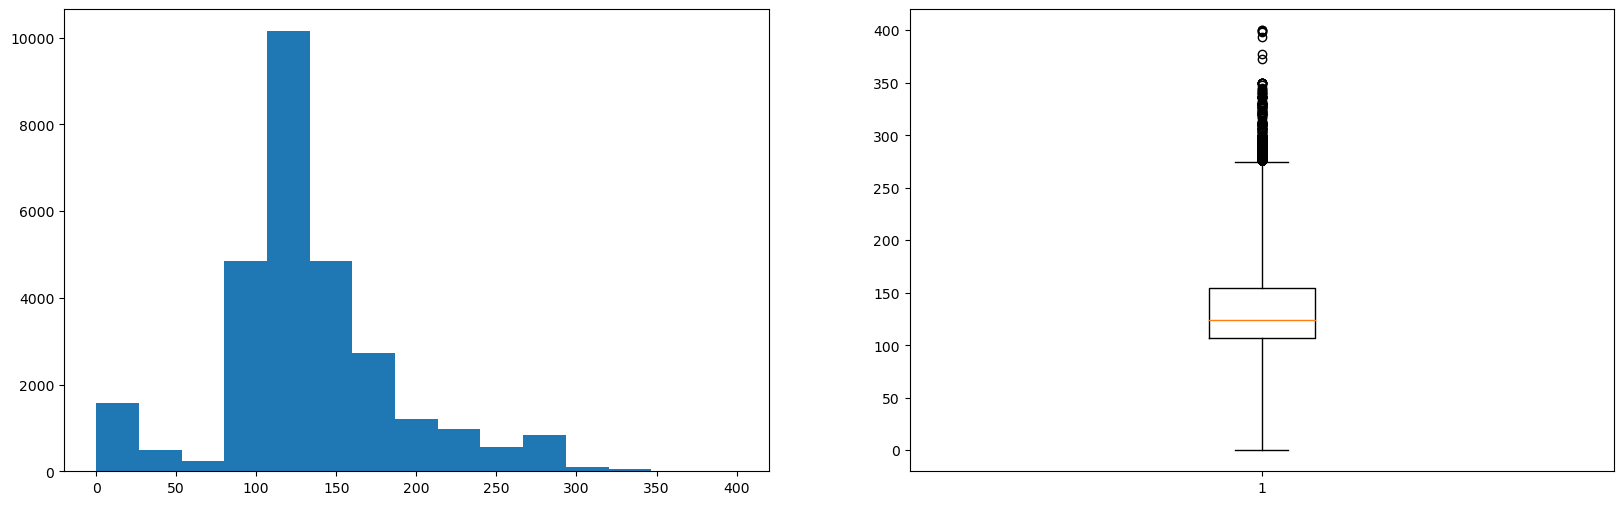

In [165]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["co_emissions"], bins=15)

plt.subplot(122)
plt.boxplot(df["co_emissions"], whis=2.5)

plt.show()

**Lets look at the plots using winsorize to limit the extrem values:**

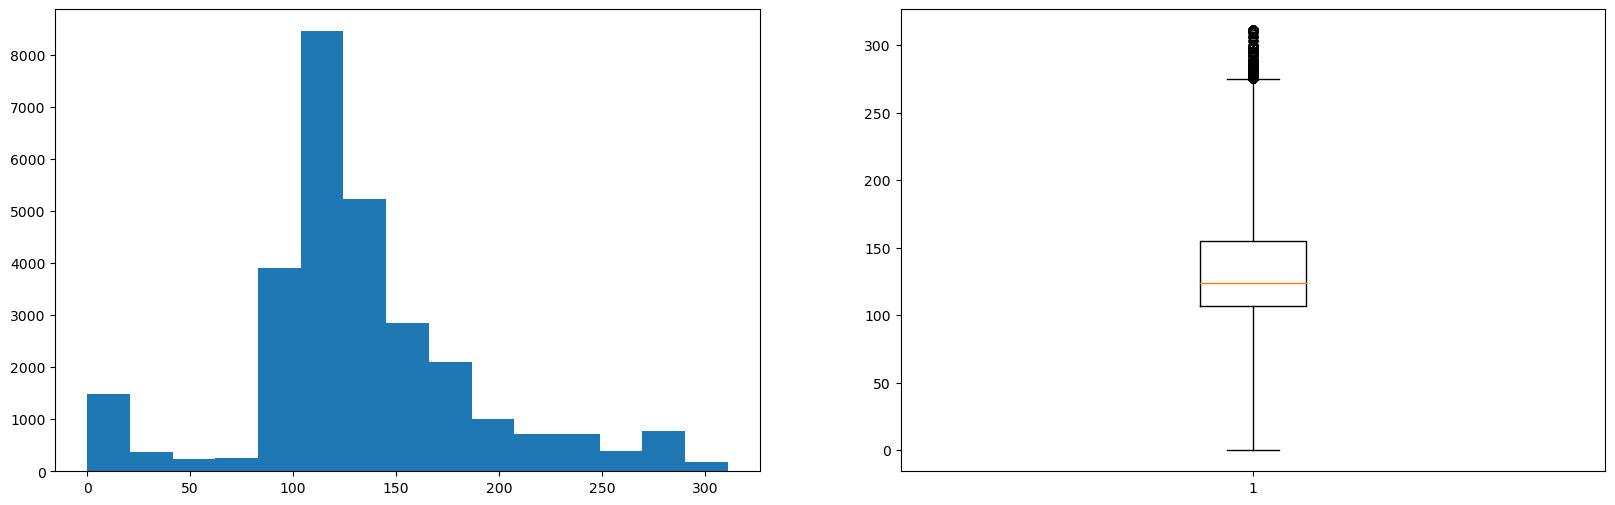

In [166]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(winsorize(df["co_emissions"], (0.001, 0.003)), bins = 15)

plt.subplot(122)
plt.boxplot(winsorize(df["co_emissions"], (0.001, 0.003)), whis=2.5)

plt.show()

**cons_avg**

In [167]:
first_looking("cons_avg")

COLUMN NAME    :  cons_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  217
--------------------------------
cons_avg
4.90     1043
5.00      966
4.50      889
5.10      886
5.30      885
         ... 
6.85        1
15.90       1
3.15        1
44.00       1
6.20        1
Name: count, Length: 217, dtype: int64


In [168]:
df.cons_avg.describe()

count    28614.000000
mean         5.702438
std          2.795446
min          0.000000
25%          4.400000
50%          5.300000
75%          6.600000
max         99.900000
Name: cons_avg, dtype: float64

**We see that half of the data is collected between 4.4 (Q1) and 6.6 (Q3). Although the mean is 5.7 and the standard deviation is 2.8, there are some very extreme values. I would like to examine these more closely:**

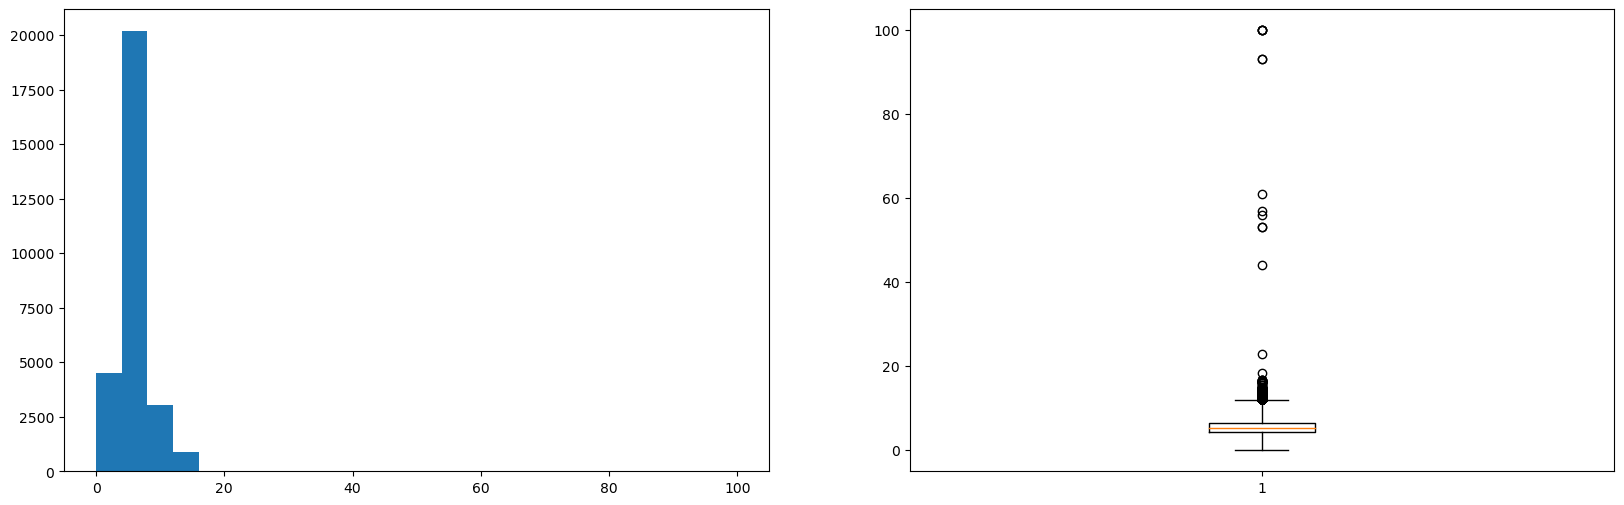

In [169]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_avg, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_avg, whis=2.5)

plt.show()

In [170]:
df["cons_avg"].sort_values(ascending=False).head(20)

265      99.9
18798    99.9
23004    99.9
18799    99.9
21012    93.0
20995    93.0
1771     61.0
6580     57.0
18546    56.0
23974    53.0
24144    53.0
19904    44.0
21345    23.0
21531    18.3
21569    16.8
613      16.7
610      16.7
10406    16.7
1214     16.5
1253     16.5
Name: cons_avg, dtype: float64

In [171]:
df["cons_avg"].sort_values(ascending=True).head(20)

7317     0.0
993      0.0
17234    0.0
3363     0.0
5287     0.0
18287    0.0
3357     0.0
5301     0.0
17213    0.0
1015     0.0
3344     0.0
26715    0.0
5333     0.0
18298    0.0
19775    0.0
1038     0.0
18300    0.0
26726    0.0
18301    0.0
3325     0.0
Name: cons_avg, dtype: float64

In [172]:
df.groupby(["make_model", "body_type", "fuel_type", "cons_avg"]).mileage.describe()

count           mean  \
make_model   body_type        fuel_type cons_avg                         
Dacia        Compact          Benzine   5.600       3.0     865.333333   
             Sedan            Benzine   5.600       1.0   59098.000000   
             Station wagon    Benzine   5.600       1.0    2000.000000   
Dacia Break  Station wagon    Benzine   5.300       1.0     999.000000   
Dacia Dokker Compact          Diesel    4.200       1.0  141100.000000   
...                                                 ...            ...   
Volvo XC90   Off-Road/Pick-up Diesel    9.100       2.0  237102.000000   
                              Electric  2.247       4.0   40399.500000   
             Sedan            Diesel    6.700       3.0   58761.333333   
             Station wagon    Diesel    5.700       2.0  150000.000000   
                                        5.800       2.0  143550.000000   

                                                           std       min  \
make_model   body_type        fuel_type cons_avg                           
Dacia        Compact          Benzine   5.600      1308.275710     110.0   
             Sedan            Benzine   5.600              NaN   59098.0   
             Station wagon    Benzine   5.600              NaN    2000.0   
Dacia Break  Station wagon    Benzine   5.300              NaN     999.0   
Dacia Dokker Compact          Diesel    4.200              NaN  141100.0   
...                                                        ...       ...   
Volvo XC90   Off-Road/Pick-up Diesel    9.100         0.000000  237102.0   
                              Electric  2.247     32215.567671   12500.0   
             Sedan            Diesel    6.700     34192.796176   20635.0   
             Station wagon    Diesel    5.700         0.000000  150000.0   
                                        5.800         0.000000  143550.0   

                                                       25%       50%  \
make_model   body_type        fuel_type cons_avg                       
Dacia        Compact          Benzine   5.600        110.0     110.0   
             Sedan            Benzine   5.600      59098.0   59098.0   
             Station wagon    Benzine   5.600       2000.0    2000.0   
Dacia Break  Station wagon    Benzine   5.300        999.0     999.0   
Dacia Dokker Compact          Diesel    4.200     141100.0  141100.0   
...                                                    ...       ...   
Volvo XC90   Off-Road/Pick-up Diesel    9.100     237102.0  237102.0   
                              Electric  2.247      12500.0   40399.5   
             Sedan            Diesel    6.700      44787.5   68940.0   
             Station wagon    Diesel    5.700     150000.0  150000.0   
                                        5.800     143550.0  143550.0   

                                                       75%       max  
make_model   body_type        fuel_type cons_avg                      
Dacia        Compact          Benzine   5.600       1243.0    2376.0  
             Sedan            Benzine   5.600      59098.0   59098.0  
             Station wagon    Benzine   5.600       2000.0    2000.0  
Dacia Break  Station wagon    Benzine   5.300        999.0     999.0  
Dacia Dokker Compact          Diesel    4.200     141100.0  141100.0  
...                                                    ...       ...  
Volvo XC90   Off-Road/Pick-up Diesel    9.100     237102.0  237102.0  
                              Electric  2.247      68299.0   68299.0  
             Sedan            Diesel    6.700      77824.5   86709.0  
             Station wagon    Diesel    5.700     150000.0  150000.0  
                                        5.800     143550.0  143550.0  

[6838 rows x 8 columns]

**Let's look at the cars, whose fuel consumption is more than 10L/100km:**

In [173]:
df.loc[df["cons_avg"] >= 10][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]\
                                 .sort_values(by=["cons_avg"], ascending=False)

make_model   age         body_type    gearbox drivetrain  \
18799       Nissan Qashqai   5.0           Compact     Manual      Front   
265    Mercedes-Benz A 180   2.0           Compact  Automatic      Front   
18798       Nissan Qashqai   3.0           Compact     Manual      Front   
23004           Ford Focus   3.0             Sedan  Automatic      Front   
20995           Ford Focus   4.0           Compact     Manual      Front   
...                    ...   ...               ...        ...        ...   
22039          Ford Bronco   1.0  Off-Road/Pick-up  Automatic        4WD   
26221            Volvo C70  20.0       Convertible  Automatic      Front   
26569            Volvo C70  24.0             Coupe     Manual      Front   
26568            Volvo C70  24.0             Coupe     Manual      Front   
2181   Mercedes-Benz S 580   1.0             Sedan  Automatic        4WD   

       gears  engine_size fuel_type  empty_weight  co_emissions  cons_avg  
18799    6.0       1197.0   Benzine        1250.0         129.0      99.9  
265      7.0       1332.0   Benzine        1265.0         138.0      99.9  
18798    6.0       1332.0   Benzine        1275.0         121.0      99.9  
23004    8.0       1499.0    Diesel        1280.0         112.0      99.9  
20995    6.0       1499.0    Diesel        1263.0          93.0      93.0  
...      ...          ...       ...           ...           ...       ...  
22039    8.0       1998.0   Benzine        2146.0         238.0      10.0  
26221    5.0       2435.0   Benzine        1597.0         263.0      10.0  
26569    5.0       2319.0   Benzine        1459.0         250.0      10.0  
26568    5.0       2319.0   Benzine        1459.0         250.0      10.0  
2181     6.0       3982.0   Benzine        2095.0         228.0      10.0  

[1746 rows x 11 columns]

In [176]:
df.loc[df["cons_avg"] >= 10]["make_model"].value_counts()

make_model
Ford Mustang             537
Nissan 370Z              154
Volvo C70                137
Nissan 350Z              120
Nissan GT-R               81
                        ... 
Mercedes-Benz CLS 280      1
Mercedes-Benz S 450        1
Mercedes-Benz E 200        1
Mercedes-Benz E 280        1
Volvo S90                  1
Name: count, Length: 134, dtype: int64

In [177]:
df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]

make_model   age         body_type    gearbox drivetrain  gears  \
20930  Ford Mustang  17.0           Compact  Automatic       Rear    6.0   
21156  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
21157  Ford Mustang   7.0       Convertible  Automatic       Rear    6.0   
21158  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
21159  Ford Mustang   3.0       Convertible  Automatic       Rear    6.0   
...             ...   ...               ...        ...        ...    ...   
21929  Ford Mustang   9.0             Coupe  Automatic       Rear    6.0   
21930  Ford Mustang   4.0             Coupe  Automatic       Rear    6.0   
21953  Ford Mustang   0.0  Off-Road/Pick-up  Automatic        4WD    6.0   
21955  Ford Mustang   1.0  Off-Road/Pick-up  Automatic        4WD    1.0   
22123  Ford Mustang   1.0  Off-Road/Pick-up  Automatic        4WD    6.0   

       engine_size fuel_type  empty_weight  co_emissions  cons_avg  
20930       4598.0   Benzine        1659.0         276.0    12.100  
21156       5038.0   Benzine        1893.0         273.0    12.000  
21157       5038.0   Benzine        1722.0         194.0     8.200  
21158       5038.0   Benzine        1659.0         273.0    12.500  
21159       5038.0   Benzine        1893.0         279.0    12.500  
...            ...       ...           ...           ...       ...  
21929       3700.0   Benzine        1659.0         276.0    12.100  
21930       2261.0   Benzine        1737.0         204.0     9.000  
21953       5038.0   Benzine        2218.0           0.0     2.247  
21955       5038.0  Electric        2218.0           0.0     2.247  
22123       5038.0   Benzine        2259.0           0.0     2.247  

[663 rows x 11 columns]

In [178]:
df.loc[df.make_model == "Nissan 370Z"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]

make_model   age    body_type    gearbox drivetrain  gears  \
19089  Nissan 370Z   5.0  Convertible  Automatic       Rear    7.0   
19092  Nissan 370Z  12.0  Convertible     Manual       Rear    6.0   
19093  Nissan 370Z   3.0  Convertible     Manual       Rear    6.0   
19097  Nissan 370Z   3.0  Convertible  Automatic      Front    7.0   
19105  Nissan 370Z  11.0  Convertible  Automatic       Rear    7.0   
...            ...   ...          ...        ...        ...    ...   
19561  Nissan 370Z   4.0        Coupe  Automatic       Rear    7.0   
19568  Nissan 370Z  12.0        Coupe  Automatic       Rear    7.0   
19578  Nissan 370Z   7.0        Coupe     Manual       Rear    6.0   
19583  Nissan 370Z  10.0        Coupe  Automatic       Rear    7.0   
19604  Nissan 370Z   3.0        Coupe     Manual       Rear    8.0   

       engine_size fuel_type  empty_weight  co_emissions  cons_avg  
19089       3696.0   Benzine        1583.0         245.0      10.5  
19092       3696.0   Benzine        1599.0         262.0      11.2  
19093       3696.0   Benzine        1610.0         288.0      10.9  
19097       3696.0   Benzine        1610.0         254.0      10.9  
19105       3696.0   Benzine        1510.0         254.0      10.9  
...            ...       ...           ...           ...       ...  
19561       3696.0   Benzine        1583.0         245.0      10.5  
19568       3700.0   Benzine        1571.0         248.0      12.5  
19578       3696.0   Benzine        1571.0         248.0      10.6  
19583       3696.0   Benzine        1583.0         245.0      10.5  
19604       3696.0   Benzine        1618.0         262.0      11.2  

[154 rows x 11 columns]

In [179]:
df.loc[df.make_model == "Volvo C70"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]

make_model   age    body_type    gearbox drivetrain  gears  engine_size  \
25744  Volvo C70  16.0  Convertible     Manual      Front    6.0       2435.0   
25745  Volvo C70  16.0  Convertible     Manual      Front    5.0       2435.0   
25746  Volvo C70  15.0  Convertible  Automatic      Front    5.0       2521.0   
25747  Volvo C70  11.0  Convertible  Automatic      Front    5.0       1984.0   
25748  Volvo C70  14.0  Convertible     Manual      Front    5.0       2000.0   
...          ...   ...          ...        ...        ...    ...          ...   
26671  Volvo C70  21.0        Coupe     Manual      Front    5.0       2435.0   
26672  Volvo C70  22.0        Coupe     Manual      Front    5.0       1984.0   
26673  Volvo C70  22.0        Coupe     Manual      Front    5.0       2000.0   
26678  Volvo C70  24.0        Coupe  Automatic      Front    4.0       2435.0   
26705  Volvo C70  14.0        Coupe  Automatic      Front    6.0       1997.0   

                fuel_type  empty_weight  co_emissions  cons_avg  
25744             Benzine        1711.0         230.0       9.1  
25745             Benzine        1685.0         215.0       9.0  
25746             Benzine        1597.0         234.0       9.8  
25747              Diesel        1597.0         167.0       6.3  
25748              Diesel        1597.0         167.0       6.3  
...                   ...           ...           ...       ...  
26671  Liquid/Natural Gas        1551.0         250.0       9.9  
26672             Benzine        1436.0         234.0       9.7  
26673             Benzine        1491.0         250.0       8.5  
26678             Benzine        1480.0         250.0      10.7  
26705              Diesel        1706.0         158.0       6.0  

[692 rows x 11 columns]

In [180]:
df.loc[df.make_model == "Mercedes-Benz A 180"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]

make_model   age body_type    gearbox drivetrain  gears  \
13    Mercedes-Benz A 180   2.0   Compact     Manual      Front    6.0   
15    Mercedes-Benz A 180  12.0   Compact     Manual      Front    6.0   
18    Mercedes-Benz A 180   2.0   Compact  Automatic      Front    7.0   
20    Mercedes-Benz A 180   4.0   Compact  Automatic      Front    7.0   
21    Mercedes-Benz A 180   2.0   Compact  Automatic      Front    7.0   
...                   ...   ...       ...        ...        ...    ...   
2171  Mercedes-Benz A 180   2.0     Sedan  Automatic      Front    7.0   
2375  Mercedes-Benz A 180   2.0     Sedan  Automatic      Front    6.0   
2378  Mercedes-Benz A 180   3.0     Sedan  Automatic      Front    7.0   
2379  Mercedes-Benz A 180   3.0     Sedan  Automatic      Front    7.0   
2391  Mercedes-Benz A 180   8.0     Sedan     Manual      Front    6.0   

      engine_size fuel_type  empty_weight  co_emissions  cons_avg  
13         1461.0    Diesel        1330.0         120.0       4.5  
15         1991.0    Diesel        1295.0         138.0       5.2  
18         1461.0    Diesel        1445.0          99.5       3.9  
20         1461.0    Diesel        1425.0          99.5       3.7  
21         1461.0    Diesel        1455.0          99.5       3.9  
...           ...       ...           ...           ...       ...  
2171       1332.0   Benzine        1380.0         128.0       5.3  
2375       1461.0    Diesel        1460.0         101.0       3.8  
2378       1461.0    Diesel        1425.0         100.0       3.8  
2379       1461.0    Diesel        1425.0         121.0       3.8  
2391       1595.0   Benzine        1370.0         130.0       5.5  

[123 rows x 11 columns]

**Domain Knowledge About Average Fuel Consumptions of some Vehicles:**
- Mercedes-Benz A 180's Average Fuel Consumption value is 5.7 L/100km
- Nissan Qashqai's Average Fuel Consumption value is 6.2 L/100 km
- Ford Focus's co2 Average Fuel Consumption value is 4.6 to 6.7 L/100 km
- Mercedes-Benz E 200's Average Fuel Consumption value is 7.1 to 8 L/100 km
- Renault Megane's Average Fuel Consumption value is 4.4 to 6.8 L/100 km
- Toyota Yaris's Average Fuel Consumption value is 5.4 to 6.9 L/100 km
- Hyundai KONA's Average Fuel Consumption value is 4 to 5.8 L/100 km
- Mercedes-Benz GLC 63 AMG's Average Fuel Consumption value is 9 to 16 L/100km
- Ford Mustang's Average Fuel Consumption value is 12 to 16.2 L/100 km
- Nissan GT-R's co2 Average Fuel Consumption value is 11.8 to 19.4 L/100 km
- Nissan Skyline's Average Fuel Consumption value is 16 to 17.7 L/100 km
- Nissan 370Z's Average Fuel Consumption value is 11.2 to 18.1 L/100 km
- Peugeot 205's Average Fuel Consumption value is 6.3 to 9.9 L/100 km
- Volvo C70's Average Fuel Consumption value is 8.9 to 9.8 L/100 km
- Renault Alpine A310's Average Fuel Consumption value is 8.7 to 16.6 L/100 km
- Hyundai Genesis's Average Fuel Consumption value is 9.4 to 14.4 L/100 km
- Fiat Coupe's Average Fuel Consumption value is 8 to 14 L/100 km
- Ford Thunderbird's Average Fuel Consumption value is 13.5 to 19 L/100 km
- **To get more information in detail about Average Car Emission of each maake and model, you can visit car-emissions.com, incardoc.com, and carsfuelconsumption.com**

**It can be concluded that the max value equal to/greater than 20 is anomaly:**

In [181]:
cond_cons_avg = (df["cons_avg"] >= 20)
df.loc[cond_cons_avg, "cons_avg"] = np.nan

In [182]:
df["cons_avg"].isnull().sum()

13

In [183]:
fill(df, "make_model", "body_type", "cons_avg", "median")

COLUMN NAME    :  cons_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  209
--------------------------------
cons_avg
4.90     1043
5.00      966
4.50      889
5.30      887
5.10      886
         ... 
5.55        1
4.25        1
8.55        1
8.65        1
14.50       1
Name: count, Length: 209, dtype: int64


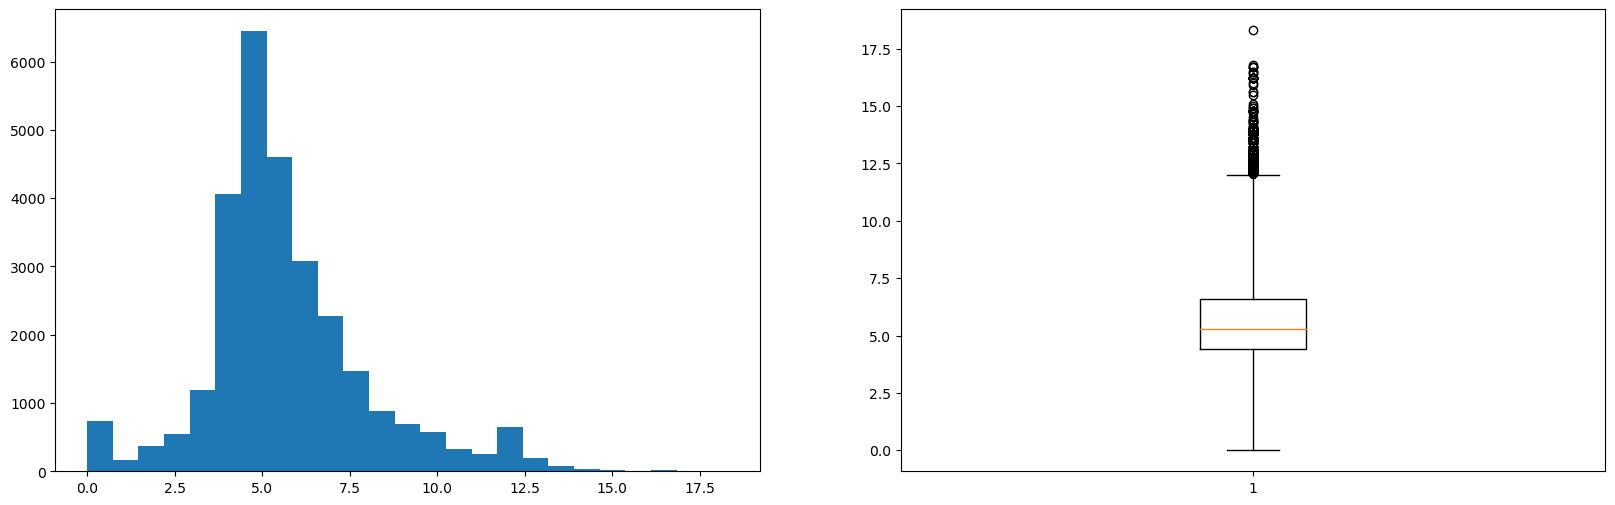

In [184]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_avg, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_avg, whis=2.5)

plt.show()

**previous_owner**

In [185]:
first_looking("previous_owner")

COLUMN NAME    :  previous_owner
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
--------------------------------
previous_owner
1.0     18696
2.0      7196
3.0      1756
4.0       498
5.0       205
6.0       100
8.0        71
7.0        57
9.0        25
12.0        6
10.0        2
14.0        1
13.0        1
Name: count, dtype: int64


In [186]:
df["previous_owner"].describe()

count    28614.000000
mean         1.512686
std          0.940194
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: previous_owner, dtype: float64

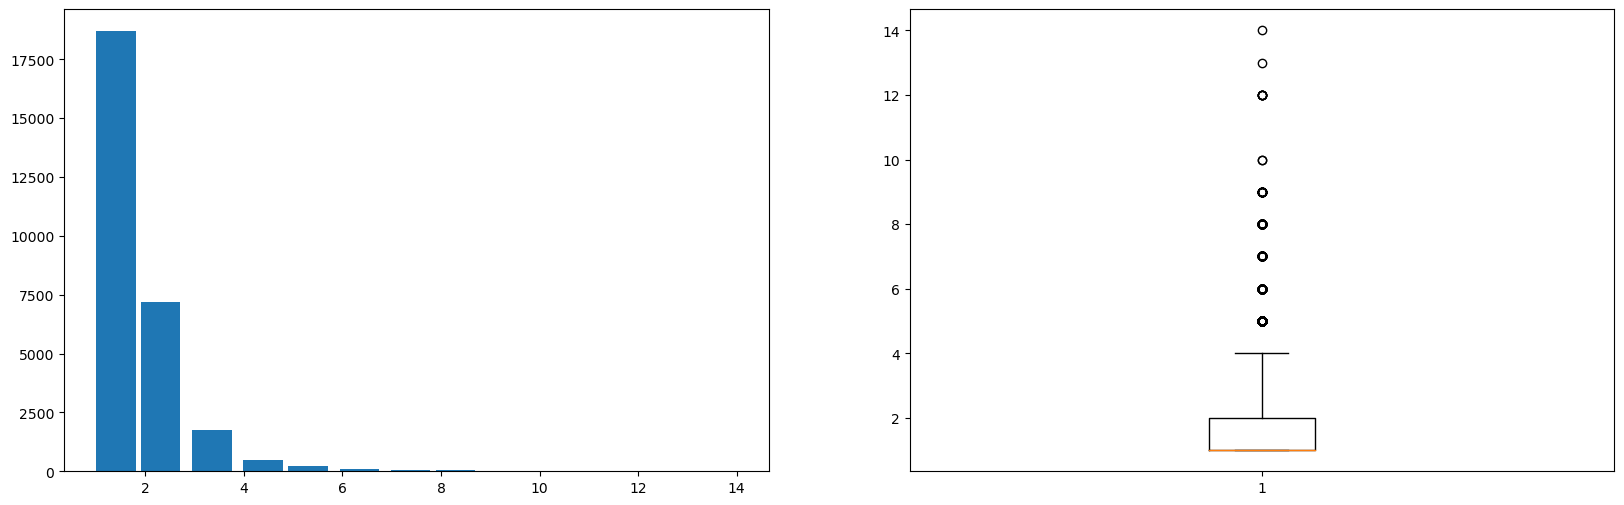

In [187]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["previous_owner"], bins=100, width=0.8)

plt.subplot(122)
plt.boxplot(df["previous_owner"], whis=2.5)

plt.show()

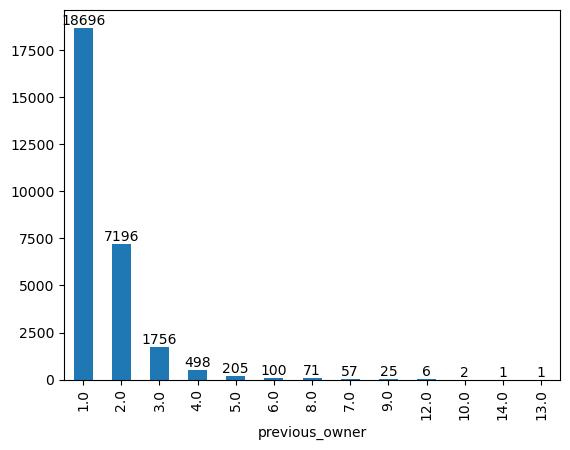

In [188]:
fig, ax = plt.subplots()

df["previous_owner"].value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [189]:
df["previous_owner"].sort_values(ascending=False).head(20)

7554     14.0
7828     13.0
27850    12.0
28401    12.0
19405    12.0
27820    12.0
28230    12.0
28200    12.0
17535    10.0
7259     10.0
26554     9.0
7571      9.0
3177      9.0
26176     9.0
25751     9.0
26067     9.0
26670     9.0
10385     9.0
26391     9.0
26621     9.0
Name: previous_owner, dtype: float64

In [190]:
df["previous_owner"].sort_values(ascending=True).head(20)

14309    1.0
23062    1.0
13598    1.0
13596    1.0
23064    1.0
13594    1.0
13593    1.0
13592    1.0
13591    1.0
13590    1.0
13589    1.0
13588    1.0
13587    1.0
13586    1.0
13585    1.0
13584    1.0
23061    1.0
13582    1.0
13601    1.0
13603    1.0
Name: previous_owner, dtype: float64

In [191]:
df.groupby(["make_model", "body_type", "type", "previous_owner"]).age.describe()

count       mean  \
make_model  body_type        type           previous_owner                     
Dacia       Compact          Demonstration  1.0               1.0   1.000000   
                             Pre-registered 1.0               2.0   0.000000   
            Sedan            Used           1.0               1.0  47.000000   
            Station wagon    Demonstration  1.0               1.0   0.000000   
Dacia Break Station wagon    Demonstration  1.0               1.0   0.000000   
...                                                           ...        ...   
Volvo XC90  Off-Road/Pick-up Used           3.0               7.0  14.571429   
                                            8.0               1.0   8.000000   
            Sedan            Used           1.0               2.0   2.000000   
                                            2.0               1.0   4.000000   
            Station wagon    Used           1.0               4.0   6.000000   

                                                                 std   min  \
make_model  body_type        type           previous_owner                   
Dacia       Compact          Demonstration  1.0                  NaN   1.0   
                             Pre-registered 1.0             0.000000   0.0   
            Sedan            Used           1.0                  NaN  47.0   
            Station wagon    Demonstration  1.0                  NaN   0.0   
Dacia Break Station wagon    Demonstration  1.0                  NaN   0.0   
...                                                              ...   ...   
Volvo XC90  Off-Road/Pick-up Used           3.0             0.975900  14.0   
                                            8.0                  NaN   8.0   
            Sedan            Used           1.0             1.414214   1.0   
                                            2.0                  NaN   4.0   
            Station wagon    Used           1.0             0.000000   6.0   

                                                             25%   50%   75%  \
make_model  body_type        type           previous_owner                     
Dacia       Compact          Demonstration  1.0              1.0   1.0   1.0   
                             Pre-registered 1.0              0.0   0.0   0.0   
            Sedan            Used           1.0             47.0  47.0  47.0   
            Station wagon    Demonstration  1.0              0.0   0.0   0.0   
Dacia Break Station wagon    Demonstration  1.0              0.0   0.0   0.0   
...                                                          ...   ...   ...   
Volvo XC90  Off-Road/Pick-up Used           3.0             14.0  14.0  15.0   
                                            8.0              8.0   8.0   8.0   
            Sedan            Used           1.0              1.5   2.0   2.5   
                                            2.0              4.0   4.0   4.0   
            Station wagon    Used           1.0              6.0   6.0   6.0   

                                                             max  
make_model  body_type        type           previous_owner        
Dacia       Compact          Demonstration  1.0              1.0  
                             Pre-registered 1.0              0.0  
            Sedan            Used           1.0             47.0  
            Station wagon    Demonstration  1.0              0.0  
Dacia Break Station wagon    Demonstration  1.0              0.0  
...                                                          ...  
Volvo XC90  Off-Road/Pick-up Used           3.0             16.0  
                                            8.0              8.0  
            Sedan            Used           1.0              3.0  
                                            2.0              4.0  
            Station wagon    Used           1.0              6.0  

[3239 rows x 8 columns]

In [192]:
df.loc[df["previous_owner"] >= 10][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "previous_owner"]]\
                                 .sort_values(by=["previous_owner"], ascending=False)

make_model   age      body_type    gearbox drivetrain  gears  \
7554   Peugeot 207  15.0    Convertible     Manual      Front    5.0   
7828   Peugeot 306  25.0    Convertible     Manual      Front    5.0   
19405  Nissan 370Z  12.0          Coupe  Automatic       Rear    7.0   
27820    Volvo V70  25.0  Station wagon  Automatic        4WD    8.0   
27850    Volvo 945  25.0  Station wagon     Manual       Rear    5.0   
28200    Volvo V70  25.0  Station wagon  Automatic        4WD    8.0   
28230    Volvo 945  25.0  Station wagon     Manual       Rear    5.0   
28401    Volvo S70  25.0          Sedan     Manual      Front    5.0   
7259   Peugeot 206  18.0        Compact  Automatic      Front    4.0   
17535  Toyota MR 2  29.0          Coupe     Manual       Rear    5.0   

       engine_size           fuel_type  empty_weight  co_emissions  cons_avg  \
7554        1598.0             Benzine        1327.0         155.0      6.50   
7828        1998.0             Benzine        1245.0           0.0      7.60   
19405       3696.0             Benzine        1483.0         245.0     10.50   
27820       2319.0             Benzine        1651.0           0.0     10.75   
27850       1986.0  Liquid/Natural Gas        1320.0         124.0     10.20   
28200       2319.0             Benzine        1651.0           0.0     10.75   
28230       1986.0  Liquid/Natural Gas        1320.0         124.0     10.20   
28401       2435.0             Benzine        1370.0         168.0     10.00   
7259        1587.0             Benzine        1039.0         171.0      7.10   
17535       1998.0             Benzine        1290.0           0.0      7.40   

       previous_owner  
7554             14.0  
7828             13.0  
19405            12.0  
27820            12.0  
27850            12.0  
28200            12.0  
28230            12.0  
28401            12.0  
7259             10.0  
17535            10.0

**10 cars in the data set have had more than 10 previous owners so far. Although there is a small chance that these are real, this small number of outliers may affect the success rate of the machine learning model. Because already more than half of the data has only 1 previous owner, and the Q3 is just 2. I don't want a value greater than 10 in this feature, and since the number of these values is very small, I can drop them from the dataset, for a better working machine learning model.**

In [193]:
drop_pre_owner_index = df[df["previous_owner"] >= 10].index
drop_pre_owner_index

Index([7259, 7554, 7828, 17535, 19405, 27820, 27850, 28200, 28230, 28401], dtype='int64')

In [194]:
print(df.shape)
df.drop(drop_pre_owner_index, inplace=True)
print(df.shape)

(28614, 28)
(28604, 28)


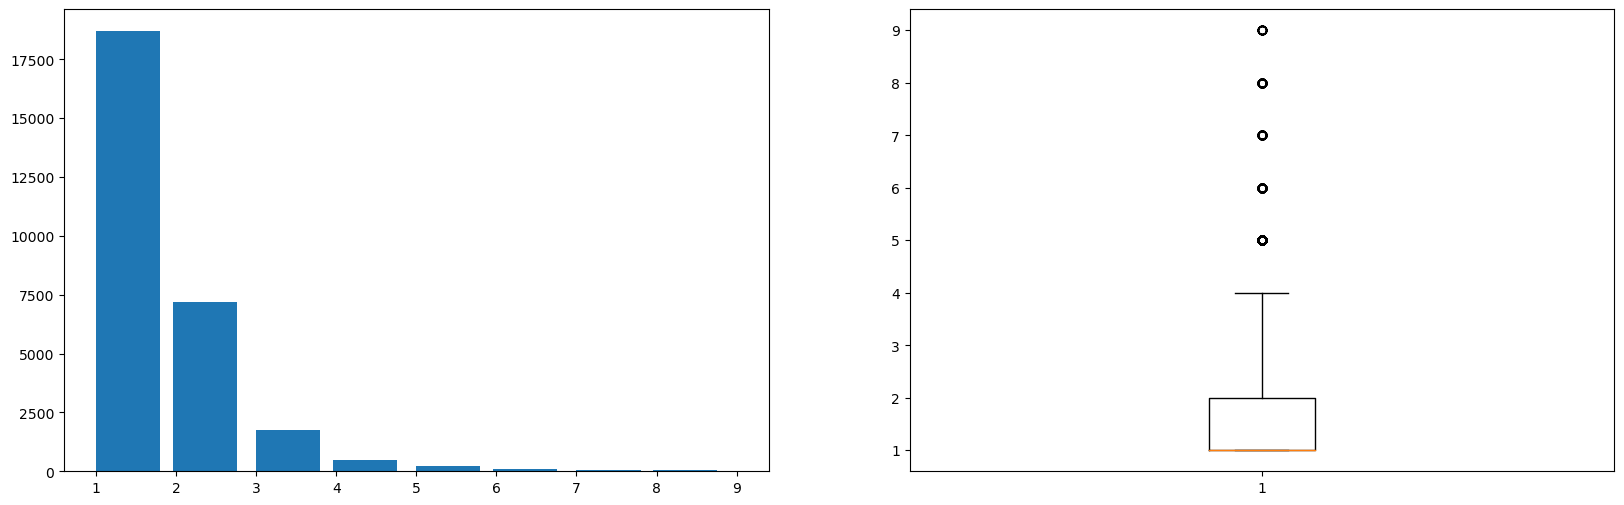

In [195]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["previous_owner"], bins=100, width=0.8)

plt.subplot(122)
plt.boxplot(df["previous_owner"], whis=2.5)

plt.show()

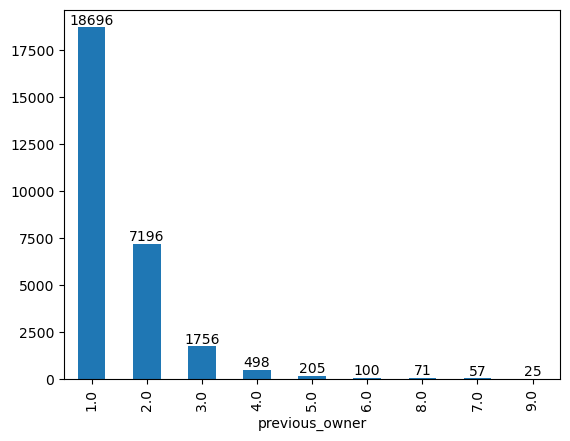

In [196]:
fig, ax = plt.subplots()

df["previous_owner"].value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

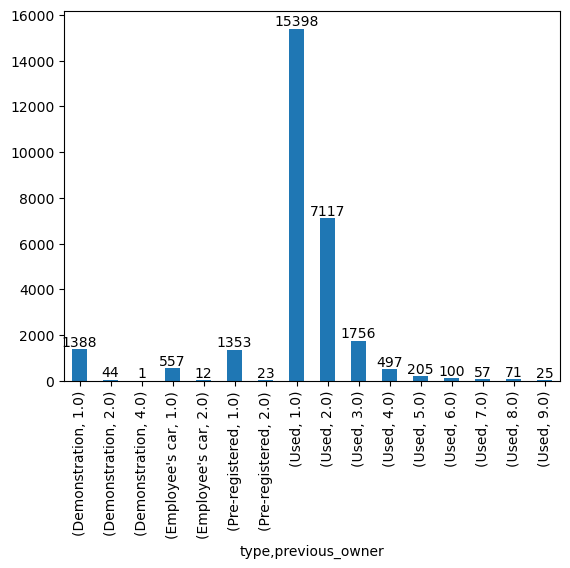

In [197]:
fig, ax = plt.subplots()

df.groupby(["type", "previous_owner"])["previous_owner"].count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

**age**

In [198]:
first_looking("age")

COLUMN NAME    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  83
--------------------------------
age
 3.0      3666
 4.0      3489
 0.0      3087
 1.0      2870
 2.0      2473
          ... 
 89.0        1
 76.0        1
 66.0        1
-180.0       1
-3.0         1
Name: count, Length: 83, dtype: int64


In [199]:
df["age"].describe()

count    28604.000000
mean         6.821389
std          8.735451
min       -180.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        122.000000
Name: age, dtype: float64

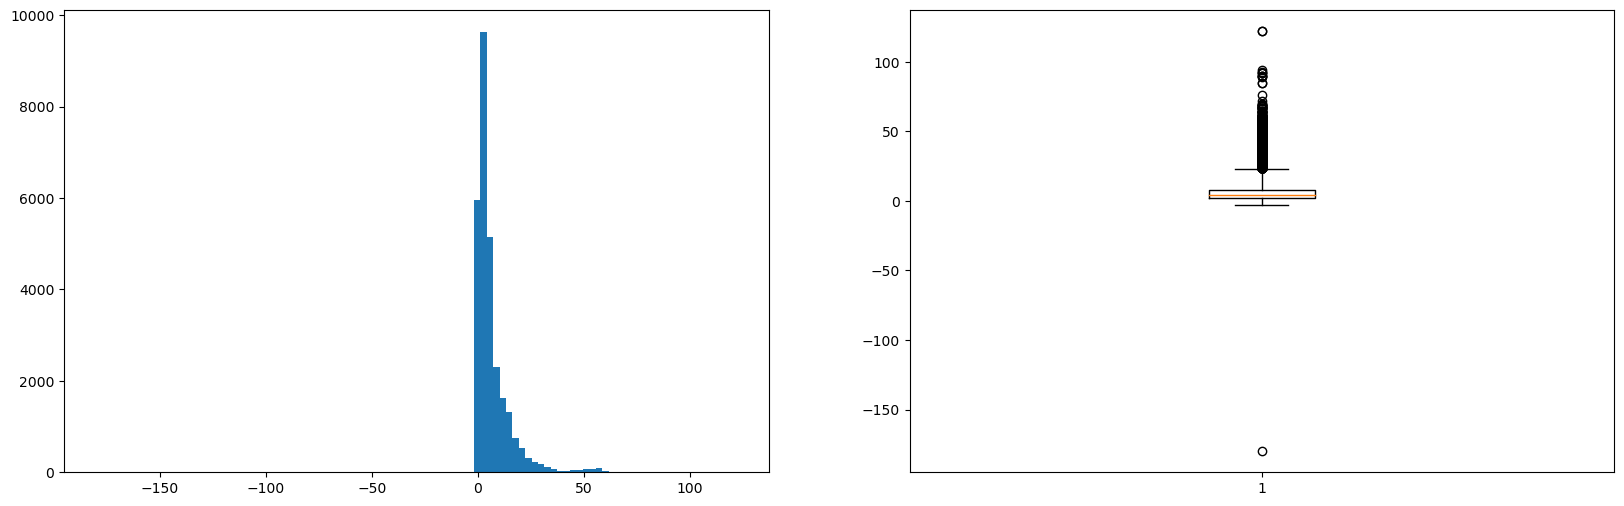

In [200]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)

plt.show()

In [201]:
df.sort_values(by=["age"], ascending=True)["age"].head(20)

7011    -180.0
9764      -3.0
19213     -1.0
9250       0.0
10677      0.0
27461      0.0
10674      0.0
21979      0.0
21980      0.0
21990      0.0
21994      0.0
10634      0.0
21997      0.0
21998      0.0
10630      0.0
10625      0.0
22004      0.0
22008      0.0
22028      0.0
27440      0.0
Name: age, dtype: float64

In [202]:
df.sort_values(by=["age"], ascending=False)["age"].head(20)

24783    122.0
22058    122.0
21372     94.0
21200     93.0
21317     92.0
8043      92.0
21386     90.0
21461     90.0
21338     90.0
10009     89.0
21454     85.0
21349     85.0
9258      76.0
3358      72.0
5300      70.0
771       70.0
26698     69.0
26523     69.0
26668     68.0
26493     68.0
Name: age, dtype: float64

In [203]:
df.groupby(["make_model", "body_type", "type", "previous_owner"]).age.describe()

count       mean  \
make_model  body_type        type           previous_owner                     
Dacia       Compact          Demonstration  1.0               1.0   1.000000   
                             Pre-registered 1.0               2.0   0.000000   
            Sedan            Used           1.0               1.0  47.000000   
            Station wagon    Demonstration  1.0               1.0   0.000000   
Dacia Break Station wagon    Demonstration  1.0               1.0   0.000000   
...                                                           ...        ...   
Volvo XC90  Off-Road/Pick-up Used           3.0               7.0  14.571429   
                                            8.0               1.0   8.000000   
            Sedan            Used           1.0               2.0   2.000000   
                                            2.0               1.0   4.000000   
            Station wagon    Used           1.0               4.0   6.000000   

                                                                 std   min  \
make_model  body_type        type           previous_owner                   
Dacia       Compact          Demonstration  1.0                  NaN   1.0   
                             Pre-registered 1.0             0.000000   0.0   
            Sedan            Used           1.0                  NaN  47.0   
            Station wagon    Demonstration  1.0                  NaN   0.0   
Dacia Break Station wagon    Demonstration  1.0                  NaN   0.0   
...                                                              ...   ...   
Volvo XC90  Off-Road/Pick-up Used           3.0             0.975900  14.0   
                                            8.0                  NaN   8.0   
            Sedan            Used           1.0             1.414214   1.0   
                                            2.0                  NaN   4.0   
            Station wagon    Used           1.0             0.000000   6.0   

                                                             25%   50%   75%  \
make_model  body_type        type           previous_owner                     
Dacia       Compact          Demonstration  1.0              1.0   1.0   1.0   
                             Pre-registered 1.0              0.0   0.0   0.0   
            Sedan            Used           1.0             47.0  47.0  47.0   
            Station wagon    Demonstration  1.0              0.0   0.0   0.0   
Dacia Break Station wagon    Demonstration  1.0              0.0   0.0   0.0   
...                                                          ...   ...   ...   
Volvo XC90  Off-Road/Pick-up Used           3.0             14.0  14.0  15.0   
                                            8.0              8.0   8.0   8.0   
            Sedan            Used           1.0              1.5   2.0   2.5   
                                            2.0              4.0   4.0   4.0   
            Station wagon    Used           1.0              6.0   6.0   6.0   

                                                             max  
make_model  body_type        type           previous_owner        
Dacia       Compact          Demonstration  1.0              1.0  
                             Pre-registered 1.0              0.0  
            Sedan            Used           1.0             47.0  
            Station wagon    Demonstration  1.0              0.0  
Dacia Break Station wagon    Demonstration  1.0              0.0  
...                                                          ...  
Volvo XC90  Off-Road/Pick-up Used           3.0             16.0  
                                            8.0              8.0  
            Sedan            Used           1.0              3.0  
                                            2.0              4.0  
            Station wagon    Used           1.0              6.0  

[3231 rows x 8 columns]

**Classification of Cars:**
- Vintage Car: Manufactured between 1919 and 1930. Either a “survivor” or restored in conformance to the original manufacturer specifications
- Antique Car: Manufactured 1975 or earlier (>45 years old). Either a “survivor” or restored in conformance to the original manufacturer specifications
- Classic Car: Manufactured 2000 or earlier (>20 years old)

**So let's look at the cars older than 20 years:**

In [204]:
df.loc[df["age"] > 20][["make_model", "age", "previous_owner", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "cons_avg"]]\
                                 .sort_values(by=["age"], ascending=False)

make_model    age  previous_owner         body_type    gearbox  \
22058     Ford Bronco  122.0             1.0  Off-Road/Pick-up  Automatic   
24783   Hyundai IONIQ  122.0             1.0             Sedan  Automatic   
21372           Ford    94.0             1.0       Convertible  Automatic   
21200          Ford M   93.0             1.0       Convertible     Manual   
21317           Ford    92.0             3.0       Convertible  Automatic   
...               ...    ...             ...               ...        ...   
20645   Nissan Patrol   21.0             2.0             Sedan  Automatic   
20114  Nissan Primera   21.0             2.0     Station wagon     Manual   
20103  Nissan Primera   21.0             3.0     Station wagon     Manual   
3348       Opel Astra   21.0             1.0             Coupe     Manual   
7754      Peugeot 206   21.0             2.0       Convertible     Manual   

      drivetrain  gears  engine_size fuel_type  cons_avg  
22058        4WD    8.0       2000.0   Benzine       8.3  
24783      Front    6.0       1580.0   Benzine       1.1  
21372       Rear    3.0       3600.0   Benzine      12.0  
21200      Front    6.0       2043.0   Benzine       5.3  
21317       Rear    3.0       5700.0   Benzine      12.0  
...          ...    ...          ...       ...       ...  
20645        4WD    5.0       2953.0    Diesel       9.5  
20114      Front    5.0       1998.0   Benzine       8.3  
20103      Front    5.0       1769.0   Benzine       7.4  
3348       Front    5.0       1998.0   Benzine       8.9  
7754       Front    5.0       1587.0   Benzine       7.0  

[1692 rows x 10 columns]

In [205]:
df['age'].value_counts()

age
 3.0      3666
 4.0      3489
 0.0      3087
 1.0      2870
 2.0      2473
          ... 
 89.0        1
 76.0        1
 66.0        1
-180.0       1
-3.0         1
Name: count, Length: 83, dtype: int64

**I have decided to exclude Vintage Cars, Antique Cars and Classic Cars from this analysis due to the lack of their counts. Also, since there cannot be any car with age less than 0, I will drop those values as well.**

In [206]:
drop_old_cars_index = df.loc[(df["age"] > 20) | (df["age"] < 0)].index
drop_old_cars_index

Index([   88,   282,   402,   442,   443,   452,   487,   516,   529,   538,
       ...
       28463, 28496, 28504, 28511, 28560, 28564, 28573, 28602, 28614, 28615],
      dtype='int64', length=1695)

In [207]:
print(df.shape)
df.drop(drop_old_cars_index, axis=0, inplace=True)
print(df.shape)

(28604, 28)
(26909, 28)


In [208]:
df['age'].value_counts()

age
3.0     3666
4.0     3489
0.0     3087
1.0     2870
2.0     2473
5.0     2426
6.0     1486
7.0     1237
8.0      936
9.0      703
10.0     655
11.0     641
12.0     558
15.0     491
14.0     441
13.0     424
16.0     395
17.0     287
18.0     246
19.0     211
20.0     187
Name: count, dtype: int64

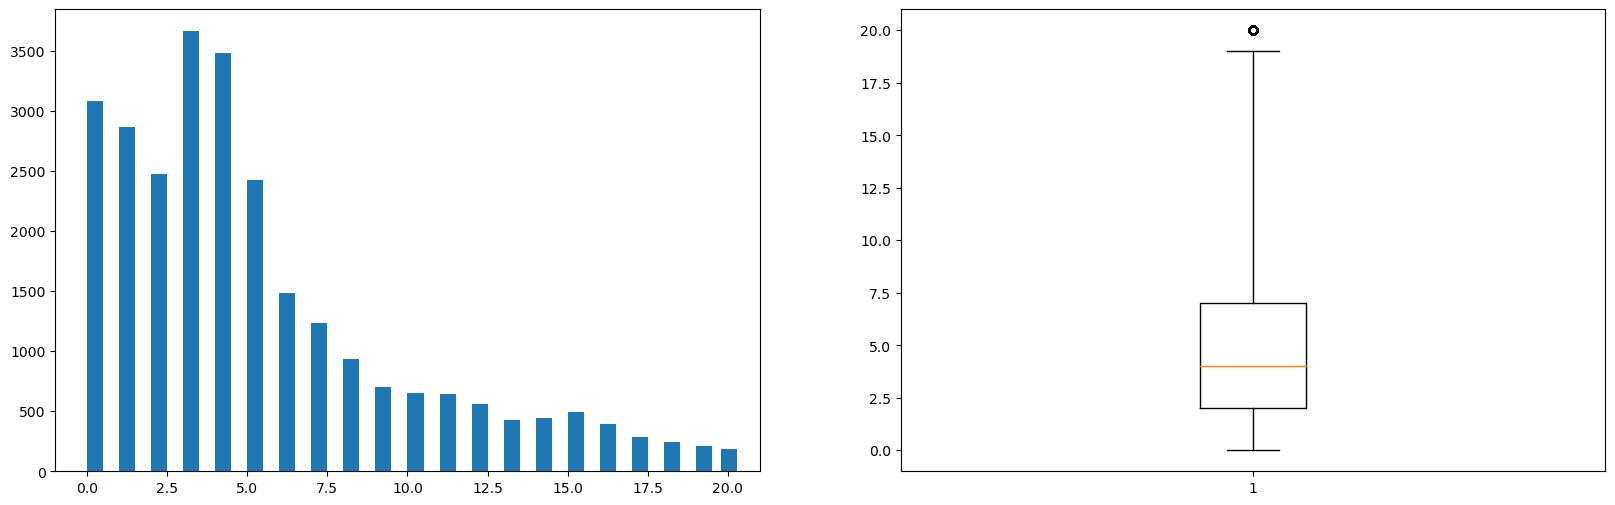

In [209]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100, width=0.5)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)

plt.show()

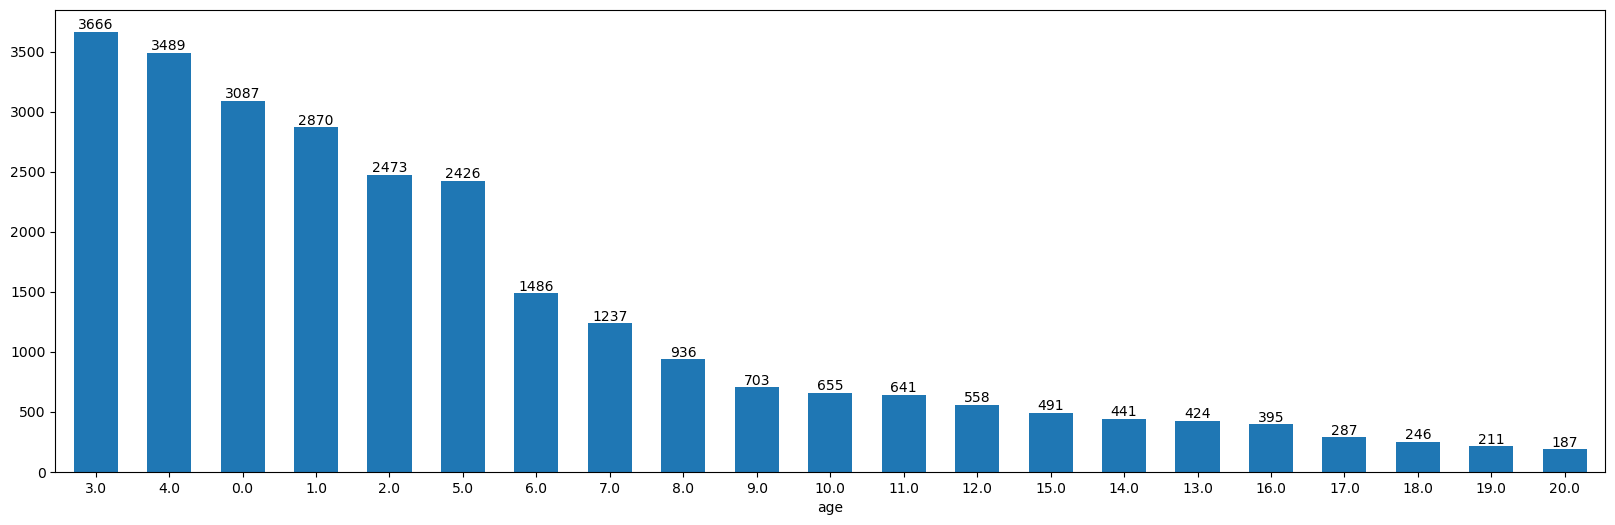

In [212]:
fig, ax = plt.subplots(figsize=(20,6))

df["age"].value_counts(dropna=False).plot.bar(width=0.6)

plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

**power_kw**

In [214]:
first_looking("power_kw")

COLUMN NAME    :  power_kw
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  321
--------------------------------
power_kw
110.0    1987
96.0     1353
88.0     1181
81.0     1156
66.0     1087
         ... 
665.0       1
883.0       1
246.0       1
9.0         1
746.0       1
Name: count, Length: 321, dtype: int64


In [216]:
df["power_kw"].describe()

count    26909.000000
mean       119.473782
std         68.503394
min          1.000000
25%         80.000000
50%        100.000000
75%        135.000000
max        883.000000
Name: power_kw, dtype: float64

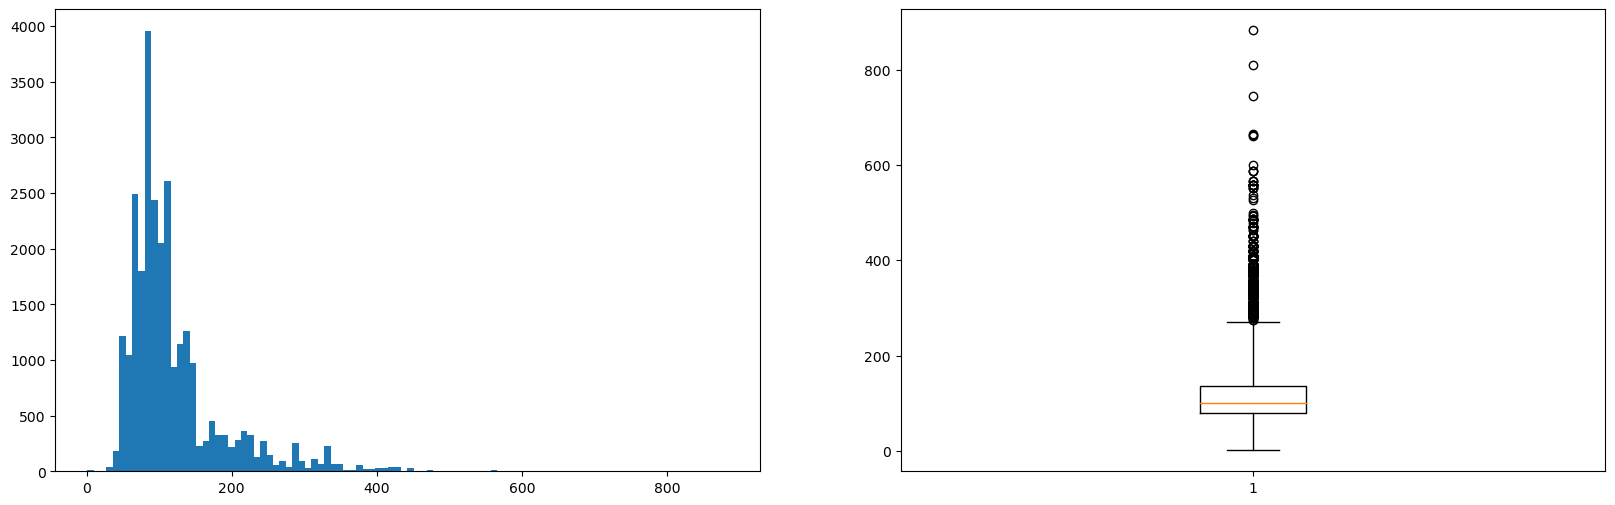

In [218]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["power_kw"], bins=100)

plt.subplot(122)
plt.boxplot(df["power_kw"], whis=2.5)

plt.show()

In [219]:
df["power_kw"].sort_values(ascending=False).head(20)

19469    883.0
19499    810.0
19288    746.0
19473    665.0
19584    664.0
21772    662.0
19534    600.0
1076     588.0
1451     588.0
19483    588.0
21569    567.0
21541    567.0
21662    567.0
21818    559.0
21801    559.0
21781    559.0
21780    559.0
21821    559.0
21777    559.0
21794    559.0
Name: power_kw, dtype: float64

In [220]:
df["power_kw"].sort_values(ascending=True).head(20)

5173      1.0
5430      1.0
22101     3.0
5786      4.0
6205      4.0
5748      4.0
6166      4.0
5936      4.0
24429     6.0
5545      7.0
5919      8.0
5952      8.0
5816      8.0
5140      9.0
5836     12.0
4838     12.0
4886     13.0
16416    18.0
16471    18.0
16405    19.0
Name: power_kw, dtype: float64

In [222]:
df.groupby(["make_model", "body_type", "fuel_type"]).power_kw.describe()

count        mean        std    min  \
make_model   body_type        fuel_type                                        
Dacia        Compact          Benzine      3.0   33.000000   0.000000   33.0   
             Station wagon    Benzine      1.0   81.000000        NaN   81.0   
Dacia Break  Station wagon    Benzine      1.0  110.000000        NaN  110.0   
Dacia Dokker Compact          Diesel       1.0   66.000000        NaN   66.0   
             Off-Road/Pick-up Benzine      1.0   75.000000        NaN   75.0   
...                                        ...         ...        ...    ...   
Volvo XC90   Off-Road/Pick-up Benzine     38.0  240.157895  35.373319  184.0   
                              Diesel     157.0  182.312102  40.423377  120.0   
                              Electric     4.0  290.500000   4.041452  287.0   
             Sedan            Diesel       3.0  189.666667  28.867513  173.0   
             Station wagon    Diesel       4.0  165.000000   0.000000  165.0   

                                           25%    50%     75%    max  
make_model   body_type        fuel_type                               
Dacia        Compact          Benzine     33.0   33.0   33.00   33.0  
             Station wagon    Benzine     81.0   81.0   81.00   81.0  
Dacia Break  Station wagon    Benzine    110.0  110.0  110.00  110.0  
Dacia Dokker Compact          Diesel      66.0   66.0   66.00   66.0  
             Off-Road/Pick-up Benzine     75.0   75.0   75.00   75.0  
...                                        ...    ...     ...    ...  
Volvo XC90   Off-Road/Pick-up Benzine    223.0  228.0  287.75  288.0  
                              Diesel     173.0  173.0  173.00  300.0  
                              Electric   287.0  290.5  294.00  294.0  
             Sedan            Diesel     173.0  173.0  198.00  223.0  
             Station wagon    Diesel     165.0  165.0  165.00  165.0  

[1543 rows x 8 columns]

In [224]:
df.loc[(df["power_kw"] == 9) | (df["power_kw"] == 12)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "power_kw"]]\
                                 .sort_values(by=["power_kw"], ascending=False)

make_model   age body_type    gearbox drivetrain  gears  \
4838   Renault Twizy  10.0   Compact  Automatic       Rear    1.0   
5836  Renault Megane   9.0     Coupe     Manual      Front    6.0   
5140   Renault Twizy   0.0   Compact  Automatic       Rear    1.0   

      engine_size fuel_type  empty_weight  co_emissions  cons_avg  power_kw  
4838       1598.0  Electric         473.0           0.0     2.247      12.0  
5836       1998.0   Benzine        1387.0         178.0     7.600      12.0  
5140       1598.0  Electric         562.0           0.0     2.247       9.0

In [226]:
df.loc[df.make_model == "Renault Twizy"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "power_kw"]]

make_model   age         body_type    gearbox drivetrain  gears  \
4838  Renault Twizy  10.0           Compact  Automatic       Rear    1.0   
4886  Renault Twizy   1.0           Compact  Automatic       Rear    1.0   
4943  Renault Twizy   6.0           Compact  Automatic       Rear    1.0   
5140  Renault Twizy   0.0           Compact  Automatic       Rear    1.0   
5430  Renault Twizy   5.0       Convertible  Automatic      Front    1.0   
5748  Renault Twizy  10.0             Coupe  Automatic      Front    1.0   
5786  Renault Twizy   3.0             Coupe  Automatic      Front    1.0   
5816  Renault Twizy   7.0             Coupe  Automatic      Front    1.0   
5919  Renault Twizy   8.0             Coupe  Automatic       Rear    1.0   
5936  Renault Twizy   2.0             Coupe  Automatic      Front    1.0   
6166  Renault Twizy  10.0  Off-Road/Pick-up  Automatic       Rear    1.0   
6205  Renault Twizy   6.0  Off-Road/Pick-up  Automatic       Rear    1.0   

      engine_size fuel_type  empty_weight  co_emissions  cons_avg  power_kw  
4838       1598.0  Electric         473.0           0.0     2.247      12.0  
4886       1598.0  Electric         473.0           0.0     2.247      13.0  
4943       1598.0  Electric         473.0           0.0     2.247      59.0  
5140       1598.0  Electric         562.0           0.0     2.247       9.0  
5430       1598.0  Electric         473.0           0.0     2.247       1.0  
5748       1598.0  Electric         562.0           0.0     2.247       4.0  
5786       1598.0  Electric         474.0           0.0     2.247       4.0  
5816       1598.0  Electric         562.0           0.0     2.247       8.0  
5919       1598.0  Electric         562.0           0.0     2.247       8.0  
5936       1598.0  Electric         562.0           0.0     2.247       4.0  
6166       1598.0  Electric         347.0           0.0     2.247       4.0  
6205       1598.0  Electric         375.0           0.0     2.247       4.0

In [227]:
df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "power_kw"]]

make_model   age body_type    gearbox drivetrain  gears  \
4783  Renault Megane   1.0   Compact     Manual      Front    6.0   
4786  Renault Megane   1.0   Compact  Automatic      Front    6.0   
4789  Renault Megane   4.0   Compact  Automatic      Front    7.0   
4791  Renault Megane   7.0   Compact     Manual      Front    6.0   
4793  Renault Megane   8.0   Compact     Manual      Front    6.0   
...              ...   ...       ...        ...        ...    ...   
7111  Renault Megane   0.0     Sedan  Automatic      Front    6.0   
7115  Renault Megane  10.0     Sedan     Manual      Front    6.0   
7117  Renault Megane   2.0     Sedan     Manual      Front    6.0   
7118  Renault Megane   2.0     Sedan  Automatic      Front    7.0   
7123  Renault Megane   2.0     Sedan     Manual      Front    6.0   

      engine_size fuel_type  empty_weight  co_emissions  cons_avg  power_kw  
4783       1332.0   Benzine        1180.0         126.0      5.50     103.0  
4786       1798.0   Benzine        1381.0         133.5      0.00     221.0  
4789       1500.0    Diesel        1180.0         104.0      3.95      81.0  
4791       1461.0    Diesel        1215.0         104.0      3.50      81.0  
4793       1461.0    Diesel        1190.0          90.0      3.40      81.0  
...           ...       ...           ...           ...       ...       ...  
7111       1461.0   Benzine        1315.0         127.0      5.65     160.0  
7115       1200.0   Benzine        1315.0         127.0      5.65      85.0  
7117       1461.0    Diesel        1315.0         102.0      3.90      85.0  
7118       1461.0    Diesel        1315.0         104.0      3.90      85.0  
7123       1461.0    Diesel        1315.0         104.0      3.90      85.0  

[832 rows x 12 columns]

In [230]:
 power_kw_counts = df['power_kw'].value_counts()

In [231]:
power_kw_counts[power_kw_counts < 10]

power_kw
559.0    9
123.0    9
127.0    9
239.0    9
343.0    8
        ..
665.0    1
883.0    1
246.0    1
9.0      1
746.0    1
Name: count, Length: 145, dtype: int64

**There are some observations whose frequencies are less than 10. These observations increase the number of unique values and decrease the success of the machine learning model. But I don't want to drop these observations from the dataset right away because they are not that few.**

**Therefore I have decided to assign the values of observations whose frequencies are less than 10 to NaN and than fill them with the median value of the related make_model and body_type group to increase the precision of the machine learning model:**

In [234]:
less_freq_kw = power_kw_counts[power_kw_counts < 10].index

In [235]:
less_freq_kw

Index([559.0, 123.0, 127.0, 239.0, 343.0, 324.0, 198.0, 188.0, 131.0, 153.0,
       ...
       496.0, 664.0, 600.0, 478.0, 810.0, 665.0, 883.0, 246.0,   9.0, 746.0],
      dtype='float64', name='power_kw', length=145)

In [236]:
df["power_kw"].replace(less_freq_kw, np.nan, inplace=True)

In [238]:
df["power_kw"].isnull().sum()

464

In [239]:
fill(df, "make_model", "body_type", "power_kw", "median")

COLUMN NAME    :  power_kw
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  186
--------------------------------
power_kw
110.0    2005
96.0     1369
88.0     1185
81.0     1157
66.0     1094
         ... 
212.5       1
355.0       1
440.0       1
230.0       1
98.5        1
Name: count, Length: 186, dtype: int64


# Final Step

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26909 entries, 0 to 28629
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26909 non-null  object 
 1   make                           26909 non-null  object 
 2   price                          26909 non-null  float64
 3   body_type                      26909 non-null  object 
 4   type                           26909 non-null  object 
 5   warranty                       26909 non-null  object 
 6   mileage                        26909 non-null  float64
 7   gearbox                        26909 non-null  object 
 8   fuel_type                      26909 non-null  object 
 9   seller                         26909 non-null  object 
 10  engine_size                    26909 non-null  float64
 11  gears                          26909 non-null  float64
 12  co_emissions                   26909 non-null  floa

In [245]:
df.head(5).T

0  \
make_model                        Mercedes-Benz A 160   
make                                    Mercedes-Benz   
price                                         16950.0   
body_type                                     Compact   
type                                             Used   
warranty                                          Yes   
mileage                                      120200.0   
gearbox                                        Manual   
fuel_type                                      Diesel   
seller                                         Dealer   
engine_size                                    1595.0   
gears                                             5.0   
co_emissions                                     98.0   
drivetrain                                      Front   
extras                                   Alloy wheels   
empty_weight                                   1270.0   
full_service_history                               No   
non_smoker_vehicle                                 No   
upholstery                                      Cloth   
previous_owner                                    2.0   
energy_efficiency_class                     efficient   
age                                               6.0   
power_kw                                         75.0   
cons_avg                                          3.8   
comfort_&_convenience_Package                Standard   
entertainment_&_media_Package                Standard   
safety_&_security_Package      Safety Premium Package   

                                                                               1  \
make_model                                                 Mercedes-Benz EQE 350   
make                                                               Mercedes-Benz   
price                                                                    80900.0   
body_type                                                                Compact   
type                                                              Pre-registered   
warranty                                                                     Yes   
mileage                                                                   5000.0   
gearbox                                                                Automatic   
fuel_type                                                               Electric   
seller                                                                    Dealer   
engine_size                                                               1598.0   
gears                                                                        1.0   
co_emissions                                                                 0.0   
drivetrain                                                                   4WD   
extras                         Alloy wheels (21"), Shift paddles, Sport packa...   
empty_weight                                                              2355.0   
full_service_history                                                          No   
non_smoker_vehicle                                                            No   
upholstery                                                     Part/Full Leather   
previous_owner                                                               1.0   
energy_efficiency_class                                                efficient   
age                                                                          0.0   
power_kw                                                                   215.0   
cons_avg                                                                   2.247   
comfort_&_convenience_Package                                            Premium   
entertainment_&_media_Package                                               Plus   
safety_&_security_Package                                 Safety Premium Package   

                                                         2  \
make_model                          Merc

In [246]:
numeric_col.head()

price  doors   mileage  seats  engine_size  gears  co_emissions  \
0  16950.0    5.0  120200.0    5.0       1595.0    5.0          98.0   
1  80900.0    4.0    5000.0    5.0          1.0    9.0           0.0   
2  69900.0    5.0   18900.0    5.0       1991.0    8.0         162.0   
3  46990.0    5.0   18995.0    5.0       1991.0    7.0         169.0   
4  16800.0    5.0  197000.0    5.0       2143.0    7.0         162.0   

   empty_weight  previous_owner  age  power_kw  cons_avg  
0        1270.0             2.0  6.0      75.0     3.800  
1        2355.0             1.0  0.0     215.0     2.247  
2        1555.0             2.0  2.0     310.0     8.400  
3        1455.0             2.0  2.0     225.0     7.300  
4        1545.0             2.0  7.0     100.0     4.900

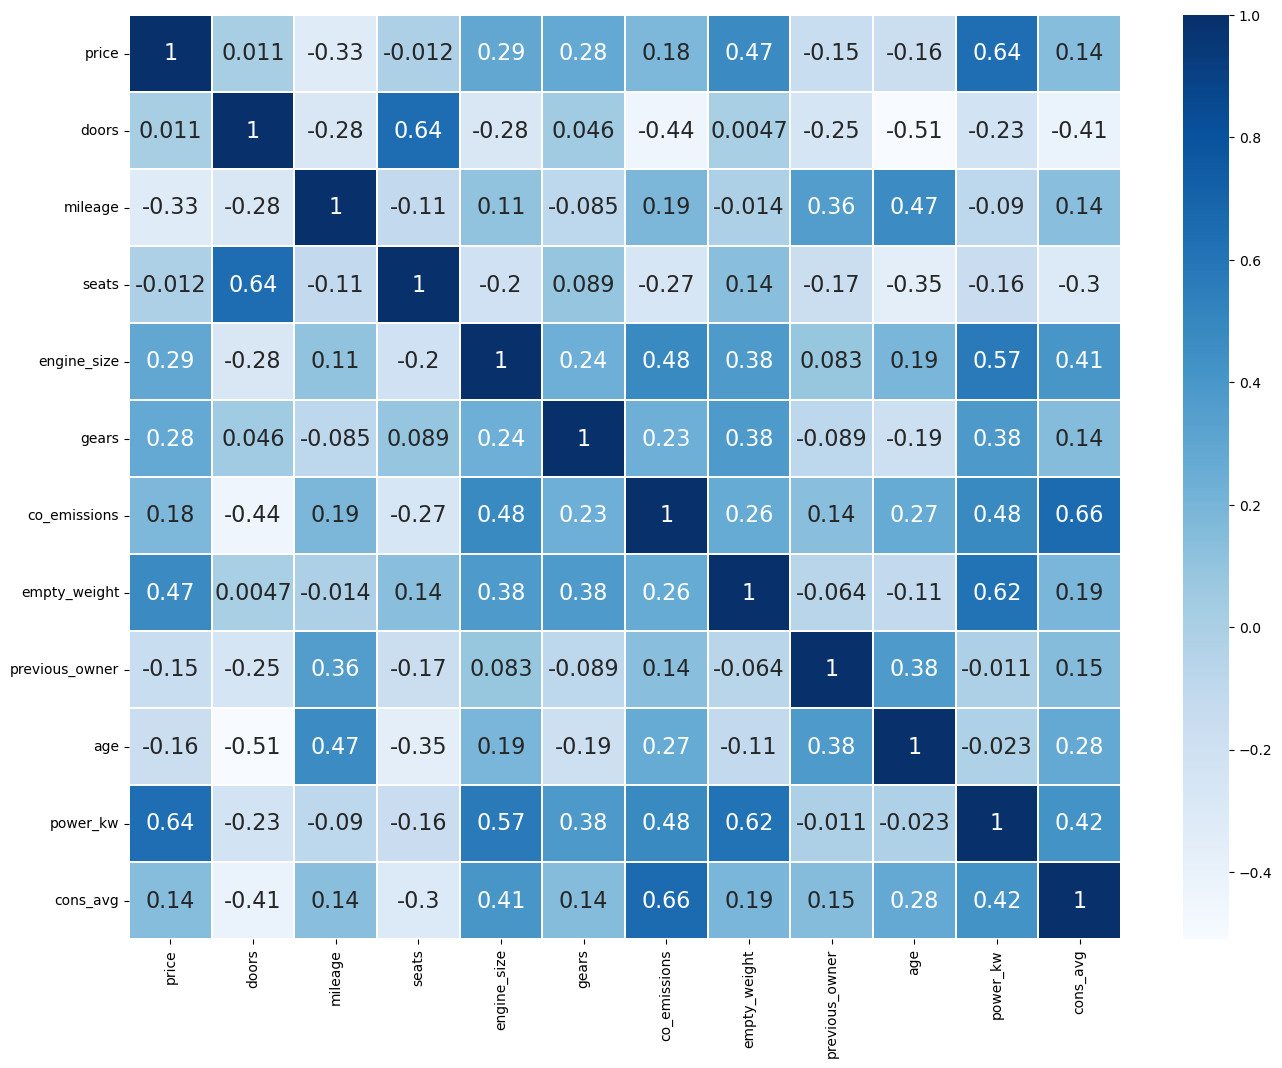

In [247]:
plt.figure(figsize=(16, 12))

sns.heatmap(numeric_col.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

# Examination of Multicollinearity

**Multicollinearity prevents my model from detecting important features.** Depending on the situation, it may not be a problem for the model if only slight or moderate collinearity issue occurs. However, it is strongly advised to solve the issue if severe collinearity issue exists(e.g. correlation >0.8 between 2 variables or Variance inflation factor(VIF) >20 )

In [250]:
!pip install termcolor

In [259]:
from termcolor import cprint

def multicollinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .6 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"Multicollinearity alert in between --> {col} - {i} --> {round(df_temp[col][i], 6)}", "red", attrs=["bold"])
    else:
       
        pass

**Now I am going to check the multicollinearity in the numeric columns**

In [260]:
multicollinearity_control(numeric_col)

Multicollinearity alert in between --> price - power_kw --> 0.637681
Multicollinearity alert in between --> doors - seats --> 0.641343
Multicollinearity alert in between --> seats - doors --> 0.641343
Multicollinearity alert in between --> co_emissions - cons_avg --> 0.657558
Multicollinearity alert in between --> empty_weight - power_kw --> 0.616131
Multicollinearity alert in between --> power_kw - price --> 0.637681
Multicollinearity alert in between --> power_kw - empty_weight --> 0.616131
Multicollinearity alert in between --> cons_avg - co_emissions --> 0.657558


**Let's check the correlation of the numeric features with our target feature**

In [264]:
target = 'price'

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_by_target = df[numeric_columns].corr()[target].sort_values()
corr_by_target

age              -0.405785
mileage          -0.397009
previous_owner   -0.190523
gears             0.214480
co_emissions      0.215888
cons_avg          0.224111
engine_size       0.484494
empty_weight      0.581159
power_kw          0.710088
price             1.000000
Name: price, dtype: float64

C:\Users\49179\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\49179\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\49179\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


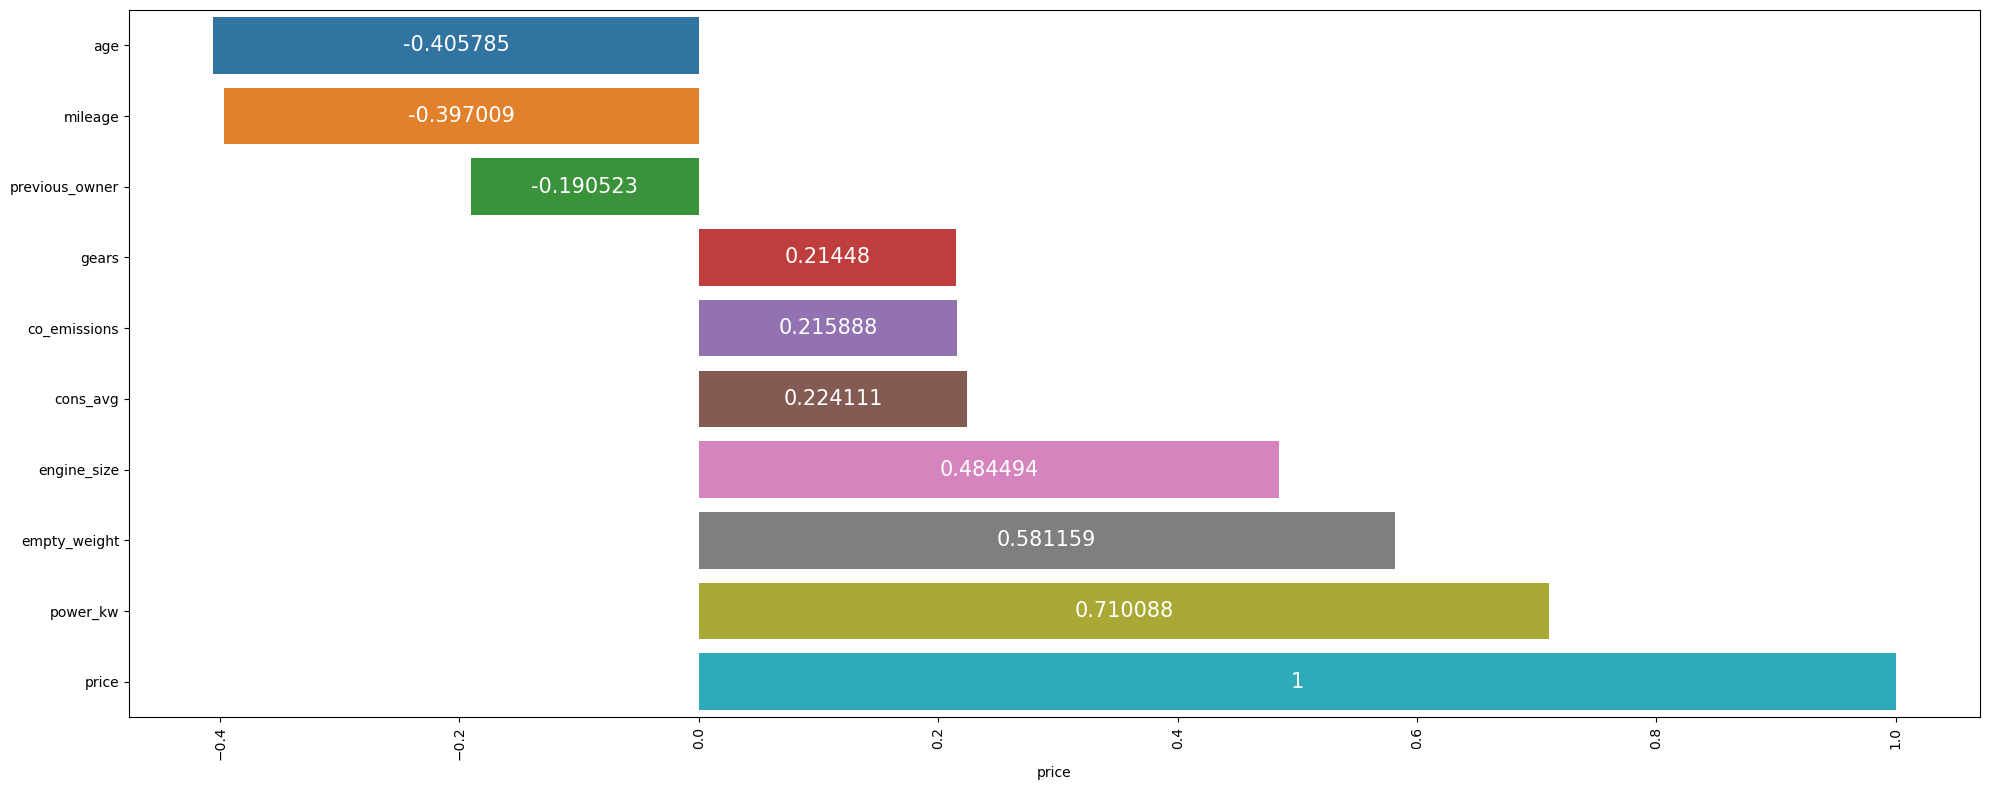

In [273]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(y = corr_by_target.index, x = corr_by_target)
plt.xticks(rotation=90)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fontsize=15, rotation=0, label_type='center', color="white")

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26909 entries, 0 to 28629
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26909 non-null  object 
 1   make                           26909 non-null  object 
 2   price                          26909 non-null  float64
 3   body_type                      26909 non-null  object 
 4   type                           26909 non-null  object 
 5   warranty                       26909 non-null  object 
 6   mileage                        26909 non-null  float64
 7   gearbox                        26909 non-null  object 
 8   fuel_type                      26909 non-null  object 
 9   seller                         26909 non-null  object 
 10  engine_size                    26909 non-null  float64
 11  gears                          26909 non-null  float64
 12  co_emissions                   26909 non-null  floa

In [278]:
df.duplicated(keep=False).sum()

5972

**There has been actually a hot debate about whether we should drop duplicates or not. While some people claim that "Yes. You ALWAYS remove duplicate values, regardless of the model used. The cleaner the data, the better the results." and others mention that "No. The duplicates indicate frequency which is important, especially in Bayesian based methods. Keeping duplicate features in dataset introduces the problem of multicollinearity. Thats why I have decided to continue without duplicates for the further analysis**



In [279]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(26909, 27)
(23137, 27)


# Some Questions on Analysis

**What is theaverage Mileage of the vehicles according to their body types?**

In [281]:
avg_mileage = df.groupby(["make_model", "body_type"]).mileage.mean()
avg_mileage

make_model    body_type       
Dacia         Compact                865.333333
              Station wagon         2000.000000
Dacia Break   Station wagon          999.000000
Dacia Dokker  Compact             141100.000000
              Off-Road/Pick-up    100000.000000
                                      ...      
Volvo XC70    Station wagon       181608.000000
Volvo XC90    Coupe                81250.000000
              Off-Road/Pick-up     84364.049505
              Sedan                58761.333333
              Station wagon       146775.000000
Name: mileage, Length: 1073, dtype: float64

In [282]:
avg_mileage_body = df.groupby("body_type").mileage.mean()
avg_mileage_body

body_type
Compact             67788.429510
Convertible         98384.472855
Coupe               88227.076063
Off-Road/Pick-up    49762.646688
Sedan               50656.203149
Station wagon       73906.737213
Name: mileage, dtype: float64

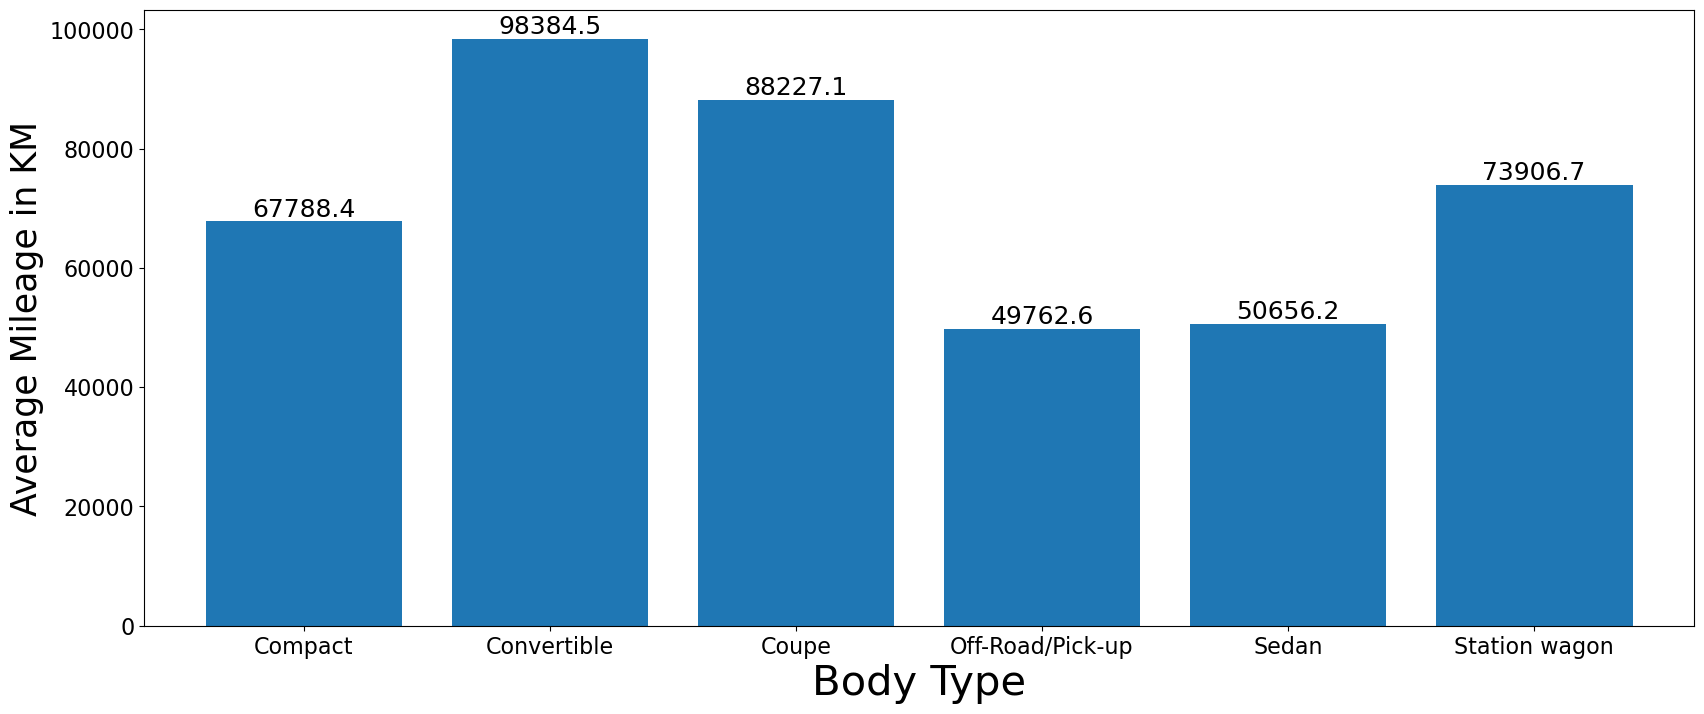

In [283]:
ax = avg_mileage_body.plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)
    
ax.set_xlabel('Body Type', fontsize=30)
ax.set_ylabel('Average Mileage in KM', fontsize=25);

**What is the average price of the vehicles according to the gearbox they have?**

In [284]:
avg_price1 = df.groupby(["make_model", "gearbox"]).price.mean()
avg_price1

make_model    gearbox       
Dacia         Automatic         21431.000000
              Manual            21799.000000
Dacia Break   Manual            20500.000000
Dacia Dokker  Manual            13099.446809
Dacia Duster  Automatic         18861.200000
                                    ...     
Volvo XC70    Automatic         21652.187500
              Manual            15950.000000
Volvo XC90    Automatic         52483.990385
              Manual             7333.000000
              Semi-automatic    36000.000000
Name: price, Length: 754, dtype: float64

In [285]:
avg_price_body = df.groupby("body_type").price.mean().sort_values(ascending=False)
avg_price_body

body_type
Coupe               30692.872110
Off-Road/Pick-up    29731.707436
Sedan               23328.398758
Station wagon       22869.853175
Convertible         21595.664733
Compact             16045.698100
Name: price, dtype: float64

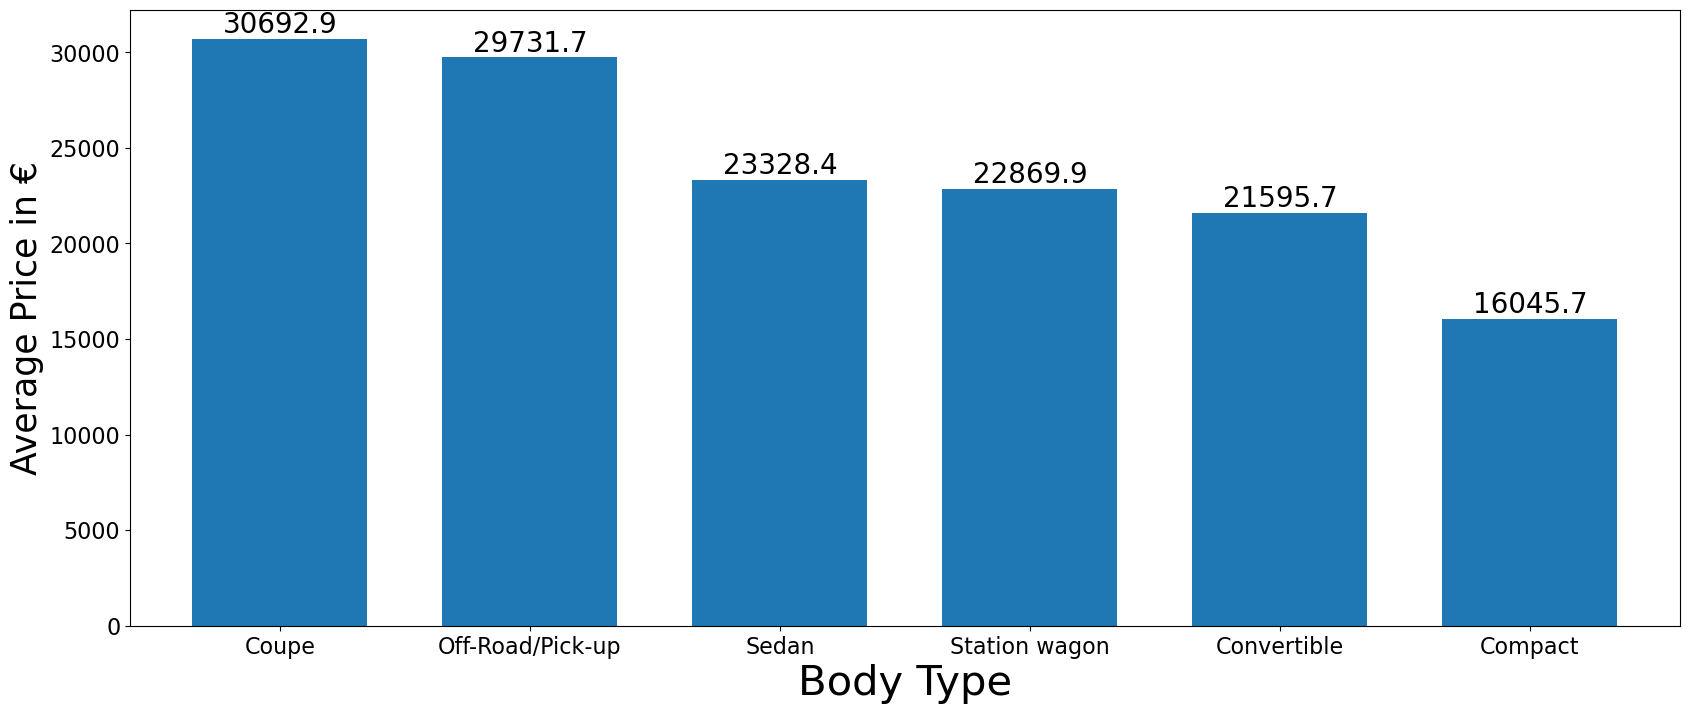

In [286]:
ax = avg_price_body.plot.bar(figsize=(20, 8), fontsize=16, width=0.7, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=0)
    
ax.set_xlabel('Body Type', fontsize=30)
ax.set_ylabel('Average Price in €', fontsize=25);

In [287]:
avg_price_make = df.groupby("make").price.mean().sort_values(ascending=False)
avg_price_make

make
Mercedes-Benz    52637.722370
Ford             30020.446242
Volvo            28387.949162
Skoda            23813.361379
Toyota           23403.801603
Nissan           21832.161387
Hyundai          19919.346250
SEAT             19330.349515
Opel             17640.257088
Renault          16988.202980
Peugeot          16819.108545
Fiat             15950.826113
Dacia            13646.310376
Name: price, dtype: float64

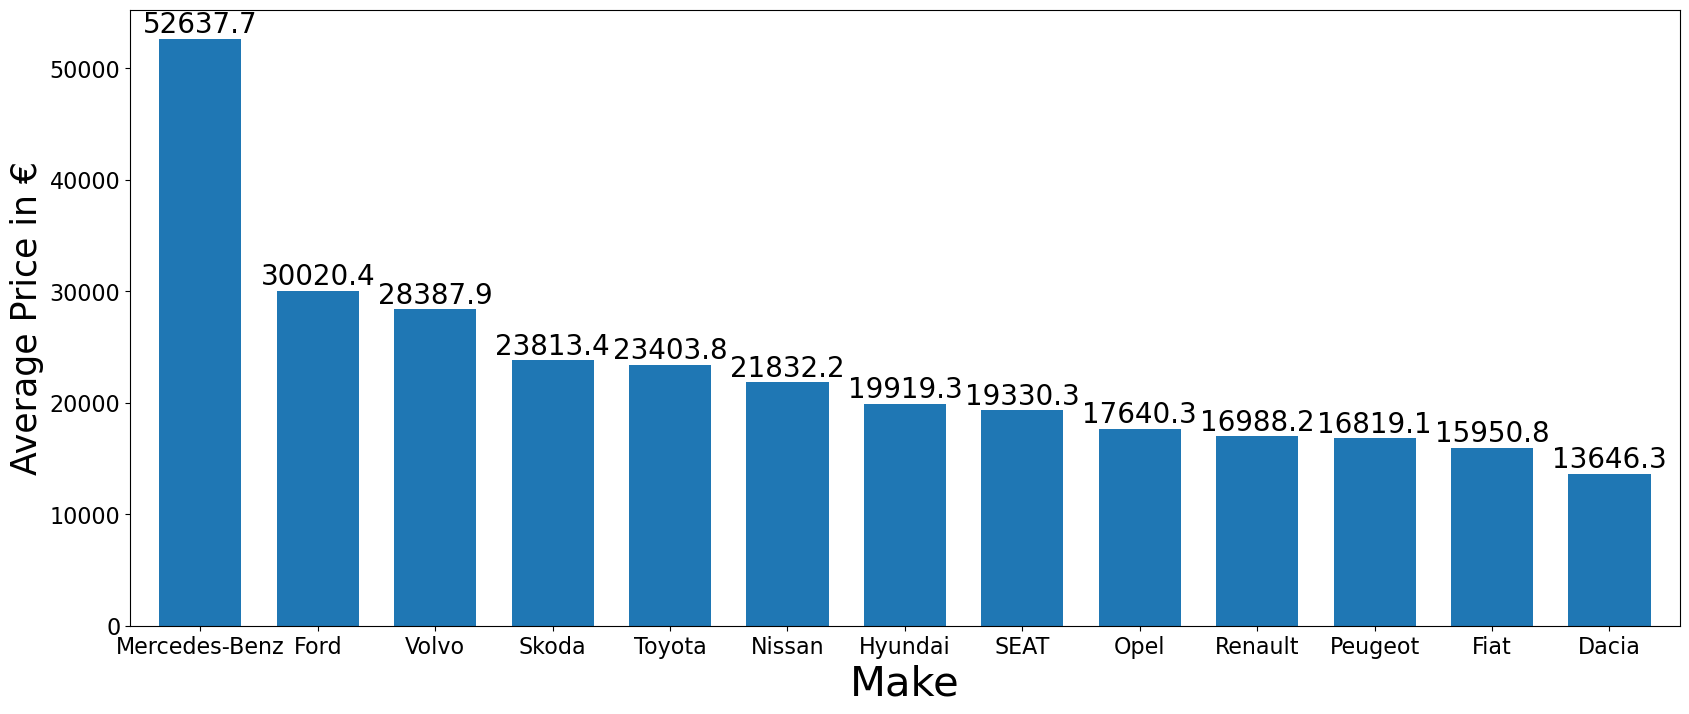

In [288]:
ax = avg_price_make.plot.bar(figsize=(20, 8), fontsize=16, width=0.7, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=0)
    
ax.set_xlabel('Make', fontsize=30)
ax.set_ylabel('Average Price in €', fontsize=25);

**What is the average price of the vehicles according to the fuel types they use?**

In [289]:
avg_price2 = df.groupby(["make_model", "fuel_type"]).price.mean()
avg_price2

make_model    fuel_type         
Dacia         Benzine               21523.000000
Dacia Break   Benzine               20500.000000
Dacia Dokker  Benzine               14114.666667
              Diesel                12489.545455
              Liquid/Natural Gas    12405.714286
                                        ...     
Volvo XC70    Benzine               26950.000000
              Diesel                20964.687500
Volvo XC90    Benzine               65273.894737
              Diesel                47670.459770
              Electric              64400.000000
Name: price, Length: 779, dtype: float64

In [290]:
avg_price_fuel_type1 = df.groupby(["body_type", "fuel_type"]).price.mean().sort_values(ascending=False)
avg_price_fuel_type1

body_type         fuel_type         
Off-Road/Pick-up  Electric              57082.150000
Station wagon     Electric              50525.235294
Sedan             Electric              45247.360544
Coupe             Benzine               33552.323583
Off-Road/Pick-up  Benzine               30140.058870
Convertible       Electric              29242.235294
Off-Road/Pick-up  Diesel                28549.073602
Compact           Electric              25350.727891
Station wagon     Benzine               23809.843437
Convertible       Benzine               23402.775344
Coupe             Electric              23225.538462
Sedan             Benzine               23128.786719
Station wagon     Diesel                22101.827586
Sedan             Diesel                21735.402490
Coupe             Diesel                18033.702586
Off-Road/Pick-up  Liquid/Natural Gas    17697.779412
Sedan             Liquid/Natural Gas    16405.270000
Compact           Benzine               16160.267829
Station w

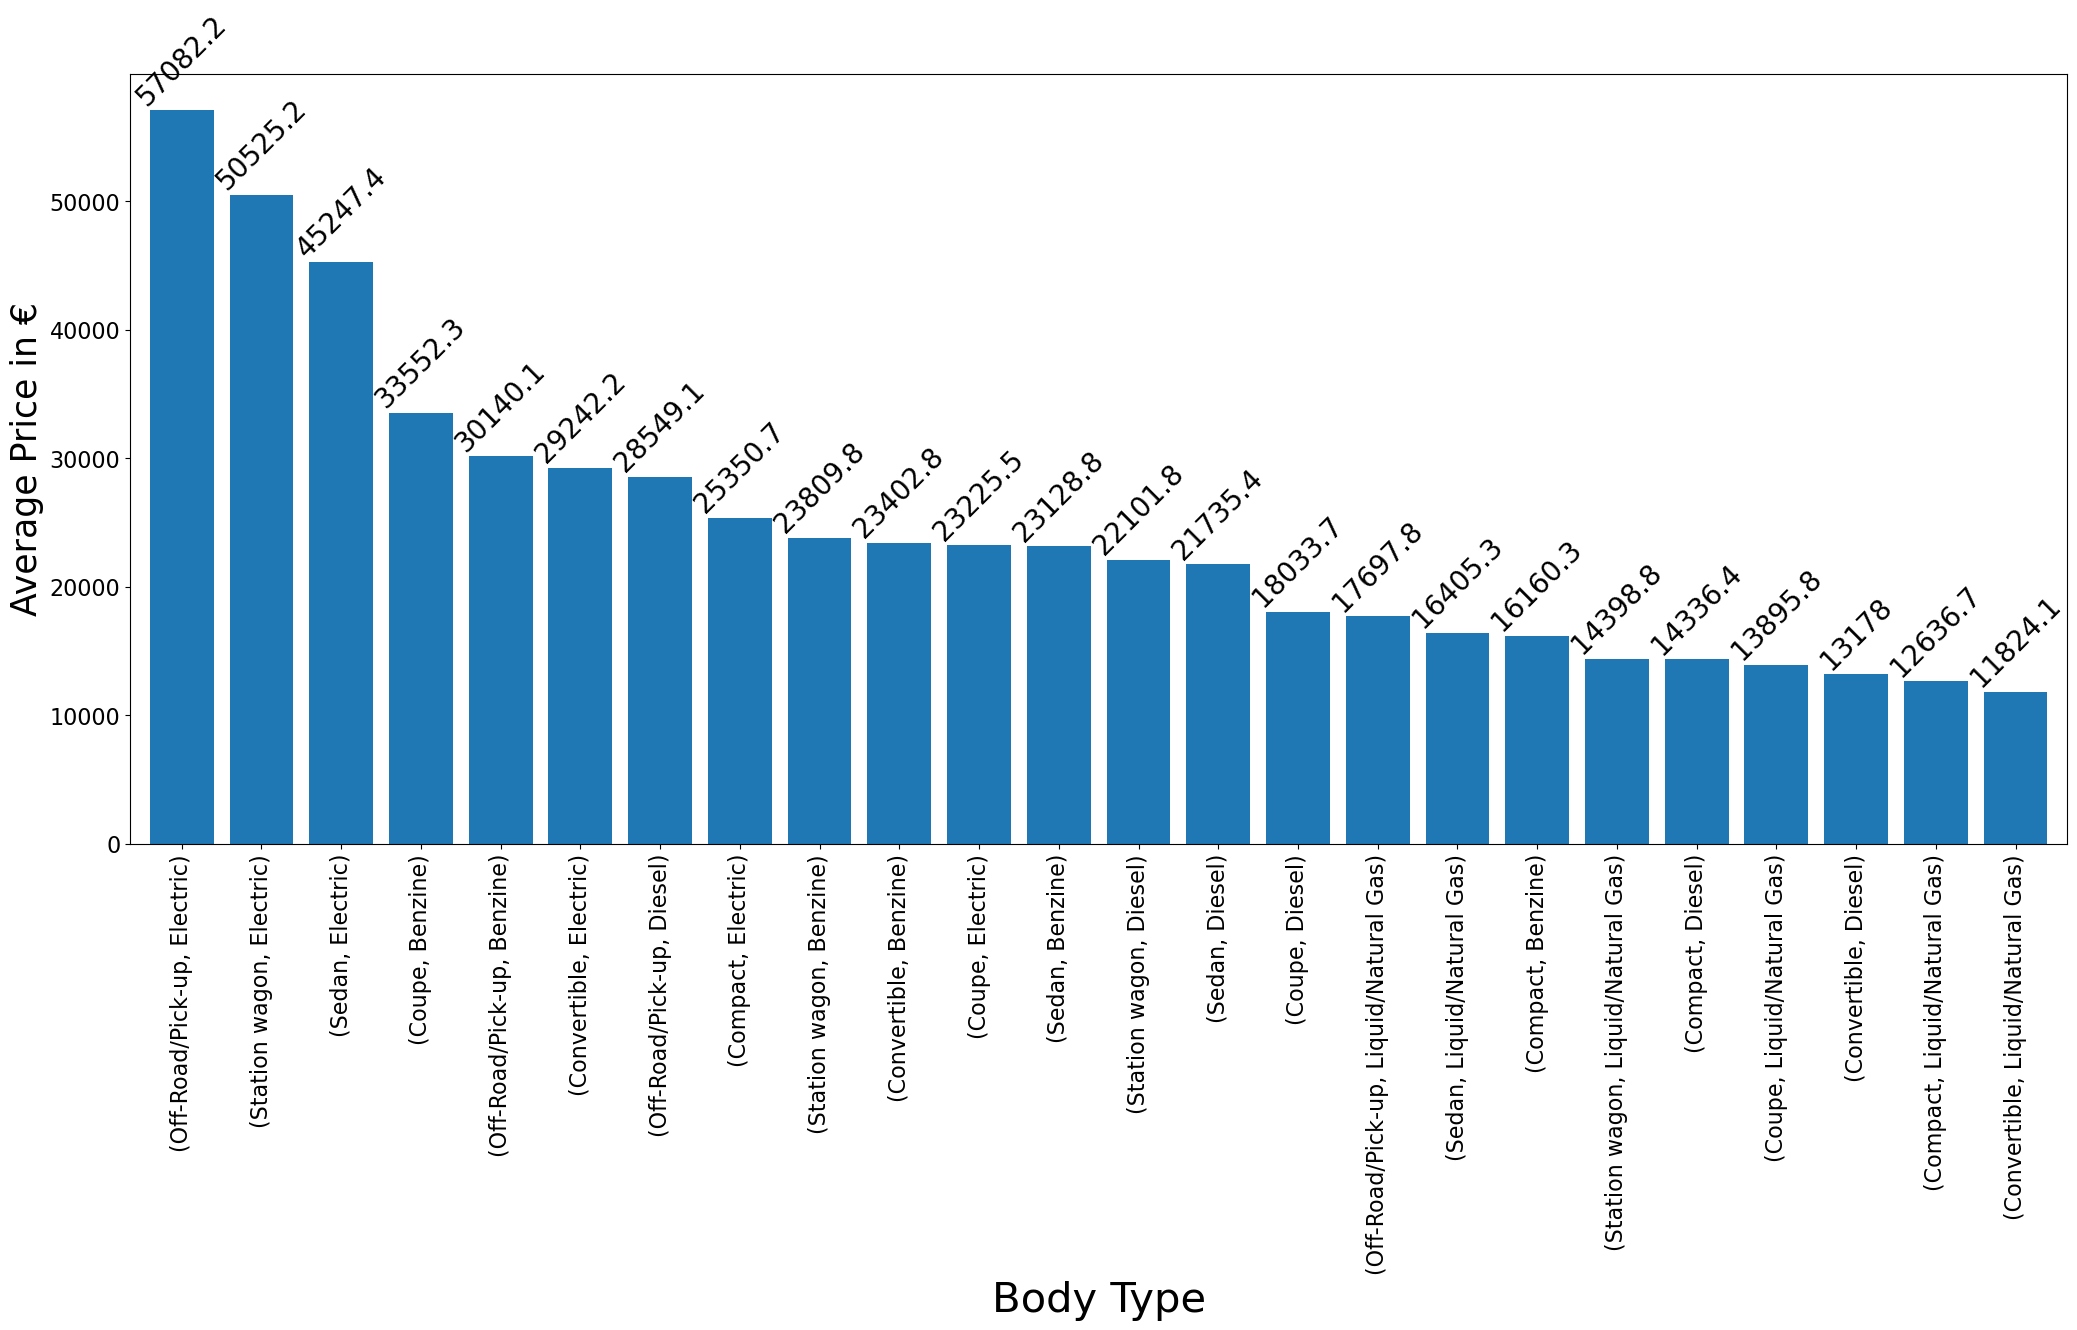

In [291]:
ax = avg_price_fuel_type1.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=45)
    
ax.set_xlabel('Body Type', fontsize=30)
ax.set_ylabel('Average Price in €', fontsize=25);

In [292]:
avg_price_fuel_type2 = df.groupby(["make", "fuel_type"]).price.mean().sort_values(ascending=False)
avg_price_fuel_type2

make           fuel_type         
Mercedes-Benz  Electric              100173.353846
Ford           Electric               62985.652174
Skoda          Electric               59448.437500
Mercedes-Benz  Benzine                59040.153160
Volvo          Electric               58150.000000
Toyota         Electric               45312.250000
Mercedes-Benz  Diesel                 39022.954009
Toyota         Liquid/Natural Gas     34738.900000
Hyundai        Electric               33688.181818
Ford           Benzine                31083.959570
               Liquid/Natural Gas     30630.000000
Volvo          Benzine                30125.517094
Peugeot        Electric               29648.562500
Fiat           Electric               28934.522388
Volvo          Diesel                 27282.867850
Opel           Electric               26750.000000
Skoda          Diesel                 25306.798951
Ford           Diesel                 25063.914807
Nissan         Benzine                24427.9899

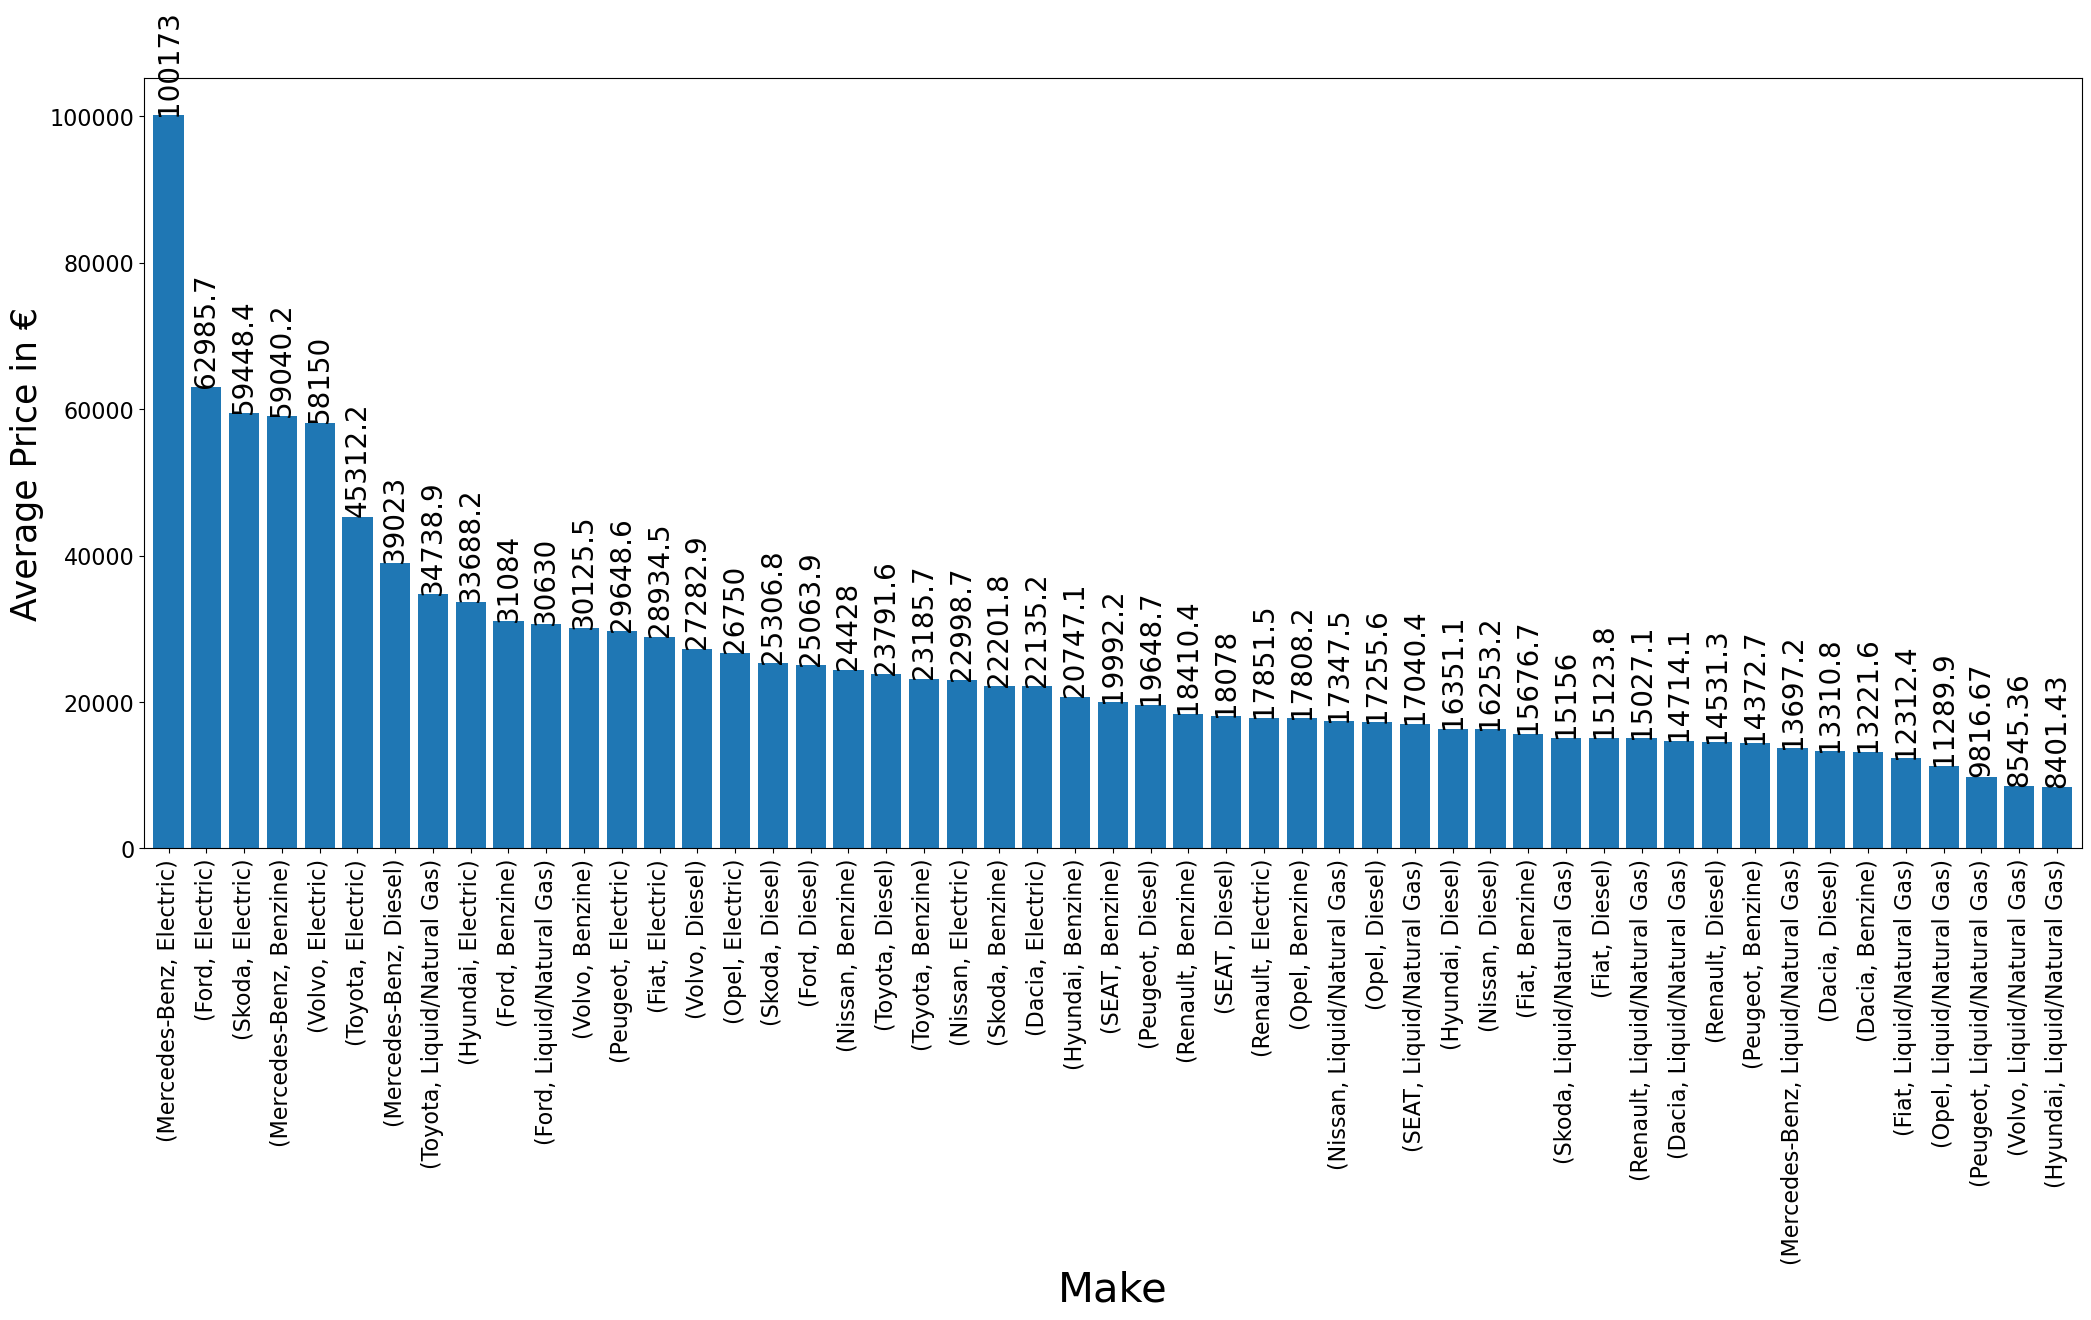

In [293]:
ax = avg_price_fuel_type2.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30)
ax.set_ylabel('Average Price in €', fontsize=25);

**Which make & model has the highest number of vehicles for sale?**

In [294]:
df["make_model"].value_counts().nlargest(1)

make_model
Renault Megane    810
Name: count, dtype: int64

**Let's see the value counts of each make_model in order from largest to smallest and in dataframe form:**

In [296]:
num_sale = df["make_model"].value_counts()
num_sale_df = pd.DataFrame(num_sale).rename(columns={"count": "No of Sales"})
num_sale_df

No of Sales
make_model                           
Renault Megane                    810
SEAT Leon                         733
Opel Astra                        627
Hyundai i30                       557
Ford Mustang                      544
...                               ...
Mercedes-Benz 170                   1
Mercedes-Benz GLS 63 AMG            1
Mercedes-Benz CLS 320               1
Mercedes-Benz GL 320                1
Mercedes-Benz EQE 500               1

[503 rows x 1 columns]

**Let us test the PARETO RULE:**

In [301]:
num_sale /= num_sale.sum()/100
category_classes = pd.qcut(num_sale, q=[0, .20, 0.80, 1.], 
                 labels=['Bottom 20%', 'Mid 60%', 'Top 20%'])
prob_groups = num_sale.groupby(category_classes).sum().sort_values(ascending=False)

display(prob_groups)
display(category_classes)

C:\Users\49179\AppData\Local\Temp\ipykernel_43876\821963.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_groups = num_sale.groupby(category_classes).sum().sort_values(ascending=False)


count
Top 20%       81.765138
Mid 60%       17.456887
Bottom 20%     0.777975
Name: count, dtype: float64

make_model
Renault Megane                 Top 20%
SEAT Leon                      Top 20%
Opel Astra                     Top 20%
Hyundai i30                    Top 20%
Ford Mustang                   Top 20%
                               ...    
Mercedes-Benz 170           Bottom 20%
Mercedes-Benz GLS 63 AMG    Bottom 20%
Mercedes-Benz CLS 320       Bottom 20%
Mercedes-Benz GL 320        Bottom 20%
Mercedes-Benz EQE 500       Bottom 20%
Name: count, Length: 503, dtype: category
Categories (3, object): ['Bottom 20%' < 'Mid 60%' < 'Top 20%']

In [310]:
PARETO_category = pd.DataFrame(category_classes).rename(columns={"count": "PARETO_category"})
PARETO_Rule = pd.merge(num_sale_df, PARETO_category, left_index=True, right_index=True).reset_index()\
                                            .rename(columns={"index": "make_model"})

PARETO_Rule


make_model  No of Sales PARETO_category
0              Renault Megane          810         Top 20%
1                   SEAT Leon          733         Top 20%
2                  Opel Astra          627         Top 20%
3                 Hyundai i30          557         Top 20%
4                Ford Mustang          544         Top 20%
..                        ...          ...             ...
498         Mercedes-Benz 170            1      Bottom 20%
499  Mercedes-Benz GLS 63 AMG            1      Bottom 20%
500     Mercedes-Benz CLS 320            1      Bottom 20%
501      Mercedes-Benz GL 320            1      Bottom 20%
502     Mercedes-Benz EQE 500            1      Bottom 20%

[503 rows x 3 columns]

In [312]:
top20 = PARETO_Rule[PARETO_Rule["PARETO_category"] == "Top 20%"]

0          1           2            3    \
make_model       Renault Megane  SEAT Leon  Opel Astra  Hyundai i30   
No of Sales                 810        733         627          557   
PARETO_category         Top 20%    Top 20%     Top 20%      Top 20%   

                          4            5              6           7    \
make_model       Ford Mustang  Peugeot 308  Dacia Sandero  Ford Focus   
No of Sales               544          504            480         478   
PARETO_category       Top 20%      Top 20%        Top 20%     Top 20%   

                        8               9    ...          91            92   \
make_model       SEAT Ibiza  Nissan Qashqai  ...  Hyundai i40  Toyota Supra   
No of Sales             425             424  ...           64            61   
PARETO_category     Top 20%         Top 20%  ...      Top 20%       Top 20%   

                                 93              94         95   \
make_model       Mercedes-Benz E 220  Renault Arkana  Fiat 500L   
No of Sales                       61              60         60   
PARETO_category              Top 20%         Top 20%    Top 20%   

                              96             97                   98   \
make_model       Hyundai VELOSTER  Toyota Aygo X  Mercedes-Benz C 300   
No of Sales                    59             59                   59   
PARETO_category           Top 20%        Top 20%              Top 20%   

                     99           100  
make_model       Opel GT  Nissan Leaf  
No of Sales           59           59  
PARETO_category  Top 20%      Top 20%  

[3 rows x 101 columns]

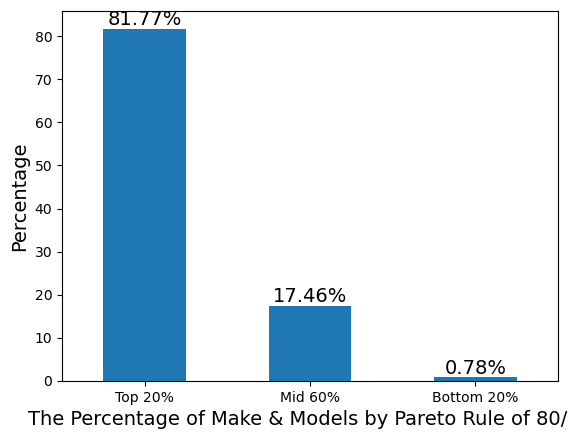

In [313]:
ax = prob_groups.plot(kind='bar')

display(top20.T)

for container in ax.containers:
    ax.bar_label(container, fontsize=14, rotation=0, fmt='%.2f%%')
    
ax.set_xlabel('The Percentage of Make & Models by Pareto Rule of 80/20', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

plt.xticks(rotation=0)
plt.show()

**Which vehicle make & models has the lowest average fuel consumption by body_type and What are their fuel_types?**

In [314]:
# Minimum Fuel Consumption of Vehicles by body_type & make_model

cons_avg = df.groupby(["make_model", "body_type", "fuel_type"]).cons_avg.min()
cons_avg

make_model    body_type         fuel_type
Dacia         Compact           Benzine      5.600
              Station wagon     Benzine      5.600
Dacia Break   Station wagon     Benzine      5.300
Dacia Dokker  Compact           Diesel       4.200
              Off-Road/Pick-up  Benzine      6.300
                                             ...  
Volvo XC90    Off-Road/Pick-up  Benzine      1.200
                                Diesel       1.500
                                Electric     2.247
              Sedan             Diesel       6.700
              Station wagon     Diesel       5.700
Name: cons_avg, Length: 1543, dtype: float64

In [315]:
avg_price_fuel_type = df.groupby(["make", "fuel_type"]).price.mean().sort_values(ascending=False)
avg_price_fuel_type

make           fuel_type         
Mercedes-Benz  Electric              100173.353846
Ford           Electric               62985.652174
Skoda          Electric               59448.437500
Mercedes-Benz  Benzine                59040.153160
Volvo          Electric               58150.000000
Toyota         Electric               45312.250000
Mercedes-Benz  Diesel                 39022.954009
Toyota         Liquid/Natural Gas     34738.900000
Hyundai        Electric               33688.181818
Ford           Benzine                31083.959570
               Liquid/Natural Gas     30630.000000
Volvo          Benzine                30125.517094
Peugeot        Electric               29648.562500
Fiat           Electric               28934.522388
Volvo          Diesel                 27282.867850
Opel           Electric               26750.000000
Skoda          Diesel                 25306.798951
Ford           Diesel                 25063.914807
Nissan         Benzine                24427.9899

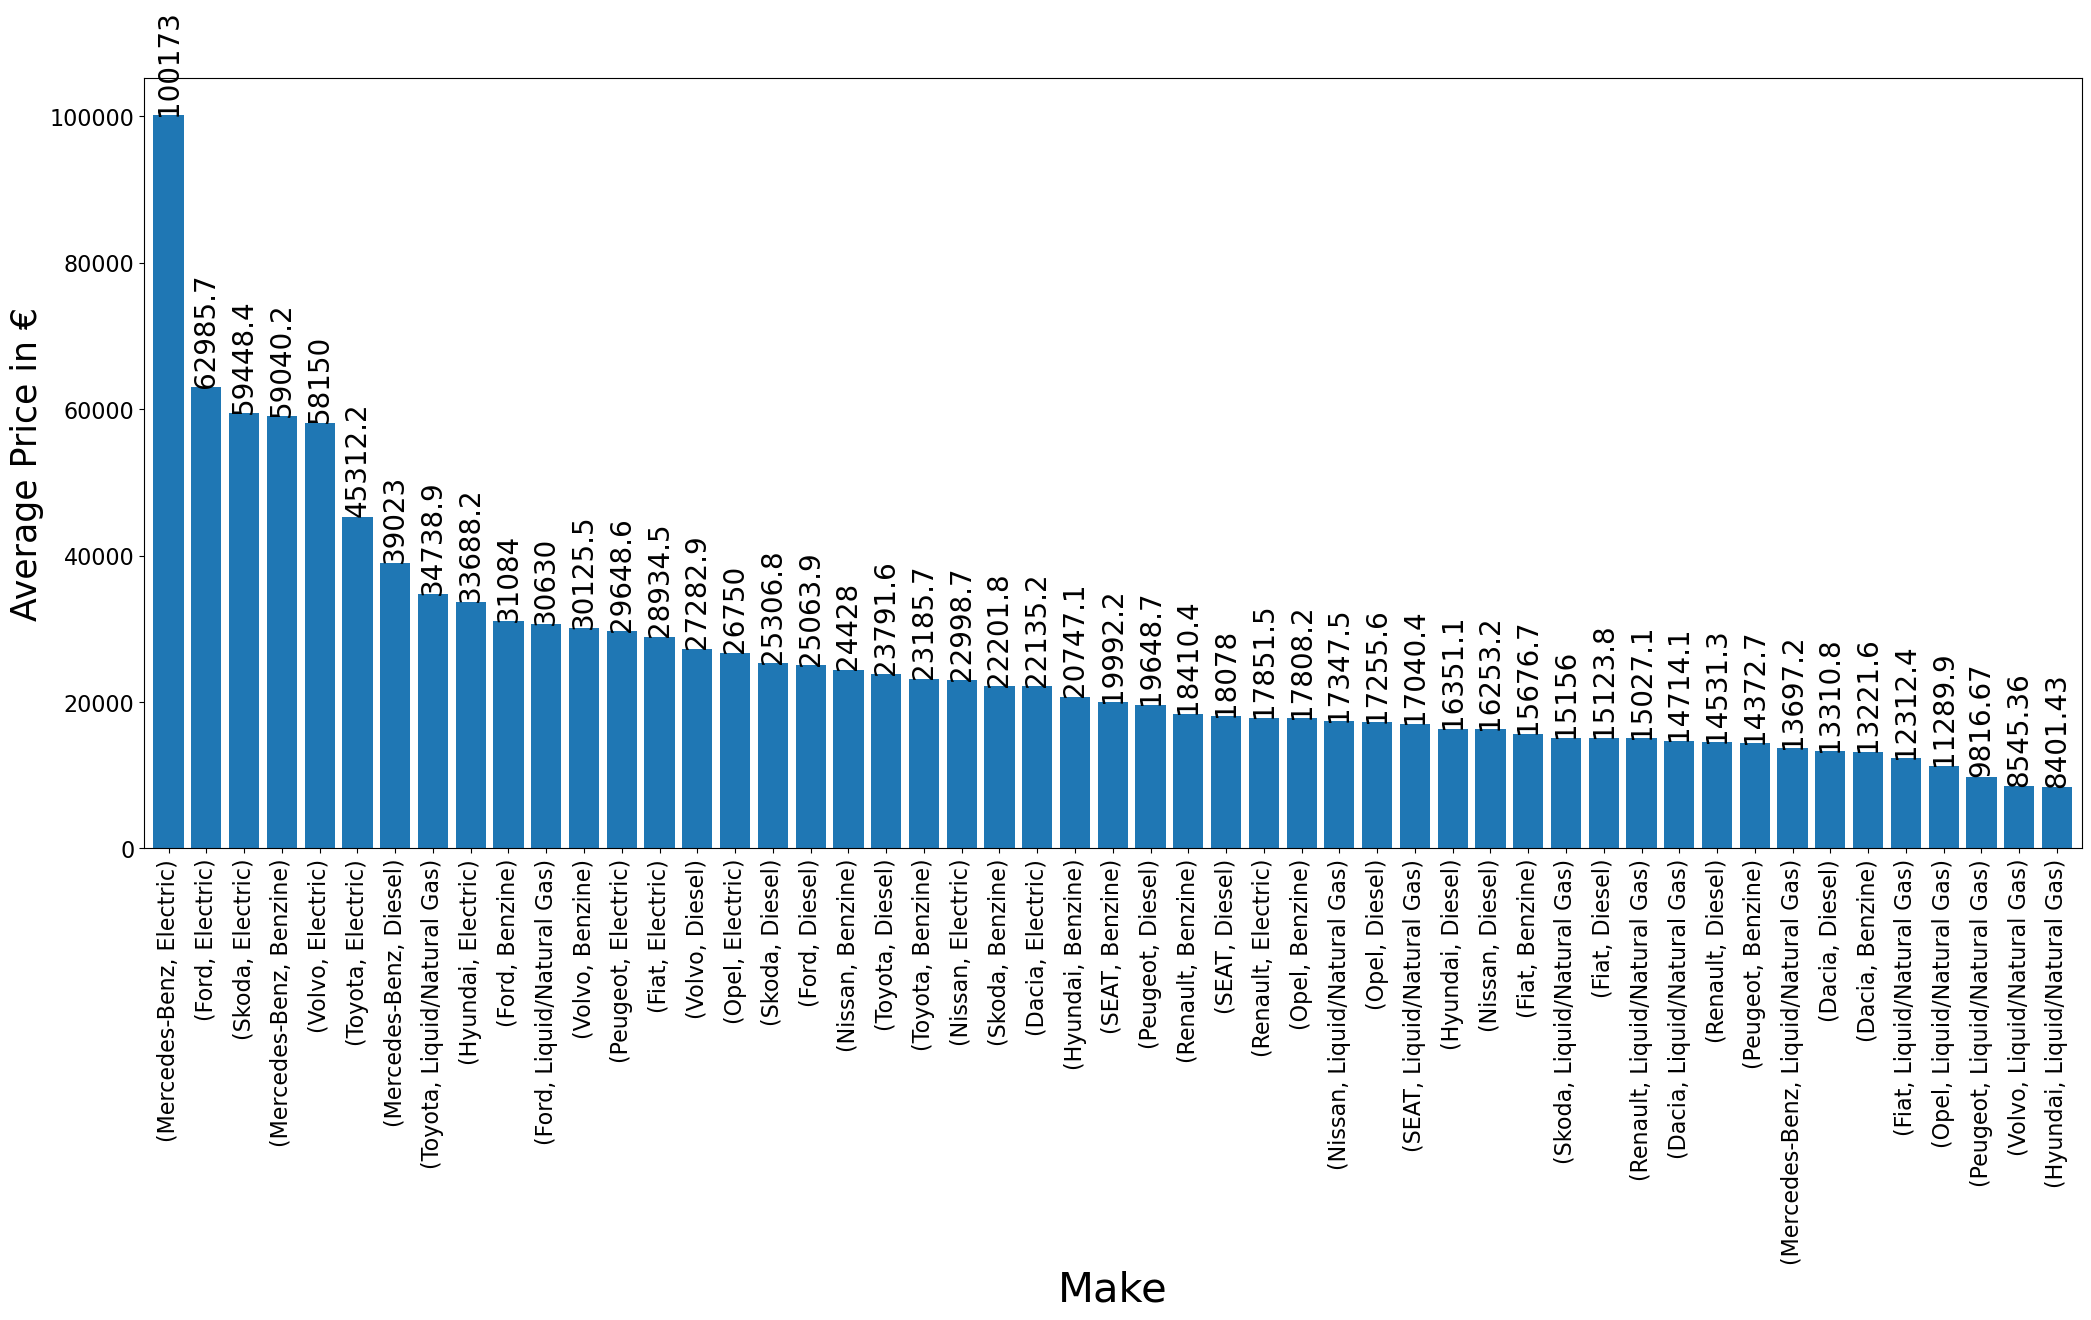

In [316]:
ax = avg_price_fuel_type.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Average Price in €', fontsize=25);

In [317]:
avg_fuel_cons = df.groupby(["make", "fuel_type"]).cons_avg.mean().sort_values(ascending=True)
avg_fuel_cons

make           fuel_type         
Toyota         Liquid/Natural Gas     1.700000
Nissan         Electric               2.247000
Skoda          Electric               2.247000
Renault        Electric               2.247000
Opel           Electric               2.247000
Volvo          Electric               2.247000
Mercedes-Benz  Electric               2.247000
Hyundai        Electric               2.247000
Ford           Electric               2.247000
Peugeot        Electric               2.247000
Toyota         Electric               2.247000
Dacia          Electric               2.247000
Fiat           Electric               2.247000
Skoda          Liquid/Natural Gas     3.940000
SEAT           Liquid/Natural Gas     4.076667
Dacia          Diesel                 4.202976
Fiat           Diesel                 4.238839
Peugeot        Diesel                 4.245049
SEAT           Diesel                 4.433991
Renault        Diesel                 4.480499
Skoda          Diesel     

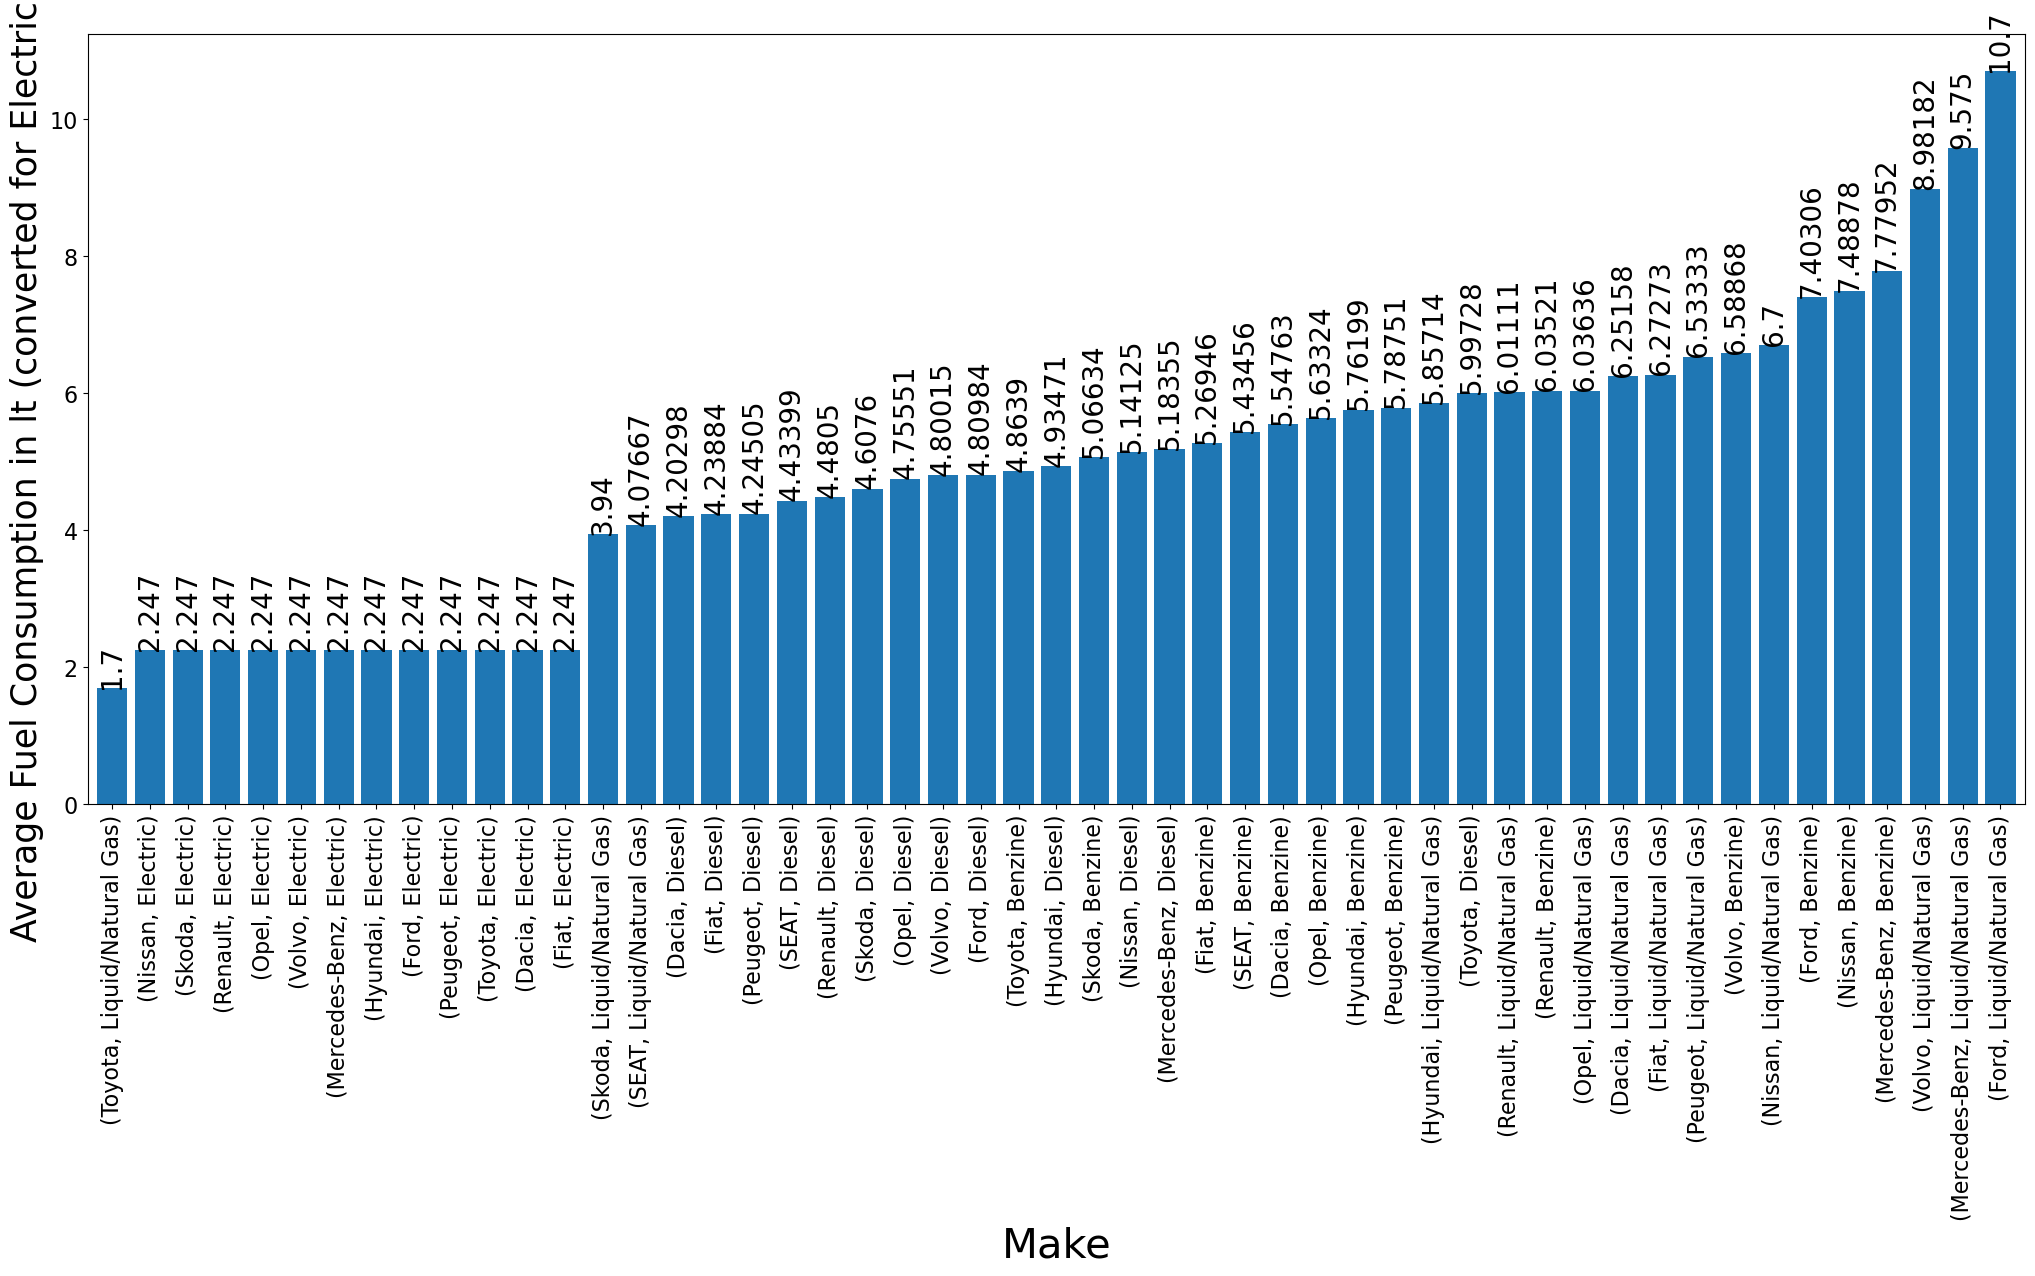

In [318]:
ax = avg_fuel_cons.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Average Fuel Consumption in lt (converted for Electric Cars)', fontsize=25);

**What are the lowest and highest sales prices of the vehicles according to the make & model? And find the selling price difference for each make & model group. Which vehicle group has the biggest price difference?**

In [320]:
df.groupby(["make_model"]).price.min()

make_model
Dacia                      19515.0
Dacia Break                20500.0
Dacia Dokker                3890.0
Dacia Duster                4800.0
Dacia Jogger               18160.0
                            ...   
Volvo V90 Cross Country    28190.0
Volvo XC40                 25480.0
Volvo XC60                  9990.0
Volvo XC70                  8750.0
Volvo XC90                  6400.0
Name: price, Length: 503, dtype: float64

In [321]:
df.groupby(["make_model"]).price.max()

make_model
Dacia                      22479.0
Dacia Break                20500.0
Dacia Dokker               19997.0
Dacia Duster               29950.0
Dacia Jogger               26298.0
                            ...   
Volvo V90 Cross Country    71850.0
Volvo XC40                 68990.0
Volvo XC60                 83890.0
Volvo XC70                 29990.0
Volvo XC90                 97450.0
Name: price, Length: 503, dtype: float64

In [322]:
min_max_price = df.groupby(["make"]).agg({'price': ['max', 'min']}).sort_values(by=("price", 'max'), ascending=False)
min_max_price

price        
                    max     min
make                           
Ford           549000.0  1075.0
Mercedes-Benz  375900.0  1790.0
Nissan         237500.0  1000.0
Volvo           97450.0  1600.0
Renault         81980.0   490.0
Toyota          80490.0  1200.0
Hyundai         75991.0   700.0
Skoda           74490.0  1400.0
Peugeot         64290.0   790.0
Opel            59990.0   800.0
SEAT            51990.0   999.0
Fiat            41570.0  1199.0
Dacia           29950.0  1490.0

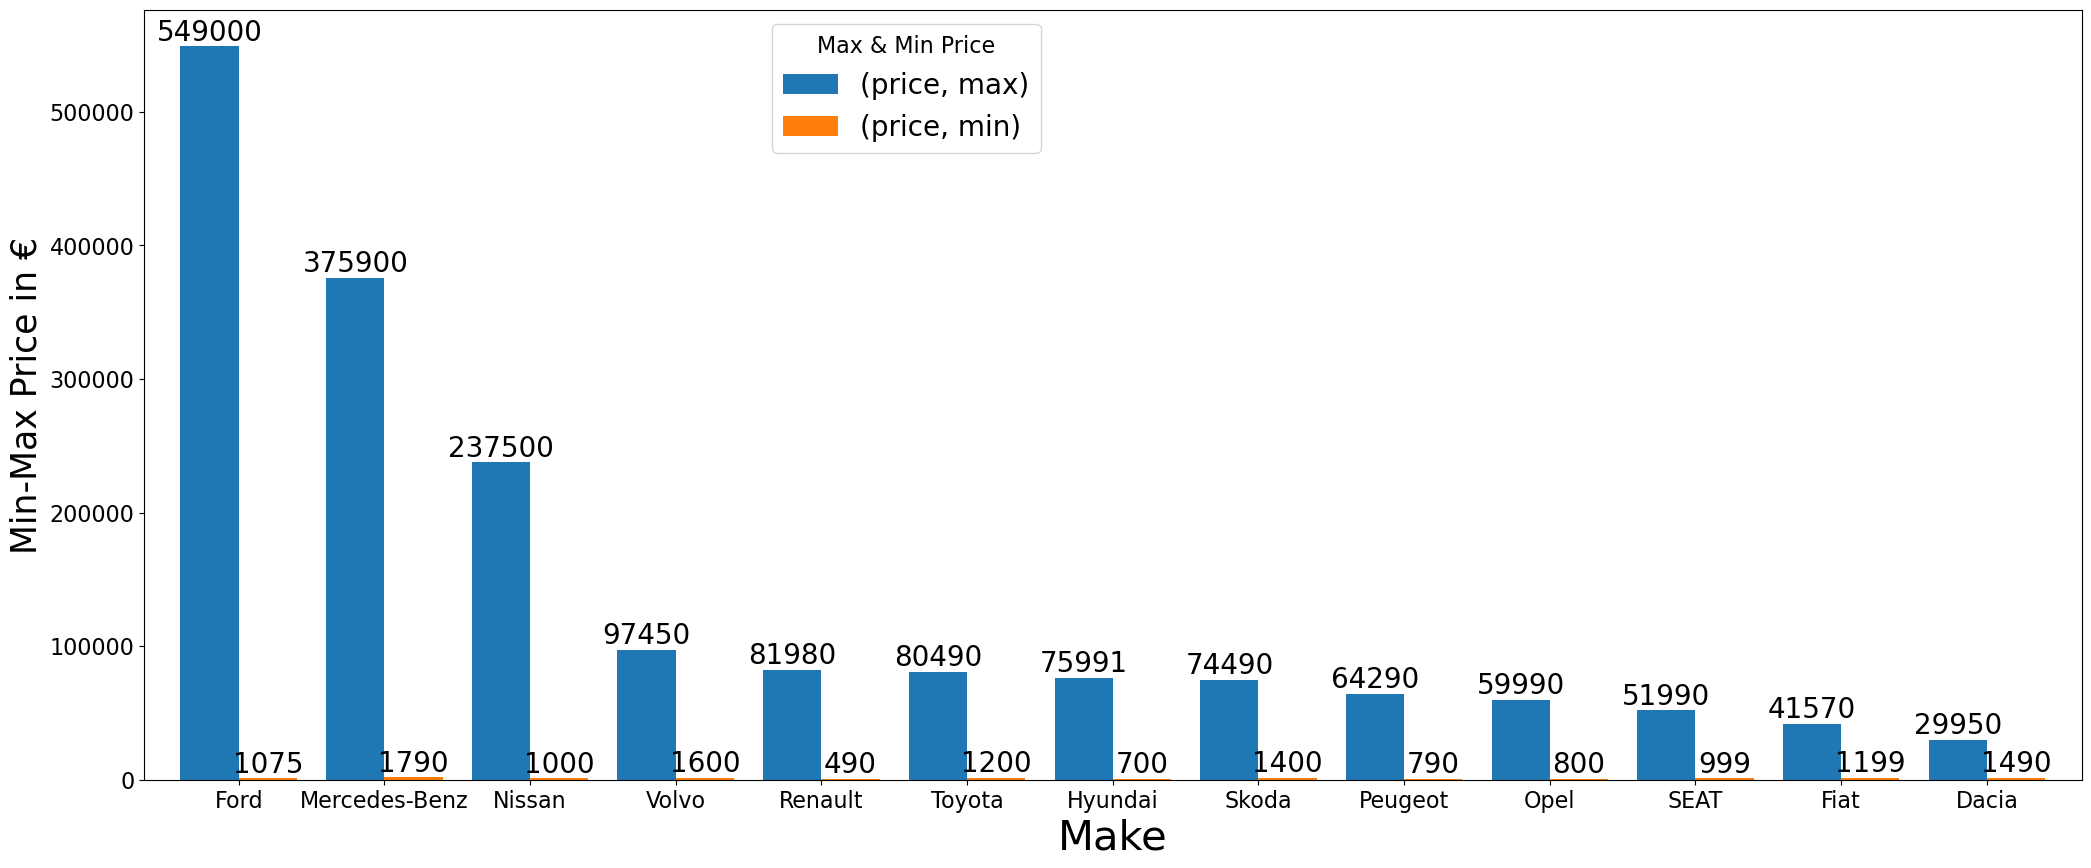

In [323]:
ax = min_max_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=0)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

**Lets also see the Price differences for each Make & Model in the plot:**

In [324]:
min_max_price.columns

MultiIndex([('price', 'max'),
            ('price', 'min')],
           )

In [325]:
min_max_price['price', 'difference'] = min_max_price['price', 'max'] - min_max_price['price', 'min']
min_max_price.sort_values(by=('price', 'difference'), ascending=False)

price                   
                    max     min difference
make                                      
Ford           549000.0  1075.0   547925.0
Mercedes-Benz  375900.0  1790.0   374110.0
Nissan         237500.0  1000.0   236500.0
Volvo           97450.0  1600.0    95850.0
Renault         81980.0   490.0    81490.0
Toyota          80490.0  1200.0    79290.0
Hyundai         75991.0   700.0    75291.0
Skoda           74490.0  1400.0    73090.0
Peugeot         64290.0   790.0    63500.0
Opel            59990.0   800.0    59190.0
SEAT            51990.0   999.0    50991.0
Fiat            41570.0  1199.0    40371.0
Dacia           29950.0  1490.0    28460.0

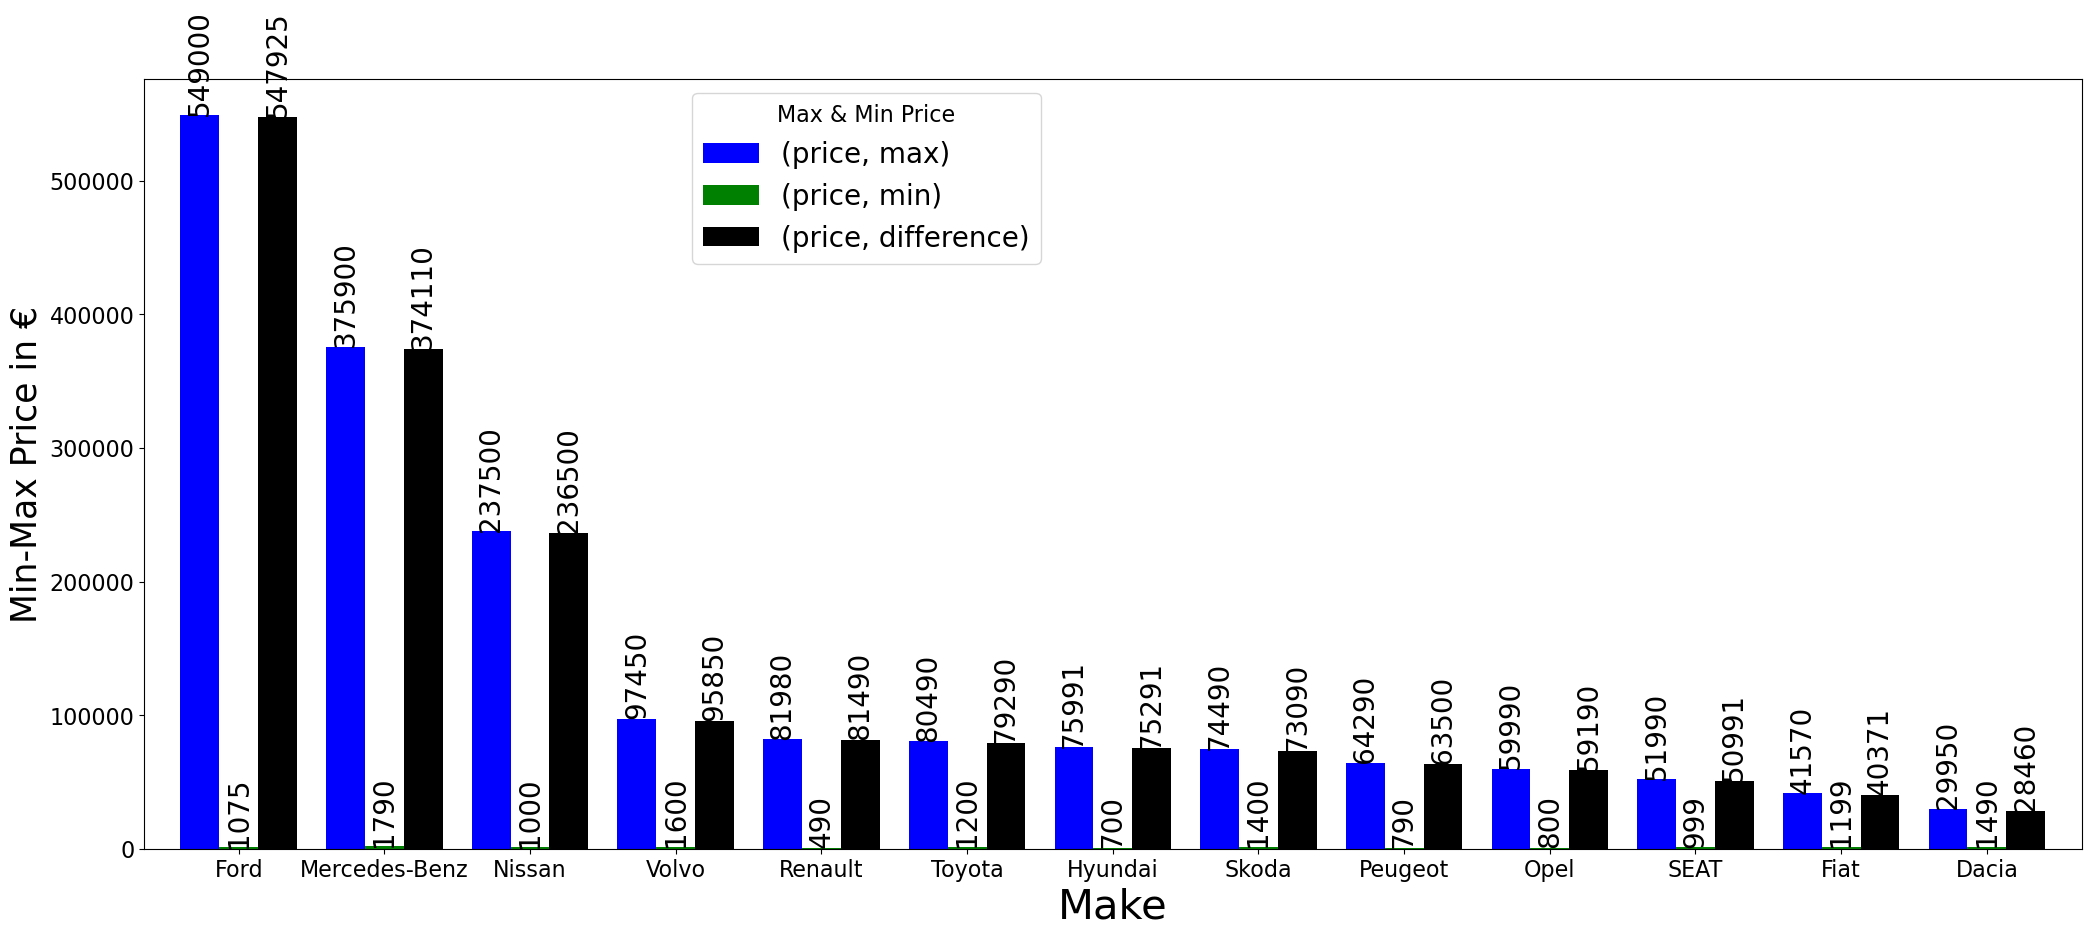

In [326]:
from itertools import cycle, islice

# Make a list by cycling through the colors we care about to match the length of our data.
my_colors = list(islice(cycle(['b', 'g', 'k']), None, len(min_max_price)))

ax = min_max_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0, color=my_colors)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

**What are the average, minimum and maximum selling prices of vehicles by body_type?**

In [327]:
df.groupby(['make_model', 'body_type']).agg({'price': ['mean', 'min', 'max']})

price                  
                                       mean      min      max
make_model   body_type                                       
Dacia        Compact           21431.000000  19515.0  22479.0
             Station wagon     21799.000000  21799.0  21799.0
Dacia Break  Station wagon     20500.000000  20500.0  20500.0
Dacia Dokker Compact           11930.000000  11930.0  11930.0
             Off-Road/Pick-up  12490.000000  12490.0  12490.0
...                                     ...      ...      ...
Volvo XC70   Station wagon     21905.666667   8750.0  29990.0
Volvo XC90   Coupe             49900.000000  49900.0  49900.0
             Off-Road/Pick-up  51187.465347   6400.0  97450.0
             Sedan             60366.666667  47700.0  84900.0
             Station wagon     32750.000000  29500.0  36000.0

[1073 rows x 3 columns]

In [328]:
min_max_avg_price = df.groupby(['body_type']).agg({'price': ['max', 'min', 'mean']}).sort_values(by=('price', 'max'), ascending=False)
min_max_avg_price

price                      
                       max     min          mean
body_type                                       
Coupe             549000.0   490.0  30692.872110
Off-Road/Pick-up  375900.0  3295.0  29731.707436
Convertible       283900.0   699.0  21595.664733
Sedan             188008.0   999.0  23328.398758
Compact           184900.0   950.0  16045.698100
Station wagon     177879.0   790.0  22869.853175

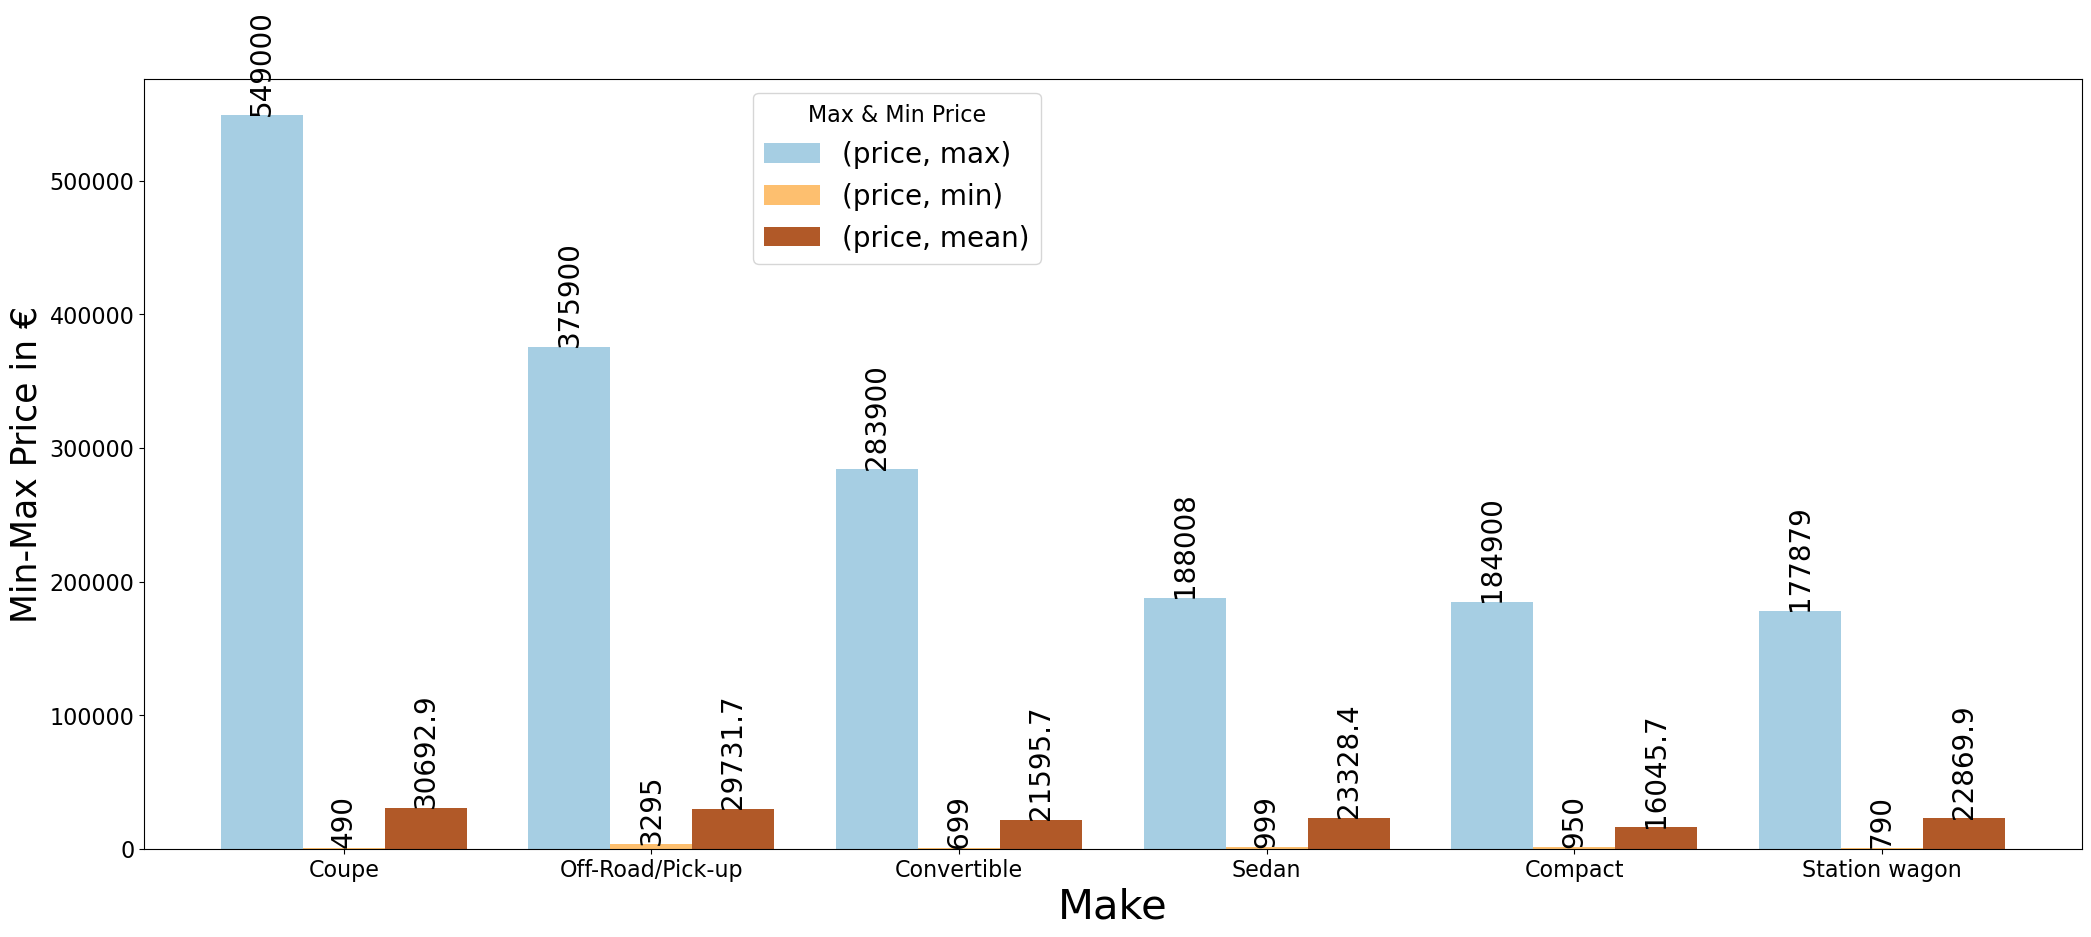

In [329]:
ax = min_max_avg_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0, colormap='Paired')

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

# An Analysis of Inferential Statistics/Hypothesis Testing on Some Specific Features

In [330]:
df0.select_dtypes(exclude=["number","bool_"]).head(5)

make_model           make body_type            type warranty  \
0     Mercedes-Benz A 160  Mercedes-Benz   Compact            Used      Yes   
1   Mercedes-Benz EQE 350  Mercedes-Benz   Compact  Pre-registered      Yes   
2  Mercedes-Benz A 45 AMG  Mercedes-Benz   Compact            Used      Yes   
3  Mercedes-Benz A 35 AMG  Mercedes-Benz   Compact            Used      Yes   
4  Mercedes-Benz A 45 AMG  Mercedes-Benz   Compact            Used      Yes   

     gearbox fuel_type  seller drivetrain  \
0     Manual    Diesel  Dealer      Front   
1  Automatic  Electric  Dealer        4WD   
2  Automatic   Benzine  Dealer        4WD   
3  Automatic   Benzine  Dealer        4WD   
4  Automatic    Diesel  Dealer        4WD   

                                              extras full_service_history  \
0                                       Alloy wheels                   No   
1  Alloy wheels (21"), Shift paddles, Sport packa...                   No   
2                                       Alloy wheels                   No   
3                                        Sport seats                   No   
4                                       Alloy wheels                   No   

  non_smoker_vehicle         upholstery energy_efficiency_class  \
0                 No              Cloth               efficient   
1                 No  Part/Full Leather               efficient   
2                 No  Part/Full Leather             unefficient   
3                 No  Part/Full Leather             unefficient   
4                 No  Part/Full Leather             unefficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                       Premium                          Plus   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1       Safety Premium Package  
2  Safety Premium Plus Package  
3       Safety Premium Package  
4  Safety Premium Plus Package

**As seen above, there are many categorical features in the dataset. I will use some of these features and check whether one feature effect affects other features using several tests like ANOVA test, Z-Test, correlation test, and Chi-square test.**

**ANOVA:**

In the below example, I am going to try to measure if there is any correlation between fuel types on car prices. Here fuel_type is a categorical predictor and "price" is the numeric target variable.

In [331]:
from scipy.stats import f_oneway
# Running the one-way anova test between price and fuel_type
# Assumption(H0) is that fuel_type and price are NOT correlated
# H0: μ1 = μ2 = μ3 ... = μk (Means are all equal)

print(f"Null Hypothesis: There is NO significant difference between the mean price among different groups of dependents.")
print(f"Alternate  Hypothesis: There is significant difference between the mean price among different groups of dependents.")
print("*"*120)
 # Finds out the price for each fuel_type as a list
CategoryGroupLists = df0.groupby('fuel_type')['price'].apply(list)

# Performing the ANOVA test
# We accept/fail to reject the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)

print('F-Value for Anova is: ', AnovaResults[0], '\nP-Value for Anova is: ', AnovaResults[1])
print("*"*45)

# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")     


Null Hypothesis: There is NO significant difference between the mean price among different groups of dependents.
Alternate  Hypothesis: There is significant difference between the mean price among different groups of dependents.
************************************************************************************************************************
F-Value for Anova is:  97.72203200189021 
P-Value for Anova is:  6.285388473498683e-63
*********************************************
Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.
CONCLUSION:
There is a statistically significant difference between the groups and their effects on price F=97.72203200189021, p-value=6.285388473498683e-63


In [332]:
AnovaResults

F_onewayResult(statistic=97.72203200189021, pvalue=6.285388473498683e-63)

**The Null hypothesis in the ANOVA test is; Ho: Two variables are NOT correlated.
Hence, if the p-value comes as 0, we will reject H0 and say the variables are correlated with each other.**

**As the output of the P-value is almost zero, we reject H0. Which means the variables are correlated with each other.**

Now in the below example, this time I am going to try to measure if there is any correlation between fuel types on car prices. Here body_type is a categorical predictor and "price" is the numeric target variable.

In [333]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between price and body_type
# Assumption(H0) is that body_type and price are NOT correlated
# H0: μ1 = μ2 = μ3 ... = μk (Means are all equal)

print(f"Null Hypothesis: There is NO significant difference between the mean price among different groups of dependents.")
print(f"Alternate  Hypothesis: There is significant difference between the mean price among different groups of dependents.")
print("*"*120)
 
# Finds out the price for each fuel_type as a list
CategoryGroupLists = df0.groupby('body_type')['price'].apply(list)
 
# Performing the ANOVA test
# We accept/fail to reject the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('F-Value for Anova is: ', AnovaResults[0], '\nP-Value for Anova is: ', AnovaResults[1])
print("*"*45)

# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")     


Null Hypothesis: There is NO significant difference between the mean price among different groups of dependents.
Alternate  Hypothesis: There is significant difference between the mean price among different groups of dependents.
************************************************************************************************************************
F-Value for Anova is:  253.62130822126625 
P-Value for Anova is:  4.091167952928636e-266
*********************************************
Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.
CONCLUSION:
There is a statistically significant difference between the groups and their effects on price F=253.62130822126625, p-value=4.091167952928636e-266


**Here is also the output of the P-value is almost zero, therefore we reject H0. Which means the variables are correlated with each other.**

In [334]:
df0['make'].unique()

array(['Mercedes-Benz', 'Opel', 'Renault', 'Peugeot', 'Fiat', 'SEAT',
       'Skoda', 'Dacia', 'Toyota', 'Nissan', 'Ford', 'Hyundai', 'Volvo'],
      dtype=object)

In [335]:
from scipy.stats import f_oneway

# derive the groups (i.e. types of makes)
groups = pd.unique(df0.make.values)

# Create a dictionary to hold respective price of the types of make groups
statData = {grp: df0['price'][df0['make'] == grp] for grp in groups}
F, p = stats.f_oneway(statData['Mercedes-Benz'], statData['Opel'], statData['Volvo'])

print('F-Value for Anova is: ', F, '\nP-Value for Anova is: ', p)
print("*"*45)

# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price F={F}, p-value={p}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price F={F}, p-value={p}")     


F-Value for Anova is:  871.4043839940206 
P-Value for Anova is:  0.0
*********************************************
Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.
CONCLUSION:
There is a statistically significant difference between the groups and their effects on price F=871.4043839940206, p-value=0.0


**The null hypothesis is rejected, with a p-value less than 0.05. There is a significant difference between the price of the analyzed groups of make.**

**z-test & t-test**

In [336]:
df0.make.unique()

array(['Mercedes-Benz', 'Opel', 'Renault', 'Peugeot', 'Fiat', 'SEAT',
       'Skoda', 'Dacia', 'Toyota', 'Nissan', 'Ford', 'Hyundai', 'Volvo'],
      dtype=object)

In [337]:
Mercedes_mean = df0.loc[df0['make'] == 'Mercedes-Benz', 'price'].mean()
Opel_mean = df0.loc[df0['make'] == 'Opel', 'price'].mean()
Renault_mean = df0.loc[df0['make'] == 'Renault', 'price'].mean()
Peugeot_mean = df0.loc[df0['make'] == 'Peugeot', 'price'].mean()
Fiat_mean = df0.loc[df0['make'] == 'Fiat', 'price'].mean()
SEAT_mean = df0.loc[df0['make'] == 'SEAT', 'price'].mean()
Skoda_mean = df0.loc[df0['make'] == 'Skoda', 'price'].mean()
Dacia_mean = df0.loc[df0['make'] == 'Dacia', 'price'].mean()
Toyota_mean = df0.loc[df0['make'] == 'Toyota', 'price'].mean()
Nissan_mean = df0.loc[df0['make'] == 'Nissan', 'price'].mean()
Ford_mean = df0.loc[df0['make'] == 'Ford', 'price'].mean()
Hyundai_mean = df0.loc[df0['make'] == 'Hyundai', 'price'].mean()
Volvo_mean = df0.loc[df0['make'] == 'Volvo', 'price'].mean()

**Let's display all mean values using user defined function:**

In [338]:
def displaymean(df, group_col, target_col):
    mean_lst = []
    for group in df[group_col].unique():
        cond = df[group_col] == group
        unique_mean = df[cond][target_col].mean()
        mean_lst.append(unique_mean)

        print("The Price Mean of", group, "is", unique_mean)
        
displaymean(df0, "make", "price") 

The Price Mean of Mercedes-Benz is 52398.824020016684
The Price Mean of Opel is 17063.384905660376
The Price Mean of Renault is 17411.98766482348
The Price Mean of Peugeot is 16469.12118644068
The Price Mean of Fiat is 15896.91745081266
The Price Mean of SEAT is 19427.01835915089
The Price Mean of Skoda is 23650.35312899106
The Price Mean of Dacia is 13874.427456083278
The Price Mean of Toyota is 22166.600098135426
The Price Mean of Nissan is 21946.21511627907
The Price Mean of Ford is 31213.901462994836
The Price Mean of Hyundai is 19541.789501874664
The Price Mean of Volvo is 26489.72806777808


**Lets now calculate the standard deviation of each make for price:**

In [340]:
Mercedes_std = df0.loc[df0['make'] == 'Mercedes-Benz', 'price'].std()
Opel_std = df0.loc[df0['make'] == 'Opel', 'price'].std()
Renault_std = df0.loc[df0['make'] == 'Renault', 'price'].std()
Peugeot_std = df0.loc[df0['make'] == 'Peugeot', 'price'].std()
Fiat_std = df0.loc[df0['make'] == 'Fiat', 'price'].std()
SEAT_std = df0.loc[df0['make'] == 'SEAT', 'price'].std()
Skoda_std = df0.loc[df0['make'] == 'Skoda', 'price'].std()
Dacia_std = df0.loc[df0['make'] == 'Dacia', 'price'].std()
Toyota_std = df0.loc[df0['make'] == 'Toyota', 'price'].std()
Nissan_std = df0.loc[df0['make'] == 'Nissan', 'price'].std()
Ford_std = df0.loc[df0['make'] == 'Ford', 'price'].std()
Hyundai_std = df0.loc[df0['make'] == 'Hyundai', 'price'].std()
Volvo_std = df0.loc[df0['make'] == 'Volvo', 'price'].std()

In [341]:
def displaystd(df, group_col, target_col):
    for group in df[group_col].unique():
        cond = df[group_col] == group
        unique_std = df[cond][target_col].std()

        print("The Standard Deviation of", group, "is", unique_std)
        
displaystd(df0, "make", "price")        

The Standard Deviation of Mercedes-Benz is 43613.08953245111
The Standard Deviation of Opel is 9570.483993783982
The Standard Deviation of Renault is 14143.09994766475
The Standard Deviation of Peugeot is 11323.723310440806
The Standard Deviation of Fiat is 10103.102471321787
The Standard Deviation of SEAT is 9049.450614002883
The Standard Deviation of Skoda is 11118.462028292477
The Standard Deviation of Dacia is 5409.182169690417
The Standard Deviation of Toyota is 14390.282528682923
The Standard Deviation of Nissan is 22990.80995135525
The Standard Deviation of Ford is 33265.92155995493
The Standard Deviation of Hyundai is 10649.16087114497
The Standard Deviation of Volvo is 29304.985281584126


**Lets now calculate the number of each make:**

In [342]:
Mercedes_num = df0.loc[df0['make'] == 'Mercedes-Benz', 'price'].count()
Opel_num = df0.loc[df0['make'] == 'Opel', 'price'].count()
Renault_num = df0.loc[df0['make'] == 'Renault', 'price'].count()
Peugeot_num = df0.loc[df0['make'] == 'Peugeot', 'price'].count()
Fiat_num = df0.loc[df0['make'] == 'Fiat', 'price'].count()
SEAT_num = df0.loc[df0['make'] == 'SEAT', 'price'].count()
Skoda_num = df0.loc[df0['make'] == 'Skoda', 'price'].count()
Dacia_num = df0.loc[df0['make'] == 'Dacia', 'price'].count()
Toyota_num = df0.loc[df0['make'] == 'Toyota', 'price'].count()
Nissan_num = df0.loc[df0['make'] == 'Nissan', 'price'].count()
Ford_num = df0.loc[df0['make'] == 'Ford', 'price'].count()
Hyundai_num = df0.loc[df0['make'] == 'Hyundai', 'price'].count()
Volvo_num = df0.loc[df0['make'] == 'Volvo', 'price'].count()

In [343]:
def displaystd(df, group_col, target_col):
    for group in df[group_col].unique():
        cond = df[group_col] == group
        unique_count = df[cond][target_col].count()
#         print(unique_count)
        print("The number of", group, "is", unique_count)
        
displaystd(df0, "make", "price")  

The number of Mercedes-Benz is 2398
The number of Opel is 2385
The number of Renault is 2351
The number of Peugeot is 2360
The number of Fiat is 2338
The number of SEAT is 1743
The number of Skoda is 1566
The number of Dacia is 1537
The number of Toyota is 2038
The number of Nissan is 2064
The number of Ford is 2324
The number of Hyundai is 1867
The number of Volvo is 3659


**The above code is calculating the means of car prices for each make, their standard deviations, and the number of samples of each make.**

**twoSampZ function belove will calculate the z-statistic and p-value bypassing the input parameters calculated above.**

In [344]:
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm
from  scipy.stats import zscore

def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), pval

z, p = twoSampZ(Skoda_mean, Opel_mean, 0, Skoda_std, Opel_std, Skoda_num, Opel_num)
print('The Z-score of z-test is', z, '\nThe P-Value of z-test is', p)
print("*"*45)
    
# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price z-score={z}, p-value={p}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price z-score={z}, p-value={p}")         

The Z-score of z-test is 19.229 
The P-Value of z-test is 0.0
*********************************************
Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.
CONCLUSION:
There is a statistically significant difference between the groups and their effects on price z-score=19.229, p-value=0.0


**Since value p is less than 0.5 we reject the null hypothesis. Therefore, it can be concluded that there is significant difference in price among make groups.**

**Mann-Whitney U:**

In [345]:
stats.mannwhitneyu(x=df0['warranty'].map({"No": 0, "Yes": 1}),
                   y=df0['price'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

**With a p-value less than 0.05, we can reject the null hypothesis assuming that there is statistically difference between warranty, Yes & No, and car prices.**

# Dummy Operation

**Before going further for Encoding process, let's save the dateset**

In [348]:
df.to_csv("capstone_step3_not_dummy2022.csv", index=False)
pd.read_csv("capstone_step3_not_dummy2022.csv")

make_model           make    price body_type  \
0         Mercedes-Benz A 160  Mercedes-Benz  16950.0   Compact   
1       Mercedes-Benz EQE 350  Mercedes-Benz  80900.0   Compact   
2      Mercedes-Benz A 45 AMG  Mercedes-Benz  69900.0   Compact   
3      Mercedes-Benz A 35 AMG  Mercedes-Benz  46990.0   Compact   
4      Mercedes-Benz A 45 AMG  Mercedes-Benz  16800.0   Compact   
...                       ...            ...      ...       ...   
23132               Volvo S90          Volvo  37600.0     Sedan   
23133               Volvo S40          Volvo   5499.0     Sedan   
23134               Volvo C30          Volvo   7300.0     Sedan   
23135               Volvo S90          Volvo  29900.0     Sedan   
23136               Volvo S80          Volvo   4440.0     Sedan   

                 type warranty   mileage    gearbox fuel_type  seller  ...  \
0                Used      Yes  120200.0     Manual    Diesel  Dealer  ...   
1      Pre-registered      Yes    5000.0  Automatic  Electric  Dealer  ...   
2                Used      Yes   18900.0  Automatic   Benzine  Dealer  ...   
3                Used      Yes   18995.0  Automatic   Benzine  Dealer  ...   
4                Used      Yes  197000.0  Automatic    Diesel  Dealer  ...   
...               ...      ...       ...        ...       ...     ...  ...   
23132            Used      Yes   40345.0  Automatic    Diesel  Dealer  ...   
23133            Used       No  145000.0  Automatic   Benzine  Dealer  ...   
23134            Used      Yes   96000.0     Manual    Diesel  Dealer  ...   
23135            Used      Yes   94343.0  Automatic   Benzine  Dealer  ...   
23136            Used       No  230047.0  Automatic   Benzine  Dealer  ...   

       non_smoker_vehicle         upholstery  previous_owner  \
0                      No              Cloth             2.0   
1                      No  Part/Full Leather             1.0   
2                      No  Part/Full Leather             2.0   
3                      No  Part/Full Leather             2.0   
4                      No  Part/Full Leather             2.0   
...                   ...                ...             ...   
23132                  No  Part/Full Leather             2.0   
23133                  No              Cloth             3.0   
23134                  No              Cloth             1.0   
23135                  No  Part/Full Leather             1.0   
23136                  No  Part/Full Leather             5.0   

      energy_efficiency_class   age  power_kw cons_avg  \
0                   efficient   6.0      75.0    3.800   
1                   efficient   0.0     215.0    2.247   
2                 unefficient   2.0     310.0    8.400   
3                 unefficient   2.0     225.0    7.300   
4                 unefficient   7.0     100.0    4.900   
...                       ...   ...       ...      ...   
23132               efficient   3.0     288.0    2.000   
23133               efficient  18.0     125.0    9.100   
23134             unefficient  11.0      84.0    3.800   
23135               efficient   5.0     187.0    6.500   
23136             unefficient  20.0     147.0   10.400   

      comfort_&_convenience_Package entertainment_&_media_Package  \
0                          Standard                      Standard   
1                           Premium                          Plus   
2                          Standard                      Standard   
3                          Standard                      Standard   
4                          Standard                      Standard   
...                             ...                           ...   
23132                      Standard                      Standard   
23133                      Standard                      Standard   
23134                      Standard                      Standard   
23135                      Standard                      Standard   
23136                      Standard                 

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23137 entries, 0 to 28629
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     23137 non-null  object 
 1   make                           23137 non-null  object 
 2   price                          23137 non-null  float64
 3   body_type                      23137 non-null  object 
 4   type                           23137 non-null  object 
 5   warranty                       23137 non-null  object 
 6   mileage                        23137 non-null  float64
 7   gearbox                        23137 non-null  object 
 8   fuel_type                      23137 non-null  object 
 9   seller                         23137 non-null  object 
 10  engine_size                    23137 non-null  float64
 11  gears                          23137 non-null  float64
 12  co_emissions                   23137 non-null  floa

In [350]:
categoric_col = df.select_dtypes(include="object")
display(categoric_col.columns)

Index(['make_model', 'make', 'body_type', 'type', 'warranty', 'gearbox',
       'fuel_type', 'seller', 'drivetrain', 'extras', 'full_service_history',
       'non_smoker_vehicle', 'upholstery', 'energy_efficiency_class',
       'comfort_&_convenience_Package', 'entertainment_&_media_Package',
       'safety_&_security_Package'],
      dtype='object')

In [355]:
from termcolor import colored

print("Number of Uniques:\n"),
print("****"*10,'\n',)
print(categoric_col.nunique())

Number of Uniques:

**************************************** 

make_model                        503
make                               13
body_type                           6
type                                4
warranty                            2
gearbox                             3
fuel_type                           4
seller                              2
drivetrain                          3
extras                           9048
full_service_history                2
non_smoker_vehicle                  2
upholstery                          2
energy_efficiency_class             2
comfort_&_convenience_Package       3
entertainment_&_media_Package       2
safety_&_security_Package           3
dtype: int64


**First of all, there are a lot of unique values in the 'extras' feature. I do not need it. I have decided to just count the number of extras for each row, and than keep that value.**

In [356]:
df.extras.str.count(",").add(1)

0        1
1        6
2        1
3        1
4        1
        ..
28625    1
28626    2
28627    3
28628    2
28629    4
Name: extras, Length: 23137, dtype: int64

In [357]:
df["extras"].apply(lambda x: x.count(",")).add(1)

0        1
1        6
2        1
3        1
4        1
        ..
28625    1
28626    2
28627    3
28628    2
28629    4
Name: extras, Length: 23137, dtype: int64

In [358]:
df["num_of_extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

df.head()

make_model           make    price body_type            type  \
0     Mercedes-Benz A 160  Mercedes-Benz  16950.0   Compact            Used   
1   Mercedes-Benz EQE 350  Mercedes-Benz  80900.0   Compact  Pre-registered   
2  Mercedes-Benz A 45 AMG  Mercedes-Benz  69900.0   Compact            Used   
3  Mercedes-Benz A 35 AMG  Mercedes-Benz  46990.0   Compact            Used   
4  Mercedes-Benz A 45 AMG  Mercedes-Benz  16800.0   Compact            Used   

  warranty   mileage    gearbox fuel_type  seller  ...         upholstery  \
0      Yes  120200.0     Manual    Diesel  Dealer  ...              Cloth   
1      Yes    5000.0  Automatic  Electric  Dealer  ...  Part/Full Leather   
2      Yes   18900.0  Automatic   Benzine  Dealer  ...  Part/Full Leather   
3      Yes   18995.0  Automatic   Benzine  Dealer  ...  Part/Full Leather   
4      Yes  197000.0  Automatic    Diesel  Dealer  ...  Part/Full Leather   

   previous_owner  energy_efficiency_class  age power_kw  cons_avg  \
0             2.0                efficient  6.0     75.0     3.800   
1             1.0                efficient  0.0    215.0     2.247   
2             2.0              unefficient  2.0    310.0     8.400   
3             2.0              unefficient  2.0    225.0     7.300   
4             2.0              unefficient  7.0    100.0     4.900   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                       Premium                          Plus   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  num_of_extras  
0       Safety Premium Package              1  
1       Safety Premium Package              6  
2  Safety Premium Plus Package              1  
3       Safety Premium Package              1  
4  Safety Premium Plus Package              1  

[5 rows x 28 columns]

In [359]:
print(df.shape)
df.drop("extras", axis=1, inplace=True)
print(df.shape)

(23137, 28)
(23137, 27)


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23137 entries, 0 to 28629
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     23137 non-null  object 
 1   make                           23137 non-null  object 
 2   price                          23137 non-null  float64
 3   body_type                      23137 non-null  object 
 4   type                           23137 non-null  object 
 5   warranty                       23137 non-null  object 
 6   mileage                        23137 non-null  float64
 7   gearbox                        23137 non-null  object 
 8   fuel_type                      23137 non-null  object 
 9   seller                         23137 non-null  object 
 10  engine_size                    23137 non-null  float64
 11  gears                          23137 non-null  float64
 12  co_emissions                   23137 non-null  floa

**Using cat.codes**

In [361]:
columns_to_process = ['comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

In [362]:
for column in columns_to_process:
  
    df[column] = df[column].astype("category")
    
    df[column] = df[column].cat.codes


In [365]:
df["safety_&_security_Package"].value_counts()

safety_&_security_Package
0    18428
2     2962
1     1747
Name: count, dtype: int64

In [371]:
df["entertainment_&_media_Package"].value_counts()

entertainment_&_media_Package
1    13436
0     9701
Name: count, dtype: int64

**Using map()**

In [370]:
df["fuel_type"].value_counts()

fuel_type
Benzine               15006
Diesel                 7375
Electric                421
Liquid/Natural Gas      335
Name: count, dtype: int64

In [372]:
df["seller"].value_counts()

seller
Dealer            21654
Private seller     1483
Name: count, dtype: int64

In [373]:
df["drivetrain"].value_counts()

drivetrain
Front    17581
4WD       3568
Rear      1988
Name: count, dtype: int64

In [374]:
df["full_service_history"].value_counts()

full_service_history
No     11994
Yes    11143
Name: count, dtype: int64

In [375]:
df["upholstery"].value_counts()

upholstery
Cloth                12232
Part/Full Leather    10905
Name: count, dtype: int64

In [376]:
df["energy_efficiency_class"].value_counts()

energy_efficiency_class
efficient      14955
unefficient     8182
Name: count, dtype: int64

In [377]:
df["fuel_type"] = df["fuel_type"].map({"Benzine":0, "Diesel":1, "Liquid/Natural Gas":2, "Electric":3})
df["seller"] = df["seller"].map({"Private seller":0, "Dealer":1})
df["drivetrain"] = df["drivetrain"].map({"Rear":0, "Front":1, "4WD":2})
df["full_service_history"] = df["full_service_history"].map({"No":0, "Yes":1})
df["upholstery"] = df["upholstery"].map({"Cloth":0, "Part/Full Leather":1})
df["energy_efficiency_class"] = df["energy_efficiency_class"].map({"unefficient":0, "efficient":1})

df.head()

make_model           make    price body_type            type  \
0     Mercedes-Benz A 160  Mercedes-Benz  16950.0   Compact            Used   
1   Mercedes-Benz EQE 350  Mercedes-Benz  80900.0   Compact  Pre-registered   
2  Mercedes-Benz A 45 AMG  Mercedes-Benz  69900.0   Compact            Used   
3  Mercedes-Benz A 35 AMG  Mercedes-Benz  46990.0   Compact            Used   
4  Mercedes-Benz A 45 AMG  Mercedes-Benz  16800.0   Compact            Used   

  warranty   mileage    gearbox  fuel_type  seller  ...  upholstery  \
0      Yes  120200.0     Manual          1       1  ...           0   
1      Yes    5000.0  Automatic          3       1  ...           1   
2      Yes   18900.0  Automatic          0       1  ...           1   
3      Yes   18995.0  Automatic          0       1  ...           1   
4      Yes  197000.0  Automatic          1       1  ...           1   

   previous_owner  energy_efficiency_class  age  power_kw  cons_avg  \
0             2.0                        1  6.0      75.0     3.800   
1             1.0                        1  0.0     215.0     2.247   
2             2.0                        0  2.0     310.0     8.400   
3             2.0                        0  2.0     225.0     7.300   
4             2.0                        0  7.0     100.0     4.900   

  comfort_&_convenience_Package  entertainment_&_media_Package  \
0                             2                              1   
1                             0                              0   
2                             2                              1   
3                             2                              1   
4                             2                              1   

   safety_&_security_Package  num_of_extras  
0                          0              1  
1                          0              6  
2                          1              1  
3                          0              1  
4                          1              1  

[5 rows x 27 columns]

In [380]:
df = pd.get_dummies(df)

In [382]:
df = df.astype('float')

In [384]:
df.shape

(23137, 553)

In [385]:
df.to_csv("capstone_step3_dummy2022_full.csv", index=False)